# Telecom Churn Case Study
---

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


## Objectives
The main goal of the case study is to build ML models to predict churn. The predictive model that we’re going to build will have the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be our primary evaluation metric, we should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. We have to mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on our observations.


Note that it's highly likely that we'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, we have a large number of attributes, and thus we should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, we can use any classification model. 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. We can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret. 

Therefore, we have to build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family.

## Dataset Description

### File descriptions:

- **train.csv**: Contains 172 columns. The primary key that represents each customer is id. The target variable that you need to predict is churn_probability which contains a value of 0 or 1. This data is what you are going to use for EDA, cleaning, feature engineering, model building, model evaluation, model selection, and finally model training.
- **test.csv**: Contains 171 columns, doesn't contain the target variable churn_probability. You will apply all the necessary preprocessing steps to get this data into the right format and then use the model trained using the train.csv file to make predictions with this. This is unseen data! Only the competition hosts know the actual values of the target feature for this data and therefore your submissions will be evaluated on how well your model does with this dataset.
- **sample.csv**: This contains the format in which you need to submit the solutions to Kaggle. The id column in this dataset exactly the same as the id column in test.csv. You will make your predictions on the test.csv data and store them in a submission file that has the same format as this file. Check the Overview>Evaluation tab for mode details.
- **data_dictionary.csv**: This contains the definitions for the various acronyms that you will need to understand each variable. For example, the variable total_og_mou_7, contains the acronyms total, og, mou, and 7, which can be translated as the total outgoing minutes of voice calls made by the user in month of July.

### Data Definitions
The definitions are also listed down below:

- CIRCLE_ID : Telecom circle area to which the customer belongs to
- LOC : Local calls - within same telecom circle
- STD : STD calls - outside the calling circle
- IC : Incoming calls
- OG : Outgoing calls
- T2T : Operator T to T, i.e. within same operator (mobile to mobile)
- T2M : Operator T to other operator mobile
- T2O : Operator T to other operator fixed line
- T2F : Operator T to fixed lines of T
- T2C : Operator T to it’s own call center
- ARPU : Average revenue per user
- MOU : Minutes of usage - voice calls
- AON : Age on network - number of days the customer is using the operator T network
- ONNET : All kind of calls within the same operator network
- OFFNET : All kind of calls outside the operator T network
- ROAM : Indicates that customer is in roaming zone during the call
- SPL : Special calls
- ISD : ISD calls
- RECH : Recharge
- NUM : Number
- AMT : Amount in local currency
- MAX : Maximum
- DATA : Mobile internet
- 3G : 3G network
- AV : Average
- VOL : Mobile internet usage volume (in MB)
- 2G : 2G network
- PCK : Prepaid service schemes called - PACKS
- NIGHT : Scheme to use during specific night hours only
- MONTHLY : Service schemes with validity equivalent to a month
- SACHET : Service schemes with validity smaller than a month
- *.6 : KPI for the month of June
- *.7 : KPI for the month of July
- *.8 : KPI for the month of August
- FB_USER : Service scheme to avail services of Facebook and similar social networking sites
- VBC : Volume based cost - when no specific scheme is not purchased and paid as per usage

### Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.


## Add steps here

1. Reading and understanding the data
    - Handling missing values
    - Dropping unnecessary features
    - Imputing missing values
    - Calculate difference between 8th month vs previous 2 months
    - Outlier Treatment
2. EDA
    - Univariate Analysis
    - Bivariate Analysis
3. Train-test split
4. Feature Scaling
5. Model with PCA - for feature selection
6. Logistic Regression Model with PCA and Hyperparamter tuning
7. Decision Tree Model with PCA and Hyperparameter tuning
8. Random Forest Model with PCA and Hyperparameter tuning
9. Logistic Regression without PCA - with RFE and manual feature selection
10. XGBoost without PCA
11. Model Summary
12. Top predictors
13. Recommendations
14. Prediction on unseen data and generating submission file

In [209]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Adjusting jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.impute import KNNImputer

## 1. Reading and understanding the data

In [211]:
# Reading the dataset
df = pd.read_csv('train.csv')
unseen = pd.read_csv('test.csv')

df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [212]:
print(df.shape)
print(unseen.shape)

(69999, 172)
(30000, 171)


In [213]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [214]:
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

### Handling missing values

Finding null values

In [215]:
# Percentage of missing values in each column
null_values_df = (df.isnull().sum() / len(df) * 100).to_frame('missing_percent').sort_values('missing_percent', ascending=False)
null_values_df

missing_percent
arpu_3g_6                       74.902499
count_rech_2g_6                 74.902499
night_pck_user_6                74.902499
arpu_2g_6                       74.902499
date_of_last_rech_data_6        74.902499
total_rech_data_6               74.902499
av_rech_amt_data_6              74.902499
max_rech_data_6                 74.902499
count_rech_3g_6                 74.902499
fb_user_6                       74.902499
night_pck_user_7                74.478207
date_of_last_rech_data_7        74.478207
total_rech_data_7               74.478207
max_rech_data_7                 74.478207
fb_user_7                       74.478207
count_rech_2g_7                 74.478207
count_rech_3g_7                 74.478207
arpu_3g_7                       74.478207
av_rech_amt_data_7              74.478207
arpu_2g_7                       74.478207
count_rech_2g_8                 73.689624
av_rech_amt_data_8              73.689624
night_pck_user_8                73.689624
max_rech_data_8                 73.689624
total_rech_data_8               73.689624
arpu_2g_8                       73.689624
arpu_3g_8                       73.689624
date_of_last_rech_data_8        73.689624
fb_user_8                       73.689624
count_rech_3g_8                 73.689624
isd_og_mou_8                     5.290076
std_ic_t2o_mou_8                 5.290076
std_og_t2c_mou_8                 5.290076
std_ic_t2f_mou_8                 5.290076
std_og_mou_8                     5.290076
std_ic_t2m_mou_8                 5.290076
std_ic_mou_8                     5.290076
std_ic_t2t_mou_8                 5.290076
og_others_8                      5.290076
spl_og_mou_8                     5.290076
loc_ic_t2m_mou_8                 5.290076
loc_ic_mou_8                     5.290076
loc_ic_t2f_mou_8                 5.290076
std_og_t2f_mou_8                 5.290076
loc_og_t2c_mou_8                 5.290076
ic_others_8                      5.290076
loc_og_mou_8                     5.290076
onnet_mou_8                      5.290076
offnet_mou_8                     5.290076
roam_ic_mou_8                    5.290076
roam_og_mou_8                    5.290076
loc_og_t2t_mou_8                 5.290076
loc_og_t2m_mou_8                 5.290076
loc_og_t2f_mou_8                 5.290076
std_og_t2m_mou_8                 5.290076
loc_ic_t2t_mou_8                 5.290076
isd_ic_mou_8                     5.290076
std_og_t2t_mou_8                 5.290076
spl_ic_mou_8                     5.290076
std_ic_t2m_mou_6                 3.954342
std_ic_t2t_mou_6                 3.954342
loc_ic_t2m_mou_6                 3.954342
ic_others_6                      3.954342
loc_ic_mou_6                     3.954342
std_ic_t2f_mou_6                 3.954342
isd_ic_mou_6                     3.954342
std_ic_mou_6                     3.954342
spl_ic_mou_6                     3.954342
std_ic_t2o_mou_6                 3.954342
loc_ic_t2f_mou_6                 3.954342
isd_og_mou_6                     3.954342
std_og_t2m_mou_6                 3.954342
std_og_t2f_mou_6                 3.954342
loc_og_mou_6                     3.954342
loc_og_t2c_mou_6                 3.954342
std_og_t2c_mou_6                 3.954342
loc_og_t2f_mou_6                 3.954342
loc_og_t2m_mou_6                 3.954342
std_og_mou_6                     3.954342
loc_og_t2t_mou_6                 3.954342
std_og_t2t_mou_6                 3.954342
loc_ic_t2t_mou_6                 3.954342
spl_og_mou_6                     3.954342
onnet_mou_6                      3.954342
roam_ic_mou_6                    3.954342
og_others_6                      3.954342
roam_og_mou_6                    3.954342
offnet_mou_6                     3.954342
roam_og_mou_7                    3.838626
ic_others_7                      3.838626
loc_og_mou_7                     3.838626
onnet_mou_7                      3.838626
loc_ic_t2t_mou_7                 3.838626
loc_og_t2f_mou_7                 3.838626
loc_og_t2c_mou_7                 3.8

In [216]:
# List the columns having more than 30% missing values
null_values_over_40 = list(null_values_df.index[null_values_df['missing_percent'] > 40])
null_values_over_40.sort()
null_values_over_40

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

ARPU stands for Average revenue per user. These arpu_* columns are important to our analysis and they can't simply be dropped without understanding why they are null.

In [217]:
df.loc[df.arpu_3g_6.isnull(), ["arpu_2g_6", "arpu_3g_6", "total_rech_data_6", "count_rech_2g_6", "max_rech_data_6", "date_of_last_rech_data_6"]].head(20)

arpu_2g_6  arpu_3g_6  total_rech_data_6  count_rech_2g_6  max_rech_data_6  \
0         NaN        NaN                NaN              NaN              NaN   
1         NaN        NaN                NaN              NaN              NaN   
2         NaN        NaN                NaN              NaN              NaN   
3         NaN        NaN                NaN              NaN              NaN   
5         NaN        NaN                NaN              NaN              NaN   
6         NaN        NaN                NaN              NaN              NaN   
8         NaN        NaN                NaN              NaN              NaN   
9         NaN        NaN                NaN              NaN              NaN   
11        NaN        NaN                NaN              NaN              NaN   
12        NaN        NaN                NaN              NaN              NaN   
13        NaN        NaN                NaN              NaN              NaN   
14        NaN        NaN                NaN              NaN              NaN   
17        NaN        NaN                NaN              NaN              NaN   
18        NaN        NaN                NaN              NaN              NaN   
19        NaN        NaN                NaN              NaN              NaN   
20        NaN        NaN                NaN              NaN              NaN   
21        NaN        NaN                NaN              NaN              NaN   
22        NaN        NaN                NaN              NaN              NaN   
23        NaN        NaN                NaN              NaN              NaN   
25        NaN        NaN                NaN              NaN              NaN   

   date_of_last_rech_data_6  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
5                       NaN  
6                       NaN  
8                       NaN  
9                       NaN  
11                      NaN  
12                      NaN  
13                      NaN  
14                      NaN  
17                      NaN  
18                      NaN  
19                      NaN  
20                      NaN  
21                      NaN  
22                      NaN  
23                      NaN  
25                      NaN

In [218]:
print("For month - 6")
print("total recharge data {}".format(len(df[df.total_rech_data_6.isnull()])))
print("Average revenue per user 2g {}".format(len(df[df.arpu_2g_6.isnull()])))
print("Average revenue per user 3g {}".format(len(df[df.arpu_2g_6.isnull()])))
print("Count recharge data 2g {}".format(len(df[df.count_rech_2g_6.isnull()])))
print("Max recharge data 2g {}".format(len(df[df.max_rech_data_6.isnull()])))
print("date of last recharge {}".format(len(df[df.date_of_last_rech_data_6.isnull()])))

print("For month - 7")
print("total recharge data {}".format(len(df[df.total_rech_data_7.isnull()])))
print("Average revenue per user 2g {}".format(len(df[df.arpu_2g_7.isnull()])))
print("Average revenue per user 3g {}".format(len(df[df.arpu_2g_7.isnull()])))
print("Count recharge data 2g {}".format(len(df[df.count_rech_2g_7.isnull()])))
print("Max recharge data 2g {}".format(len(df[df.max_rech_data_7.isnull()])))
print("date of last recharge {}".format(len(df[df.date_of_last_rech_data_7.isnull()])))

print("For month - 8")
print("total recharge data {}".format(len(df[df.total_rech_data_8.isnull()])))
print("Average revenue per user 2g {}".format(len(df[df.arpu_2g_8.isnull()])))
print("Average revenue per user 3g {}".format(len(df[df.arpu_2g_8.isnull()])))
print("Count recharge data 2g {}".format(len(df[df.count_rech_2g_8.isnull()])))
print("Max recharge data 2g {}".format(len(df[df.max_rech_data_8.isnull()])))
print("date of last recharge {}".format(len(df[df.date_of_last_rech_data_8.isnull()])))


For month - 6
total recharge data 52431
Average revenue per user 2g 52431
Average revenue per user 3g 52431
Count recharge data 2g 52431
Max recharge data 2g 52431
date of last recharge 52431
For month - 7
total recharge data 52134
Average revenue per user 2g 52134
Average revenue per user 3g 52134
Count recharge data 2g 52134
Max recharge data 2g 52134
date of last recharge 52134
For month - 8
total recharge data 51582
Average revenue per user 2g 51582
Average revenue per user 3g 51582
Count recharge data 2g 51582
Max recharge data 2g 51582
date of last recharge 51582


It seems that the total recharge data and average revenue per user is null whenever date of last recharge is also null. It could possibly mean that the customer didn't recharge for that particular month and so the revenue generated is null.

So we can impute these recharge variables with 0 assuming the customer didn't recharge for that month.

In [219]:
zero_recharge_cols = [
    'arpu_2g_6',
    'arpu_2g_7',
    'arpu_2g_8',
    'arpu_3g_6',
    'arpu_3g_7',
    'arpu_3g_8',
    'av_rech_amt_data_6',
    'av_rech_amt_data_7',
    'av_rech_amt_data_8',
    'count_rech_2g_6',
    'count_rech_2g_7',
    'count_rech_2g_8',
    'count_rech_3g_6',
    'count_rech_3g_7',
    'count_rech_3g_8',
    'max_rech_data_6',
    'max_rech_data_7',
    'max_rech_data_8',
    'total_rech_data_6',
    'total_rech_data_7',
    'total_rech_data_8'
]

df[zero_recharge_cols] = df[zero_recharge_cols].apply(lambda x: x.fillna(0))
unseen[zero_recharge_cols] = unseen[zero_recharge_cols].apply(lambda x: x.fillna(0))

In [220]:
df[zero_recharge_cols].isnull().sum()

arpu_2g_6             0
arpu_2g_7             0
arpu_2g_8             0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
dtype: int64

#### Dropping unnecessary features

Since the user didn't recharge at all, there shouldn't be any packs (night pack or fb service scheme) for those months as well.

In [221]:
packs_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in packs_cols:
    print(df[col].value_counts())

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64


We can impute 0 to both night packs and fb user services, but I don't have enough business context to do so. A user might be using fb services, but haven't recharged at all for a month and so it is showing up as NaN. 

I think it is best to just drop these columns entirely as we can't rely on them for predictions.

In [222]:
# Dropping packs columns
df = df.drop(packs_cols, axis=1)
unseen = unseen.drop(packs_cols, axis=1)

In [223]:
print(df.shape)
print(unseen.shape)

(69999, 166)
(30000, 165)


Deleting date columns as they are not needed in our analysis.

In [224]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [225]:
# Dropping date columns
df = df.drop(date_cols, axis=1)
unseen = unseen.drop(date_cols, axis=1)

In [226]:
print(df.shape)
print(unseen.shape)

(69999, 157)
(30000, 156)


In [227]:
# Finding zero variance features - features that have only one unique value
for column in df.columns:
    if len(df[column].unique()) == 1:
        print("{} has only one unique value.".format(column))

circle_id has only one unique value.


circle_id has only one unique value in all the rows and there isn't any missing or null values for this feature. It is safe to drop it as it doesn't have any variance and won't help in predictions.

In [228]:
df.drop('circle_id', inplace=True, axis=1)
unseen.drop('circle_id', inplace=True, axis=1)

Similarly, id is of no use for our predictions, dropping it as well.

In [229]:
#df.drop('id', inplace=True, axis=1)

In [230]:
print(df.shape)
print(unseen.shape)

(69999, 156)
(30000, 155)


#### Imputing missing values

In [231]:
# Percentage of null values
null_values_df = (df.isnull().sum() / len(df) * 100).to_frame('missing_percent').sort_values('missing_percent', ascending=False)
null_values_df.head(50)

missing_percent
std_ic_t2m_mou_8         5.290076
std_ic_t2t_mou_8         5.290076
std_og_t2c_mou_8         5.290076
loc_og_t2m_mou_8         5.290076
loc_ic_t2f_mou_8         5.290076
loc_og_t2f_mou_8         5.290076
loc_ic_t2m_mou_8         5.290076
loc_og_t2c_mou_8         5.290076
loc_ic_t2t_mou_8         5.290076
og_others_8              5.290076
loc_og_mou_8             5.290076
spl_og_mou_8             5.290076
std_og_t2t_mou_8         5.290076
isd_og_mou_8             5.290076
std_og_t2m_mou_8         5.290076
std_og_mou_8             5.290076
std_og_t2f_mou_8         5.290076
loc_og_t2t_mou_8         5.290076
loc_ic_mou_8             5.290076
roam_og_mou_8            5.290076
ic_others_8              5.290076
roam_ic_mou_8            5.290076
std_ic_t2f_mou_8         5.290076
isd_ic_mou_8             5.290076
offnet_mou_8             5.290076
std_ic_t2o_mou_8         5.290076
spl_ic_mou_8             5.290076
onnet_mou_8              5.290076
std_ic_mou_8             5.290076
spl_ic_mou_6             3.954342
ic_others_6              3.954342
isd_og_mou_6             3.954342
isd_ic_mou_6             3.954342
spl_og_mou_6             3.954342
std_ic_mou_6             3.954342
og_others_6              3.954342
std_ic_t2t_mou_6         3.954342
loc_ic_t2m_mou_6         3.954342
std_ic_t2o_mou_6         3.954342
loc_ic_t2f_mou_6         3.954342
loc_ic_mou_6             3.954342
std_ic_t2f_mou_6         3.954342
std_ic_t2m_mou_6         3.954342
std_og_mou_6             3.954342
loc_ic_t2t_mou_6         3.954342
std_og_t2c_mou_6         3.954342
roam_og_mou_6            3.954342
loc_og_t2f_mou_6         3.954342
std_og_t2f_mou_6         3.954342
loc_og_t2t_mou_6         3.954342

There are still many columns left with 3-5% null values. We should impute them using KNNImputer.

In [232]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_arr = knn_imputer.fit_transform(df)
unseen_imputed_arr = knn_imputer.fit_transform(unseen)

In [233]:
print(imputed_arr.shape)
print(unseen_imputed_arr.shape)

(69999, 156)
(30000, 155)


In [234]:
# convert imputed numpy array to pandas dataframe
final_df = pd.DataFrame(imputed_arr, columns=df.columns)
final_unseen_df = pd.DataFrame(unseen_imputed_arr, columns=unseen.columns)
null_values_df = (final_df.isnull().sum() / len(final_df) * 100).to_frame('missing_percent').sort_values('missing_percent', ascending=False)
null_values_df.head(10)

missing_percent
id                            0.0
max_rech_amt_7                0.0
total_rech_num_6              0.0
total_rech_num_7              0.0
total_rech_num_8              0.0
total_rech_amt_6              0.0
total_rech_amt_7              0.0
total_rech_amt_8              0.0
max_rech_amt_6                0.0
max_rech_amt_8                0.0

In [235]:
final_df.churn_probability.value_counts()

0.0    62867
1.0     7132
Name: churn_probability, dtype: int64

In [236]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 156 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

#### Calculate difference between 8th month vs previous 2 months
We'll average the values of 6th and 7th months and subtract from 8th month for each feature.
As defined earlier, 6th and 7th months are good months, 8th month is the action month. So it makes sense to find diff of the action month with the average of previous 2 months.

In [237]:
# List the columns we want to calculate diff for
diff_cols = [key.replace('_6', '') for key in df.columns.to_list() if '_6' in key]
print(diff_cols) 

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g']


In [238]:
# find the diff and store in diff_<column> variables
for col in diff_cols:
    final_df['diff_' + col] = final_df[col + '_8'] - ((final_df[col + '_6'] + final_df[col + '_7']) / 2)
    final_unseen_df['diff_' + col] = final_unseen_df[col + '_8'] - ((final_unseen_df[col + '_6'] + final_unseen_df[col + '_7']) / 2)

print(final_df.shape)
print(final_unseen_df.shape)

(69999, 205)
(30000, 204)


In [239]:
# converting id to object type as we don't want it in the analysis
final_df['id'] = final_df['id'].astype(object)
final_unseen_df['id'] = final_unseen_df['id'].astype(object)

In [240]:
final_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 205 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    id                     object 
 1    loc_og_t2o_mou         float64
 2    std_og_t2o_mou         float64
 3    loc_ic_t2o_mou         float64
 4    arpu_6                 float64
 5    arpu_7                 float64
 6    arpu_8                 float64
 7    onnet_mou_6            float64
 8    onnet_mou_7            float64
 9    onnet_mou_8            float64
 10   offnet_mou_6           float64
 11   offnet_mou_7           float64
 12   offnet_mou_8           float64
 13   roam_ic_mou_6          float64
 14   roam_ic_mou_7          float64
 15   roam_ic_mou_8          float64
 16   roam_og_mou_6          float64
 17   roam_og_mou_7          float64
 18   roam_og_mou_8          float64
 19   loc_og_t2t_mou_6       float64
 20   loc_og_t2t_mou_7       float64
 21   loc_og_t2t_mou_8       float64
 2

### Outlier treatment

In [241]:
# List only the numeric columns
numeric_cols = final_df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'diff_count_rech_3g', 'diff_av_rech_amt_data', 'diff_vol_2g_mb',
       'diff_vol_3g_mb', 'diff_arpu_3g', 'diff_arpu_2g', 'diff_monthly_2g',
       'diff_sachet_2g', 'diff_monthly_3g', 'diff_sachet_3g'],
      dtype='object', length=204)


In [242]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols:
    Q1 = final_df[col].quantile(0.10)
    Q3 = final_df[col].quantile(0.90)
    IQR = Q3 - Q1
    low  = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    # Assigning the filtered dataset into data
    data = final_df.loc[(final_df[col] > low) & (final_df[col] < high)]

data.shape

(0, 205)

It seems the data doesn't need outlier treatment. The result data set of outlier treatment has 0 rows.

In [243]:
final_df

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0          0.0             0.0             0.0             0.0   31.277   
1          1.0             0.0             0.0             0.0    0.000   
2          2.0             0.0             0.0             0.0   60.806   
3          3.0             0.0             0.0             0.0  156.362   
4          4.0             0.0             0.0             0.0  240.708   
...        ...             ...             ...             ...      ...   
69994  69994.0             0.0             0.0             0.0   15.760   
69995  69995.0             0.0             0.0             0.0  160.083   
69996  69996.0             0.0             0.0             0.0  372.088   
69997  69997.0             0.0             0.0             0.0  238.575   
69998  69998.0             0.0             0.0             0.0  168.269   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0       87.009    7.527        48.58       124.38         1.29         32.24   
1      122.787   42.953         0.00         0.00         0.00          0.00   
2      103.176    0.000         0.53        15.93         0.00         53.99   
3      205.260  111.095         7.26        16.01         0.00         68.76   
4      128.191  101.565        21.28         4.83         6.13         56.99   
...        ...      ...          ...          ...          ...           ...   
69994  410.924  329.136         0.00         7.36        10.93          0.00   
69995  289.129  265.772       116.54       196.46       232.63         49.53   
69996  258.374  279.782        77.13        68.44        78.44        335.54   
69997  245.414  145.062        14.01         7.64         6.71         30.34   
69998   42.815  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             96.68          2.33           0.00            0.0   
1             25.99         30.89           0.00            0.0   
2             82.05          0.00           0.00            0.0   
3             78.48         50.23           0.00            0.0   
4             38.11          9.63          53.64            0.0   
...             ...           ...            ...            ...   
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...       

## 2. EDA

### Univariate Analysis

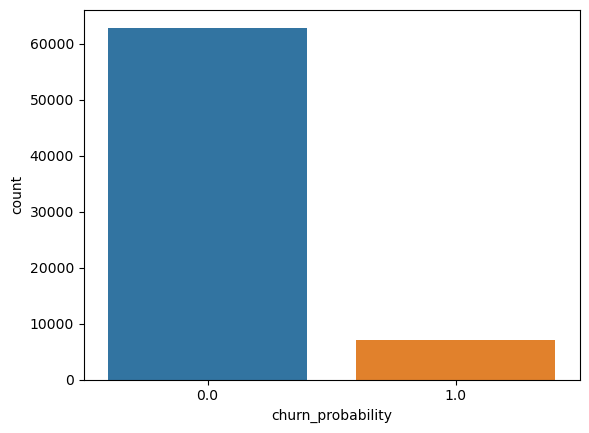

In [244]:
sns.countplot(x=final_df['churn_probability'])
plt.show()

In [245]:
# Creating a function to plot piecharts
def plot_pieplot(data, column):
    counts = data[column].value_counts()
    total = counts.values.sum()
    def fmt(x):
        return '{:.1f}%'.format(x, total * x / 100)

    counts.plot.pie()
    plt.pie(counts.values, labels=counts.index, autopct=fmt)
    plt.show()

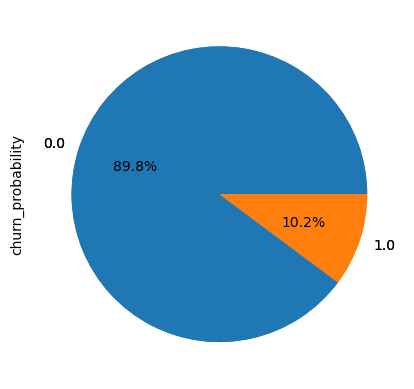

In [246]:
plot_pieplot(final_df, 'churn_probability')

#### Observations:
- 10.2% of users have churn probability of 1.
- Clearly there's class imbalance.

### Bivariate Analysis

In [247]:
# create box plot for 6th, 7th and 8th months
def plot_boxplot(df, col):
    plt.figure(figsize=(22,16))
    plt.subplot(2,4,1)
    plt.title(col + "_6")
    sns.boxplot(data=df, y=col + "_6", x="churn_probability", hue="churn_probability", showfliers=False)
    plt.subplot(2,4,2)
    plt.title(col + "_7")
    sns.boxplot(data=df, y=col + "_7", x="churn_probability", hue="churn_probability", showfliers=False)
    plt.subplot(2,4,3)
    plt.title(col + "_8")
    sns.boxplot(data=df, y=col + "_8", x="churn_probability", hue="churn_probability", showfliers=False)
    plt.subplot(2,4,4)
    plt.title("diff_" + col)
    sns.boxplot(data=df, y="diff_" + col, x="churn_probability", hue="churn_probability", showfliers=False)
    plt.show()

In [248]:
# create bar plot for 6th, 7th and 8th months
def plot_barplot(df, col):
    plt.figure(figsize=(22,16))
    plt.subplot(2,3,1)
    plt.title(col + "_6")
    sns.barplot(data=df, y=col + "_6", x="churn_probability", hue="churn_probability")
    plt.subplot(2,3,2)
    plt.title(col + "_7")
    sns.barplot(data=df, y=col + "_7", x="churn_probability", hue="churn_probability")
    plt.subplot(2,3,3)
    plt.title(col + "_8")
    sns.barplot(data=df, y=col + "_8", x="churn_probability", hue="churn_probability")
    plt.show()

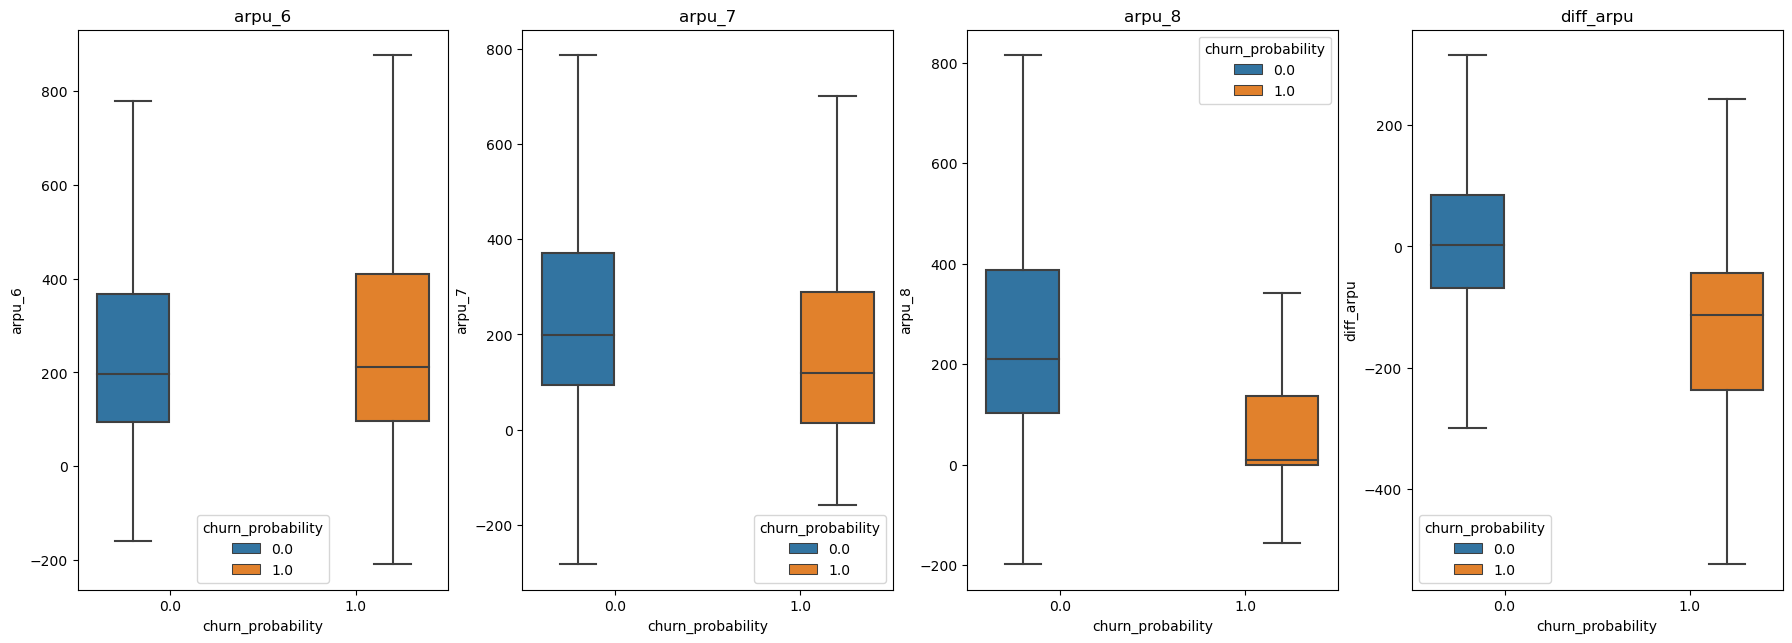

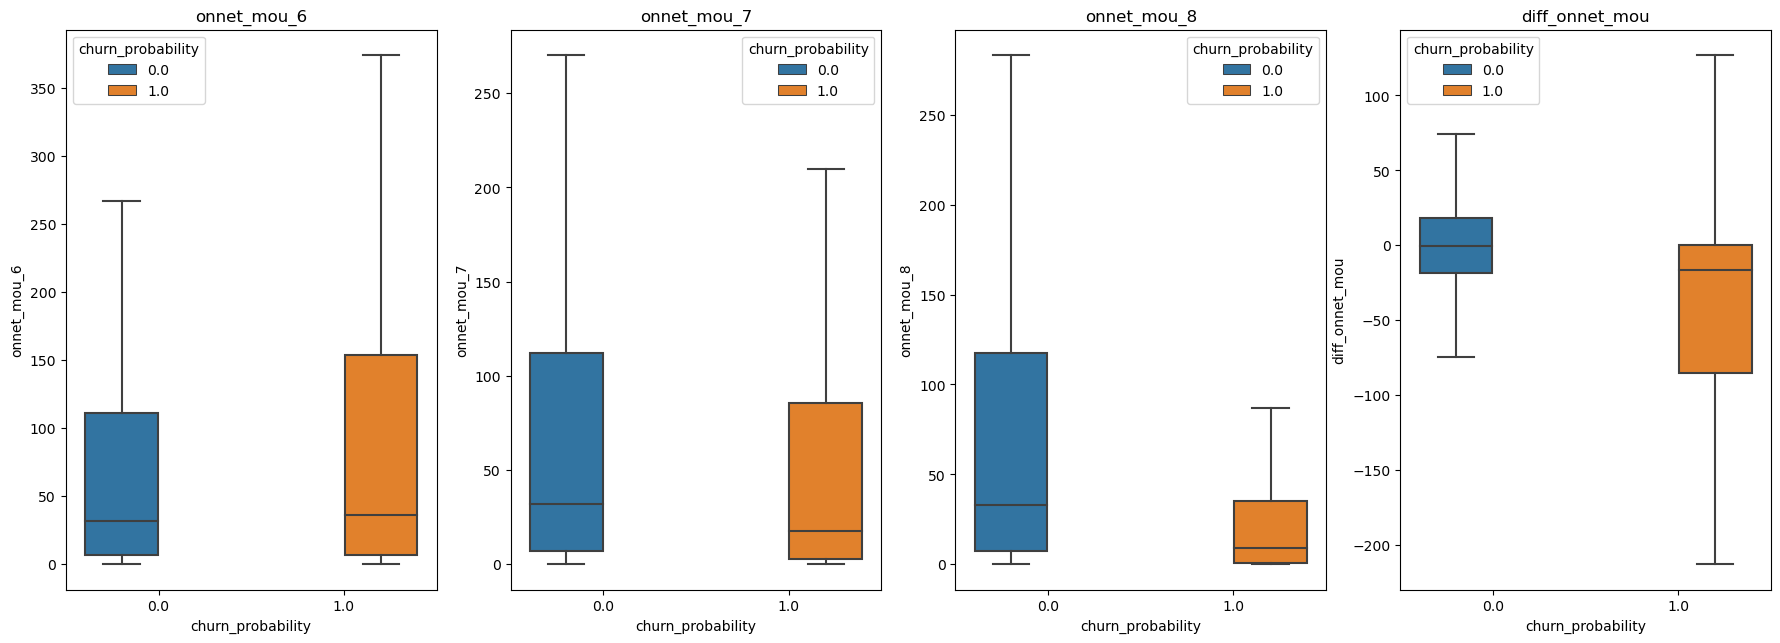

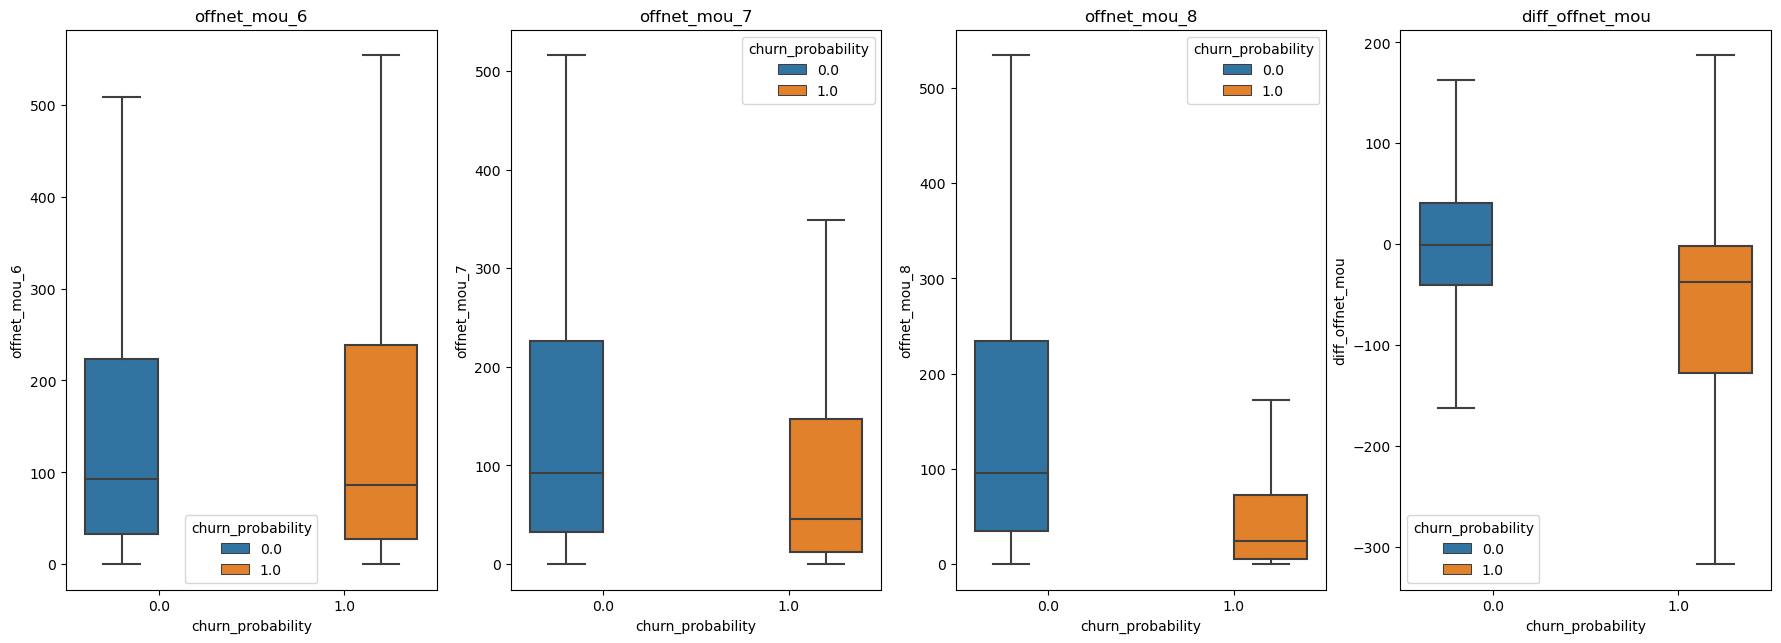

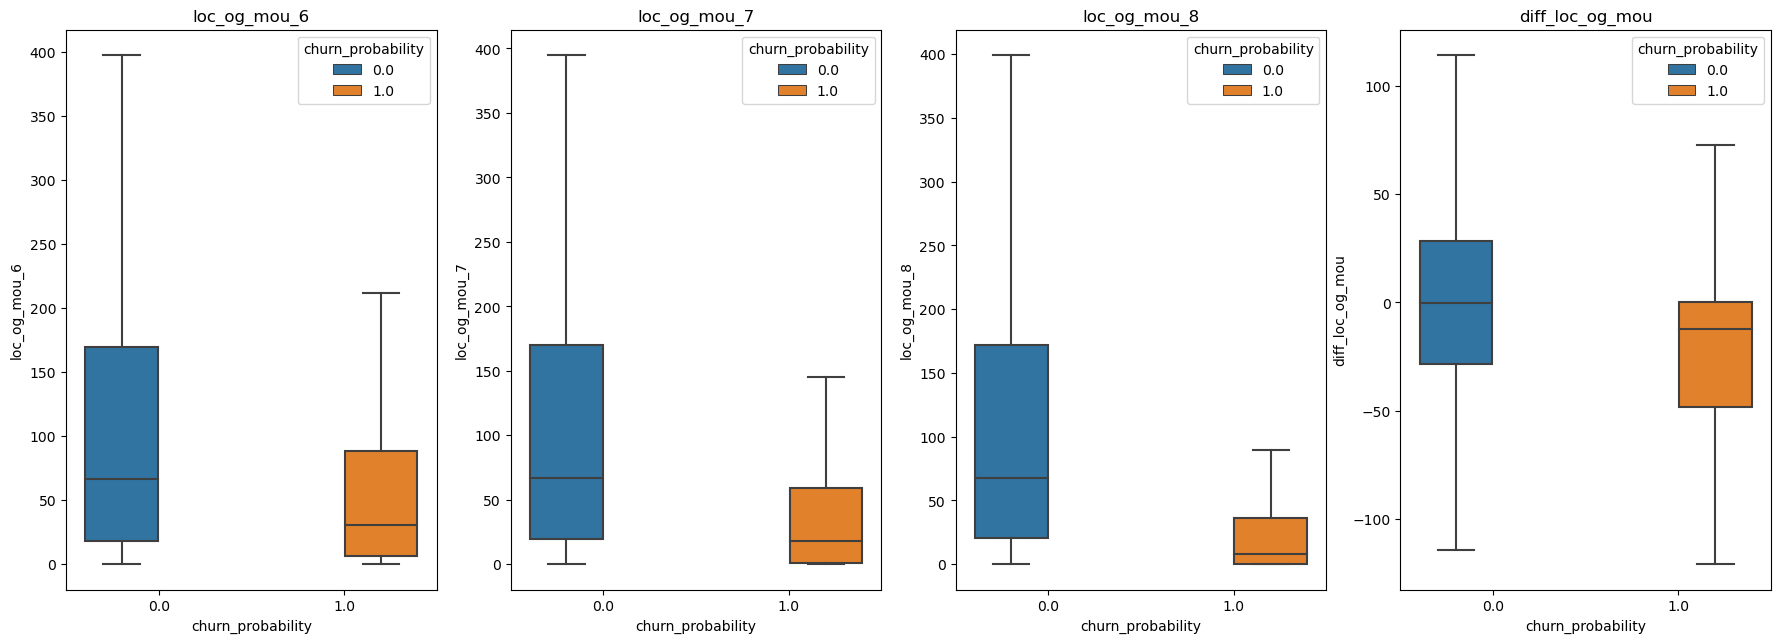

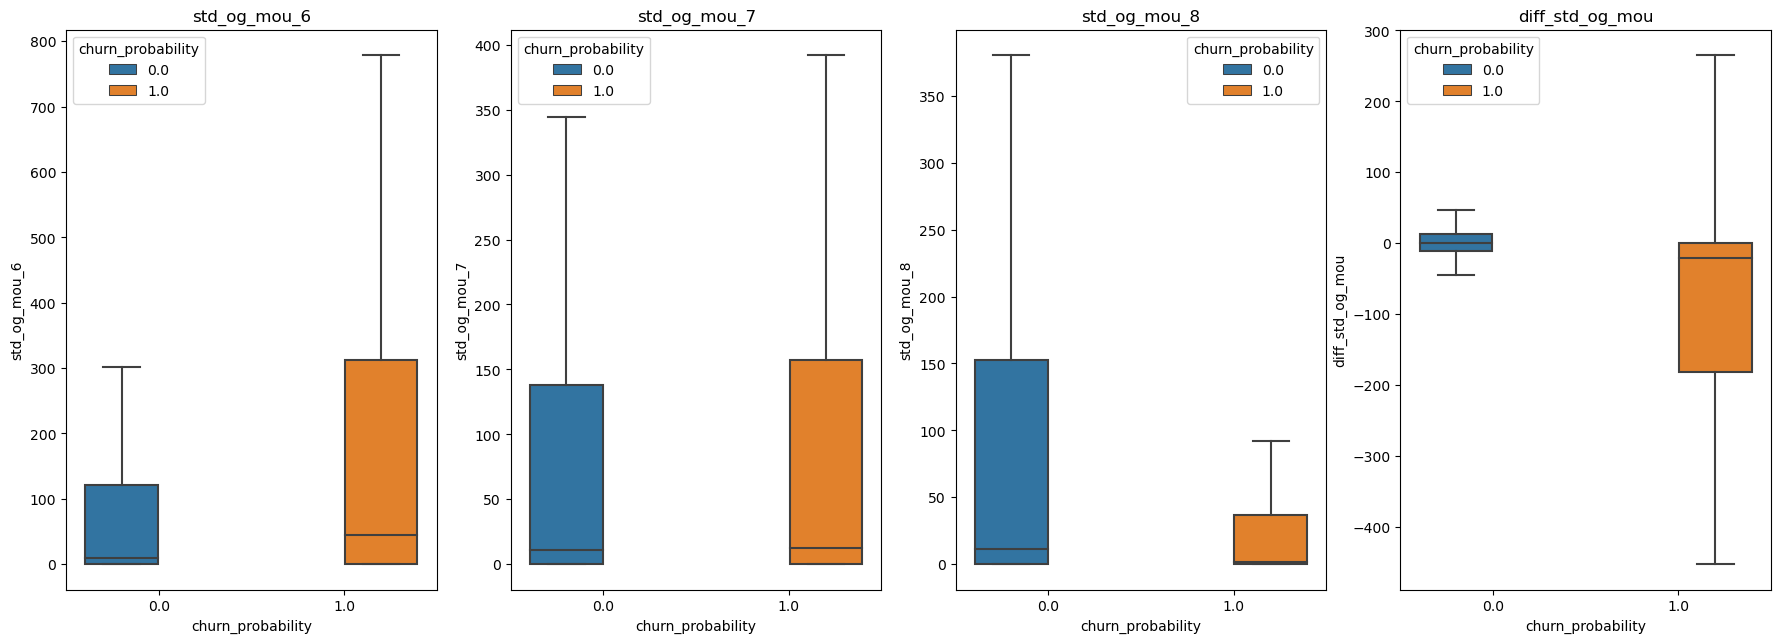

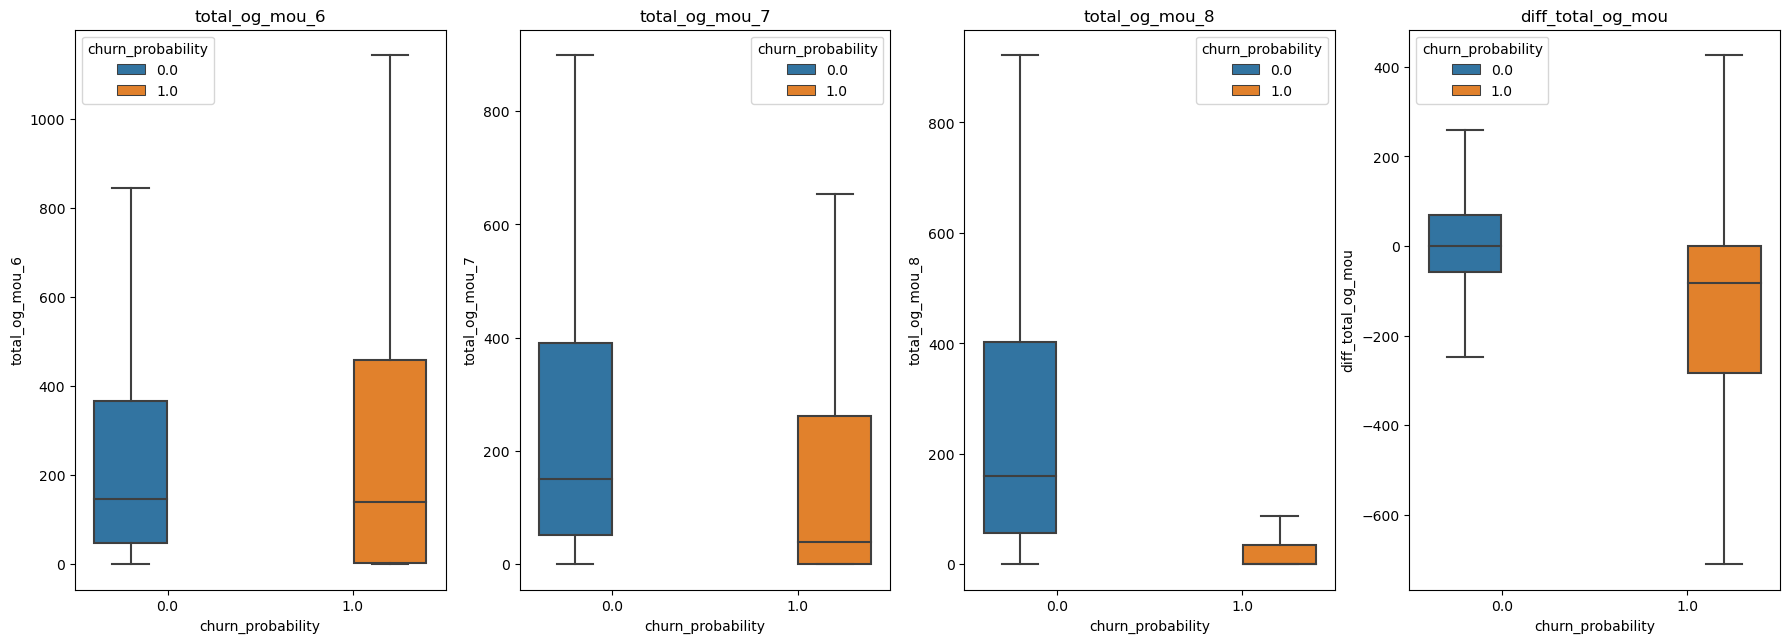

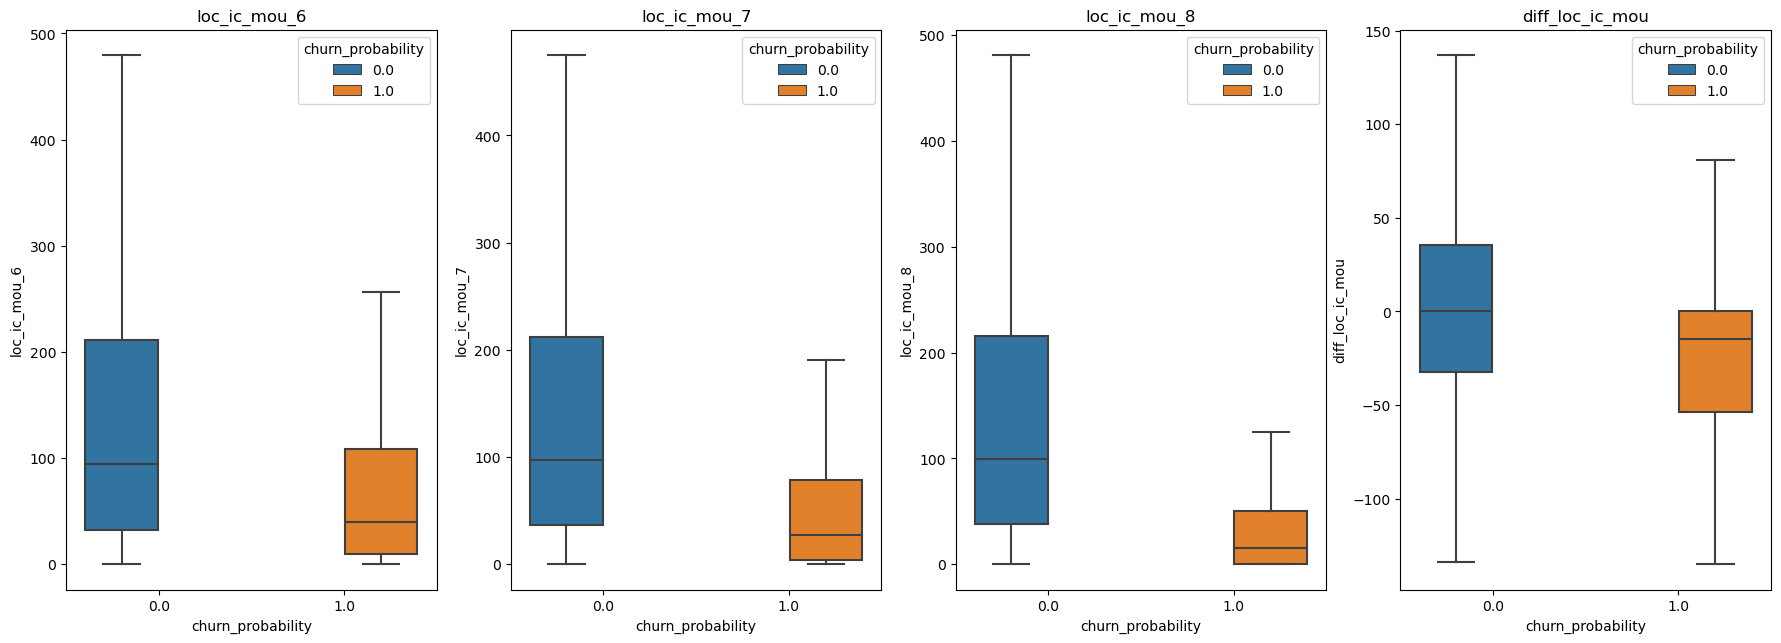

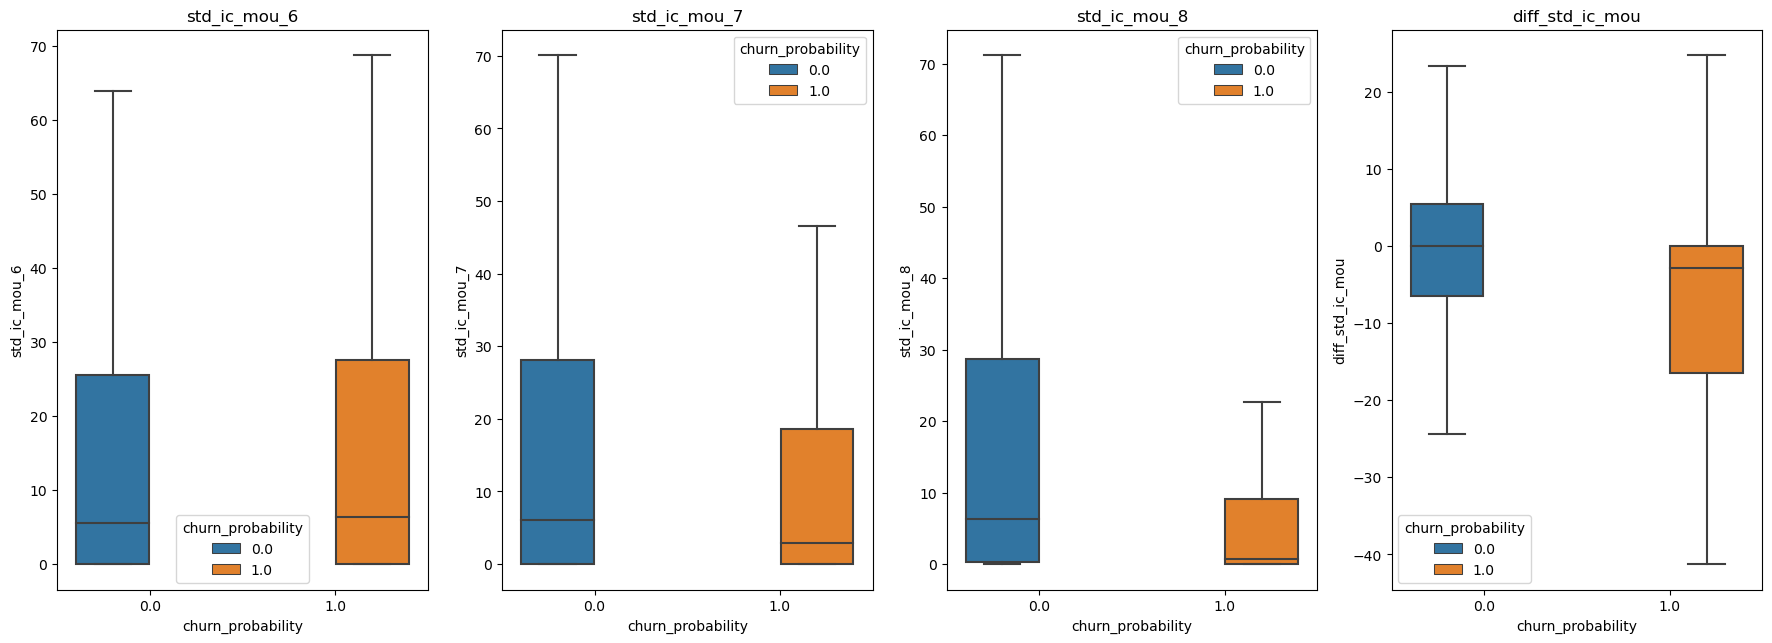

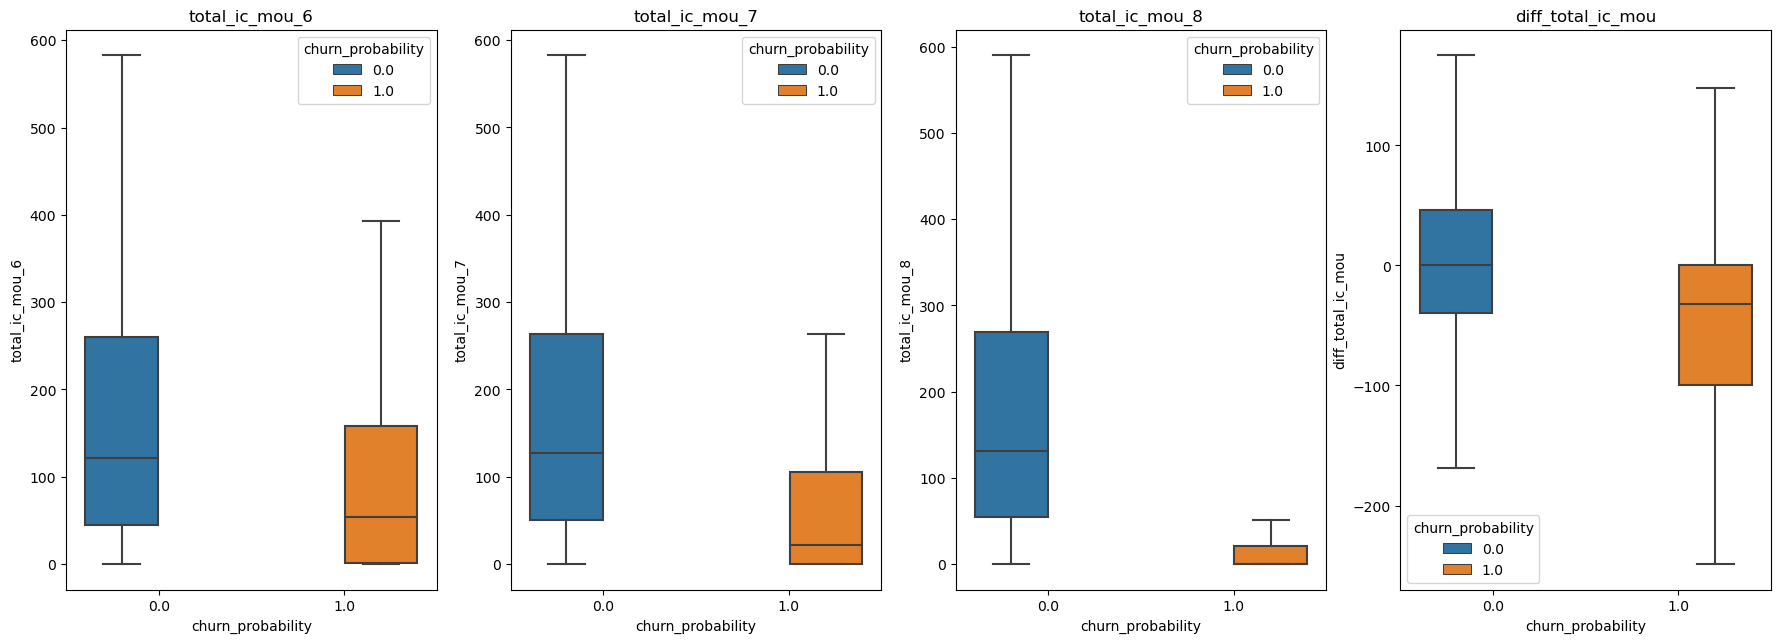

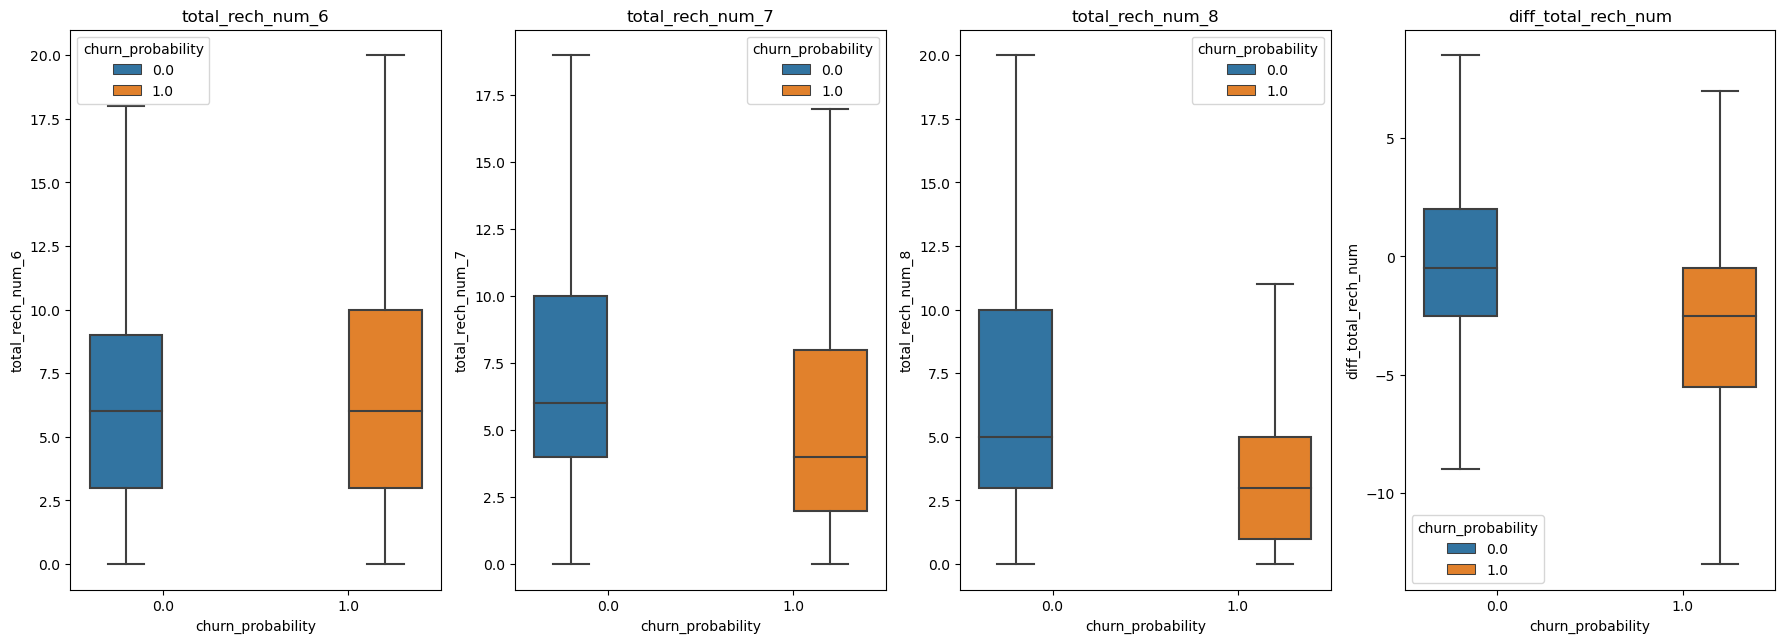

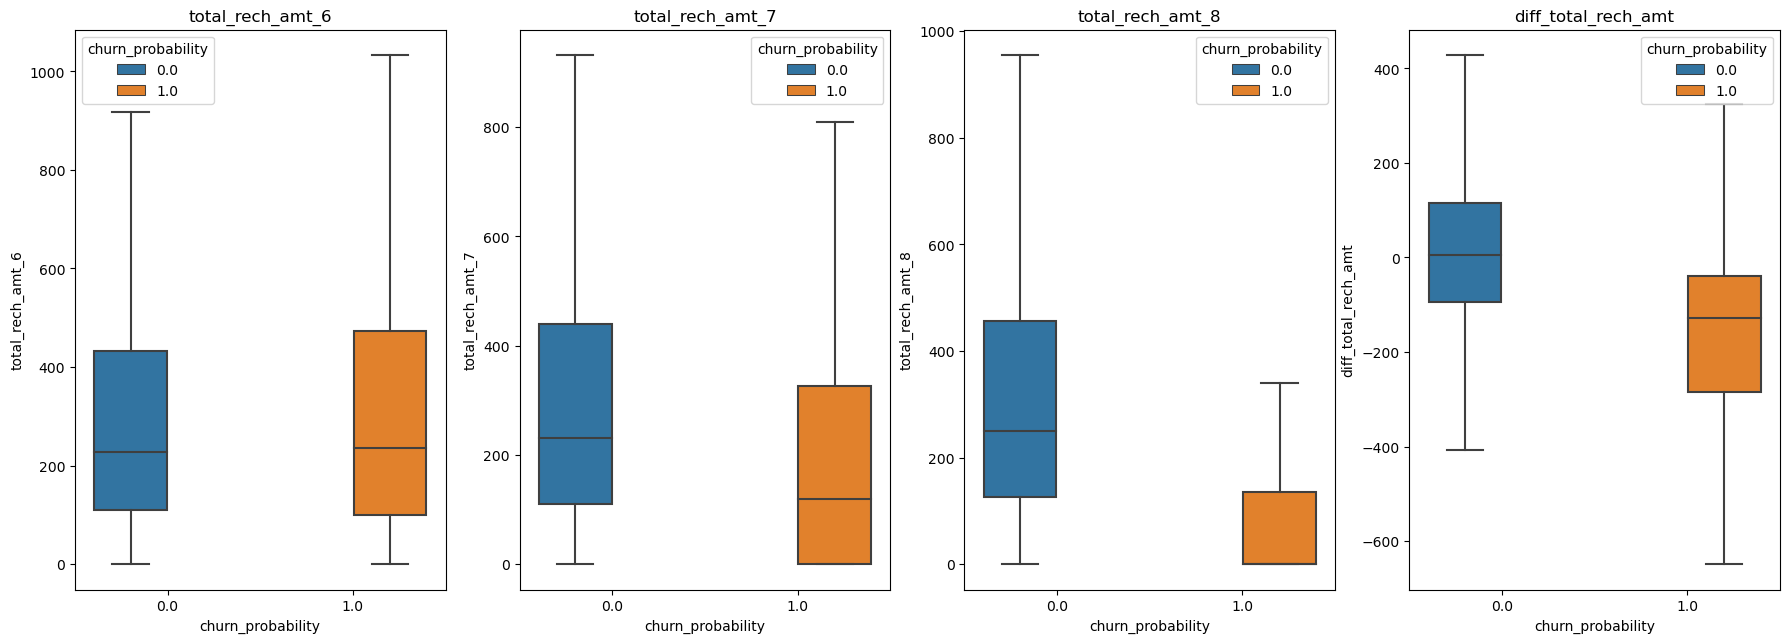

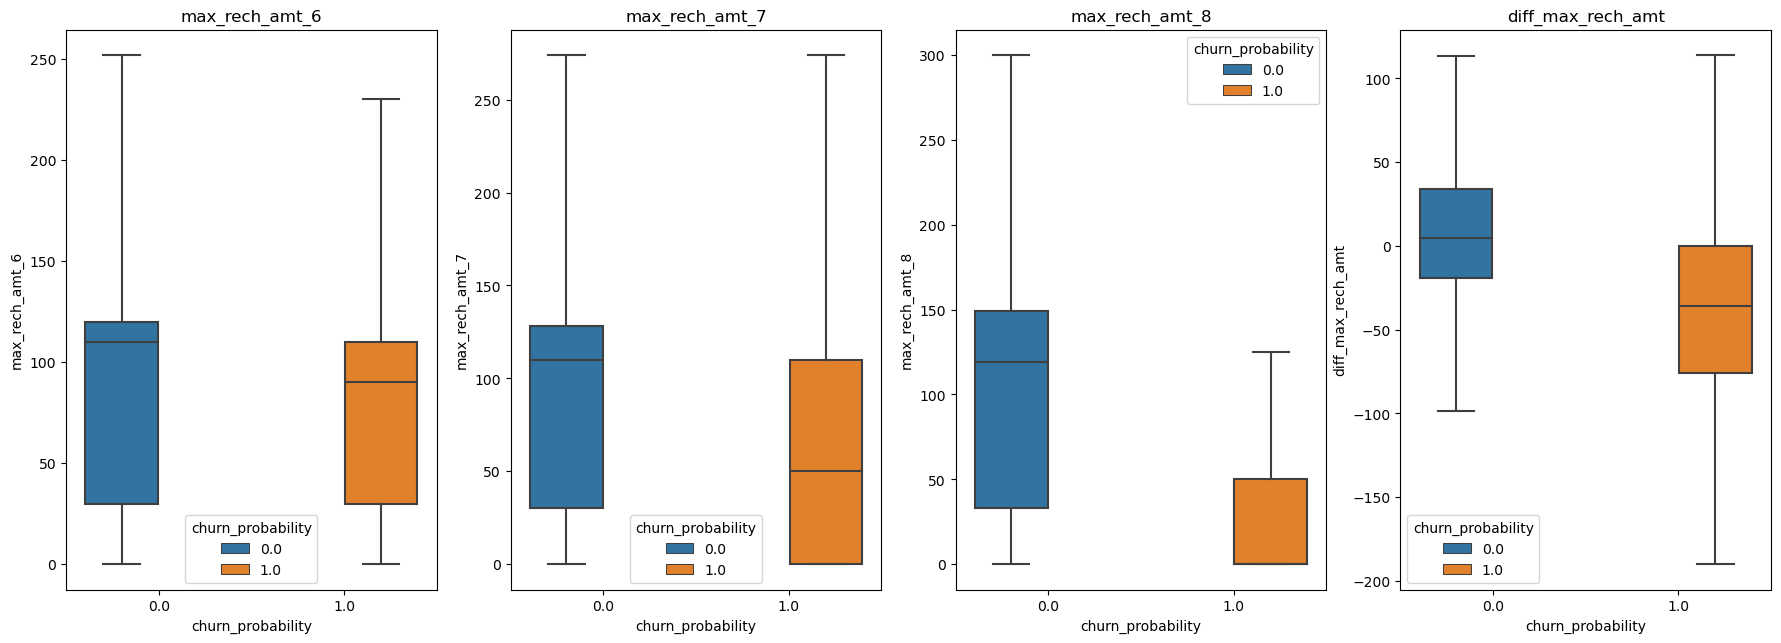

In [249]:
for col in ['arpu',
        'onnet_mou',
        'offnet_mou',
        'loc_og_mou',
        'std_og_mou',
        'total_og_mou',
        'loc_ic_mou',
        'std_ic_mou',
        'total_ic_mou',
        'total_rech_num',
        'total_rech_amt',
        'max_rech_amt']:
    plot_boxplot(final_df, col)

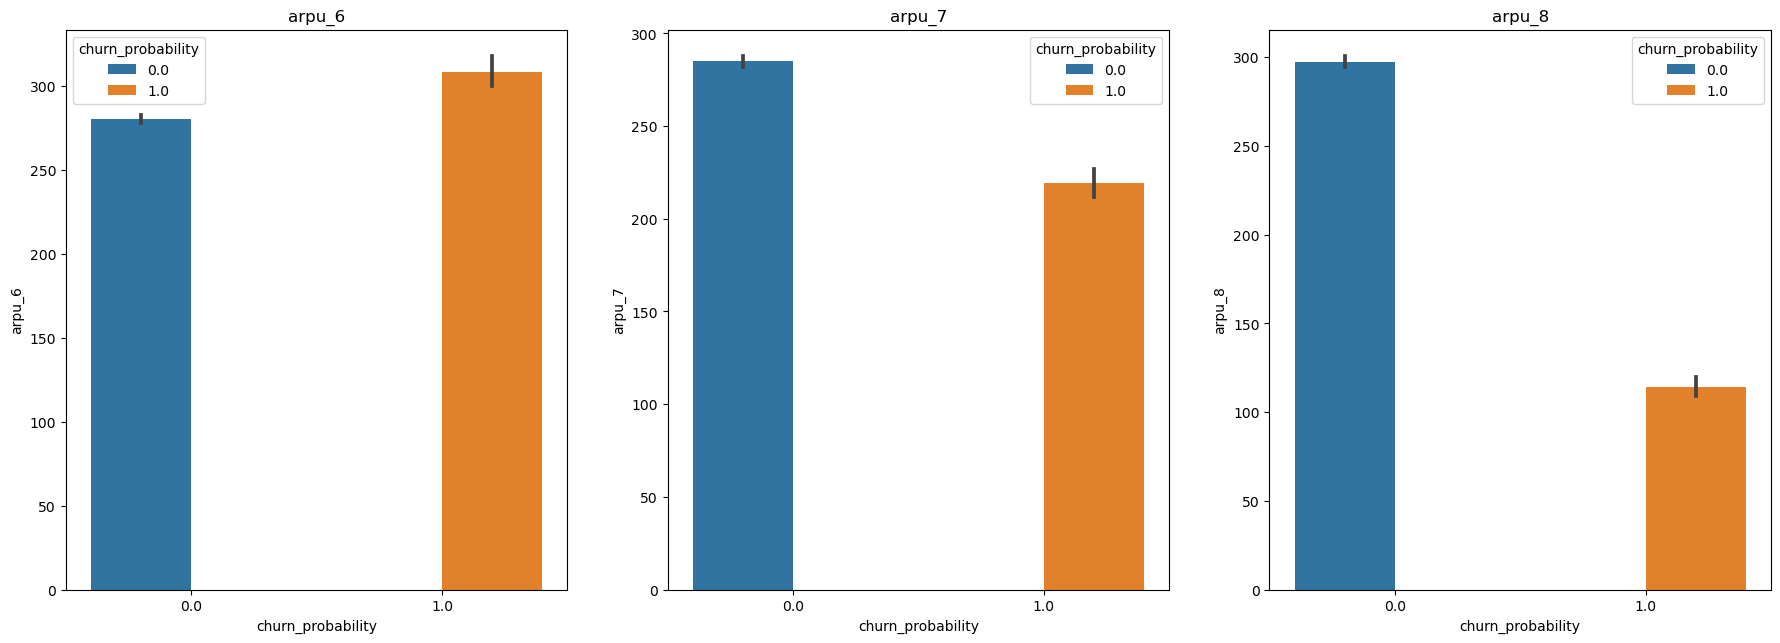

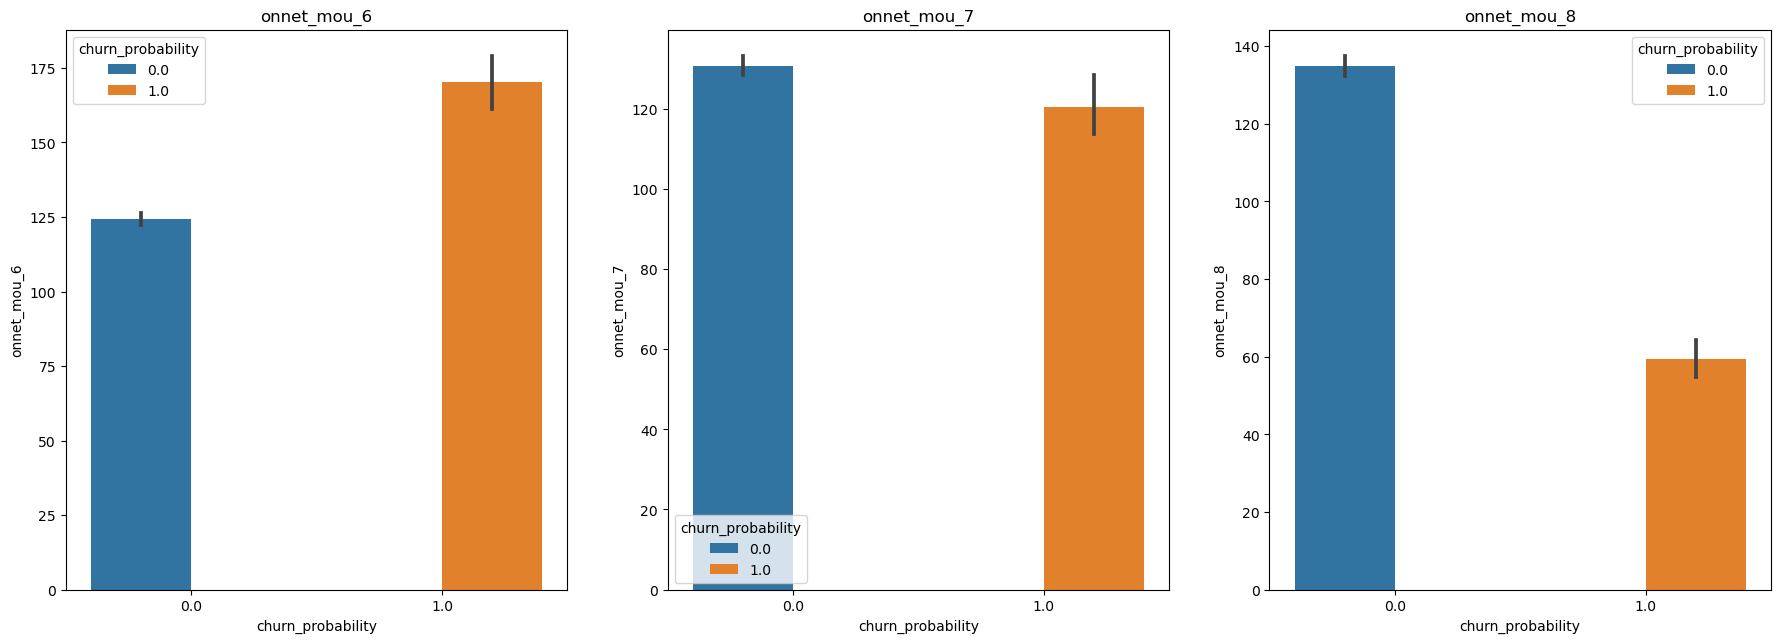

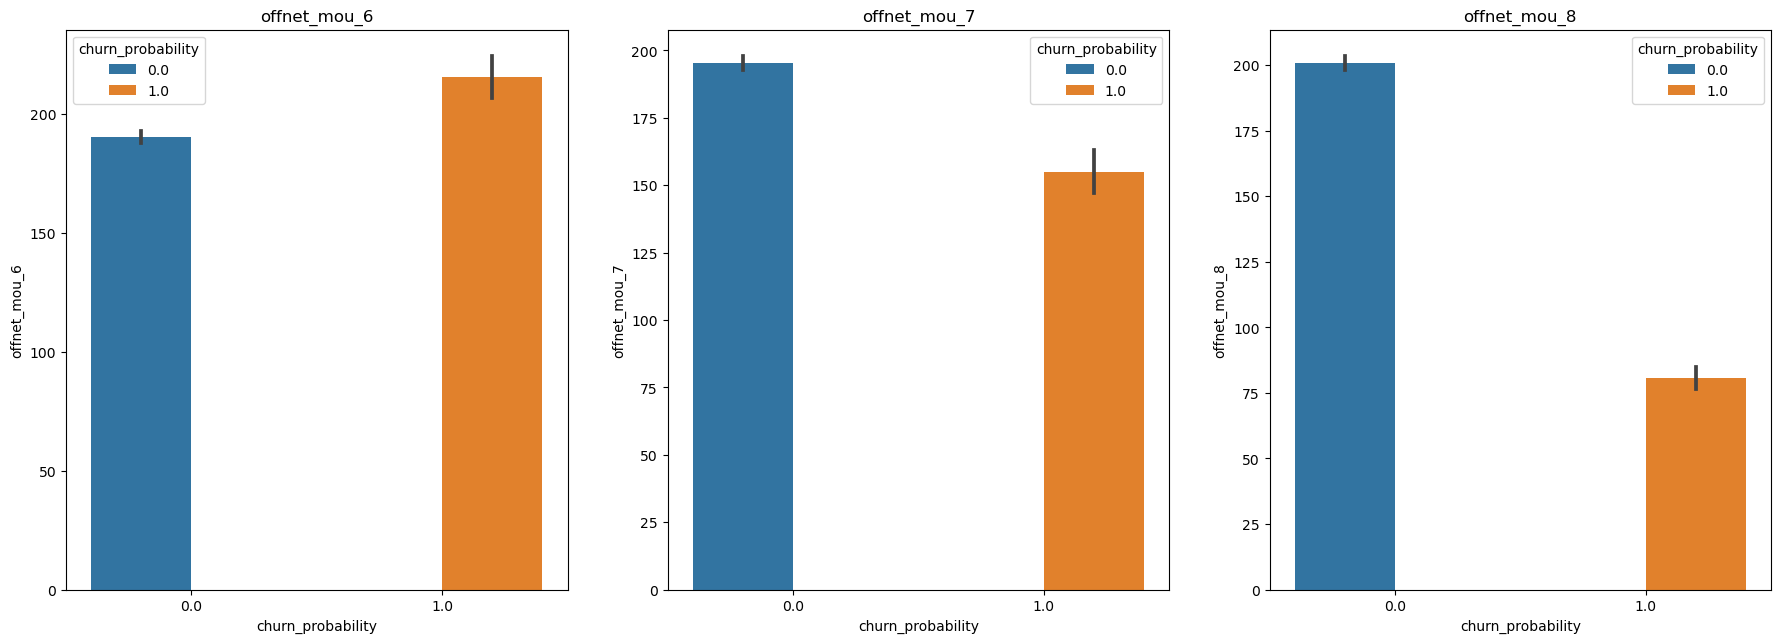

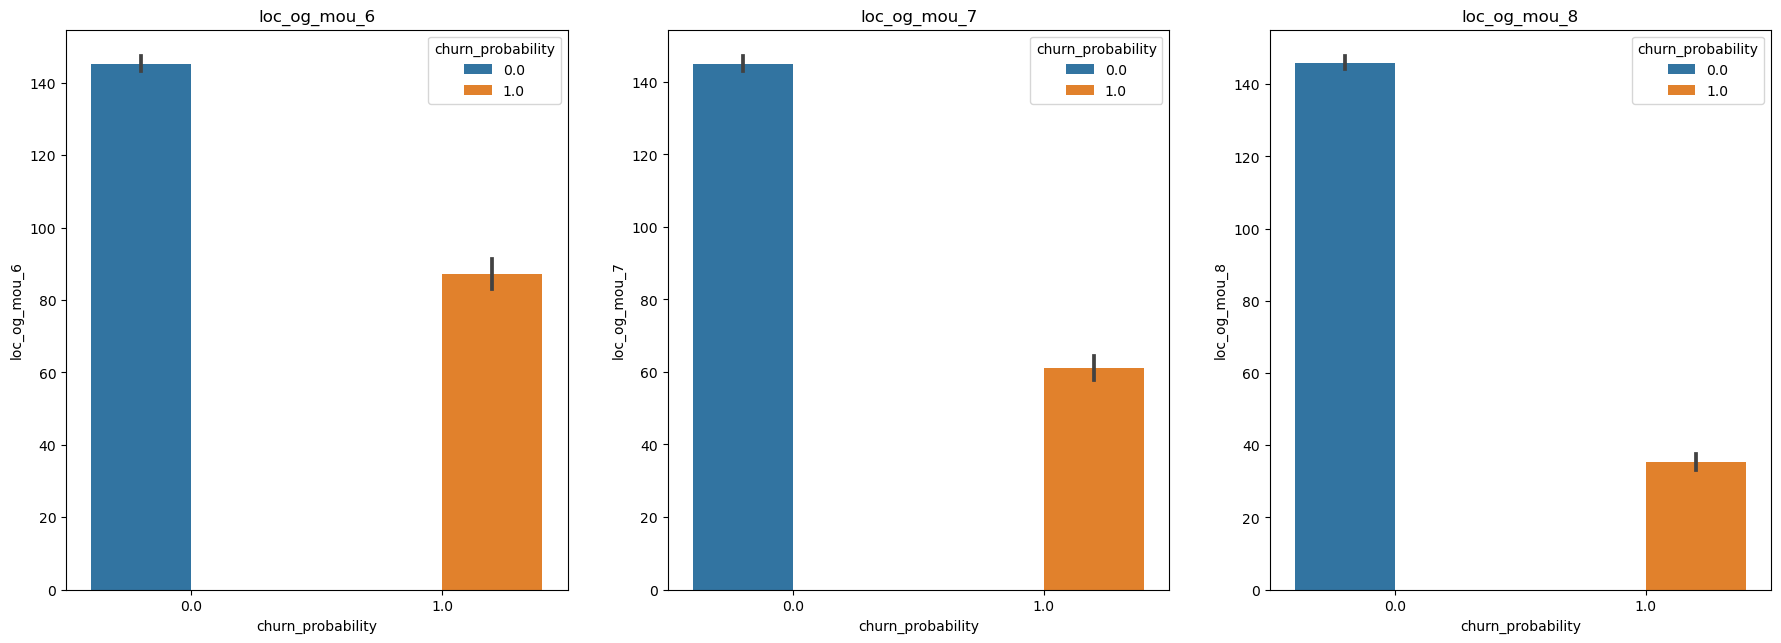

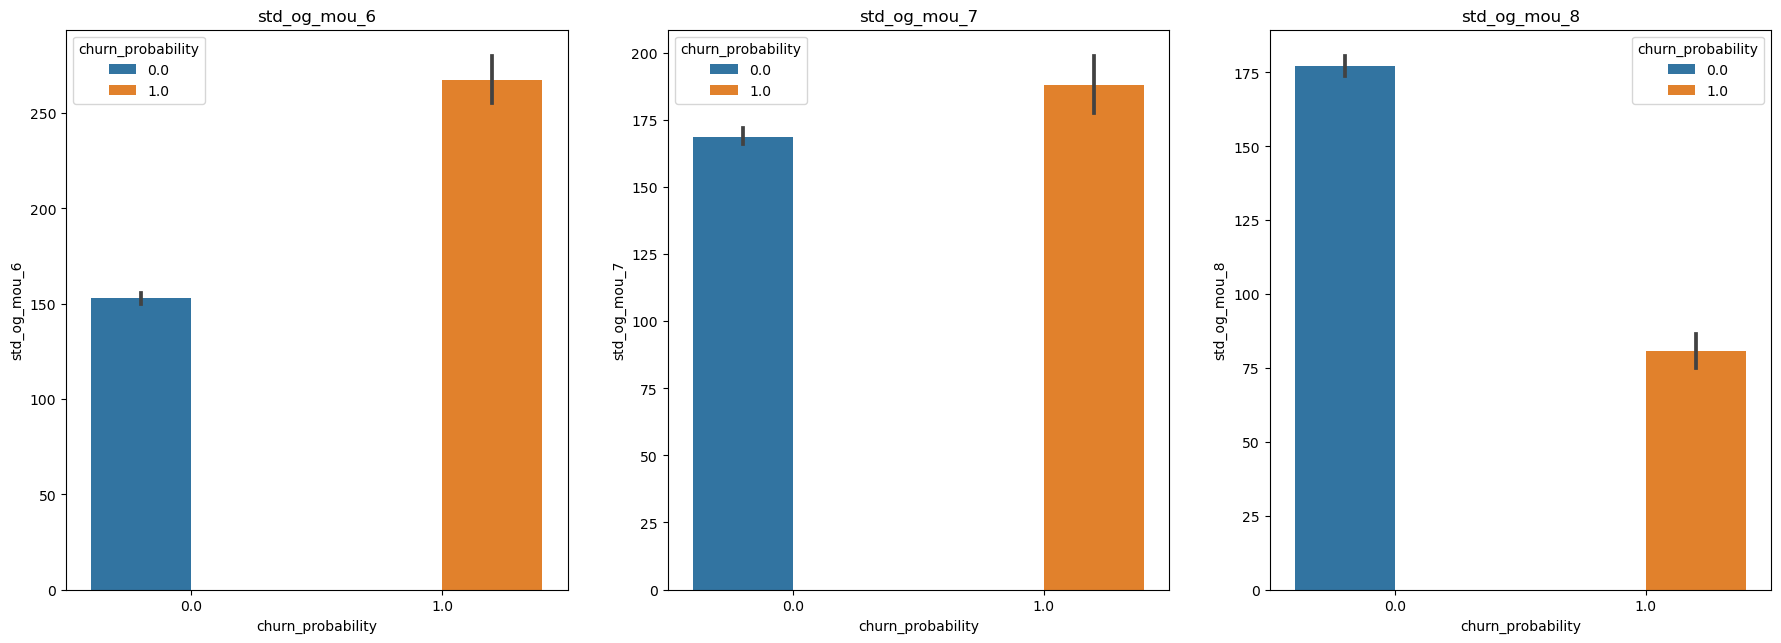

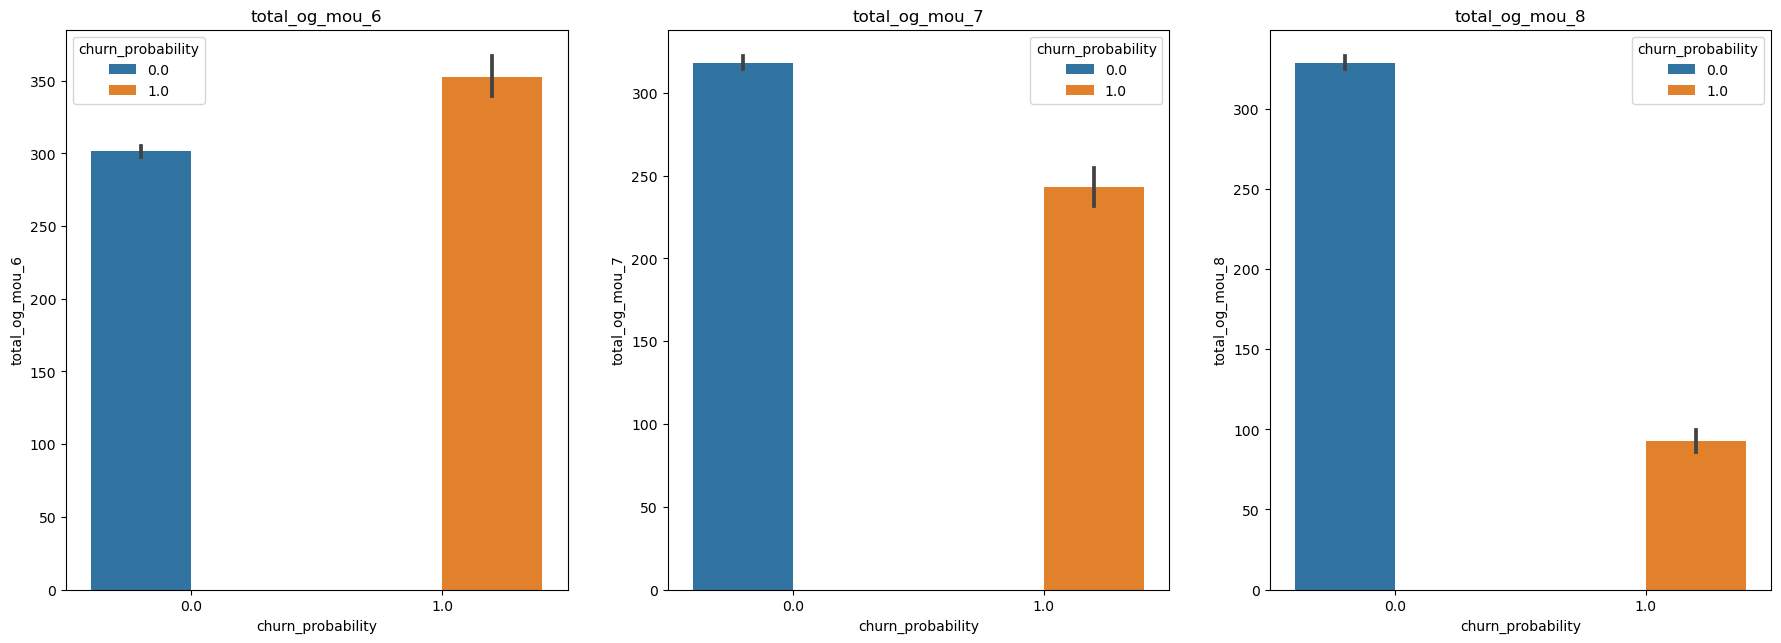

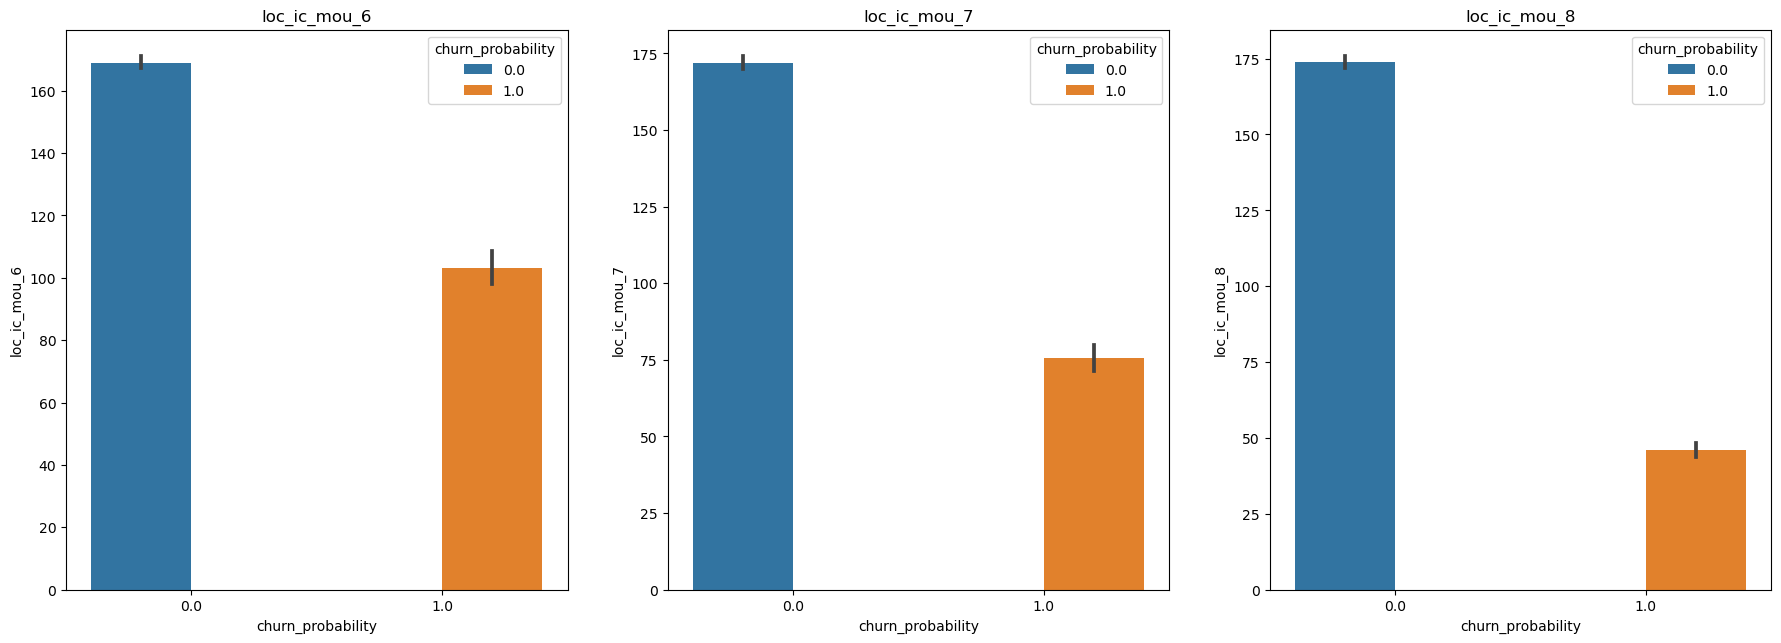

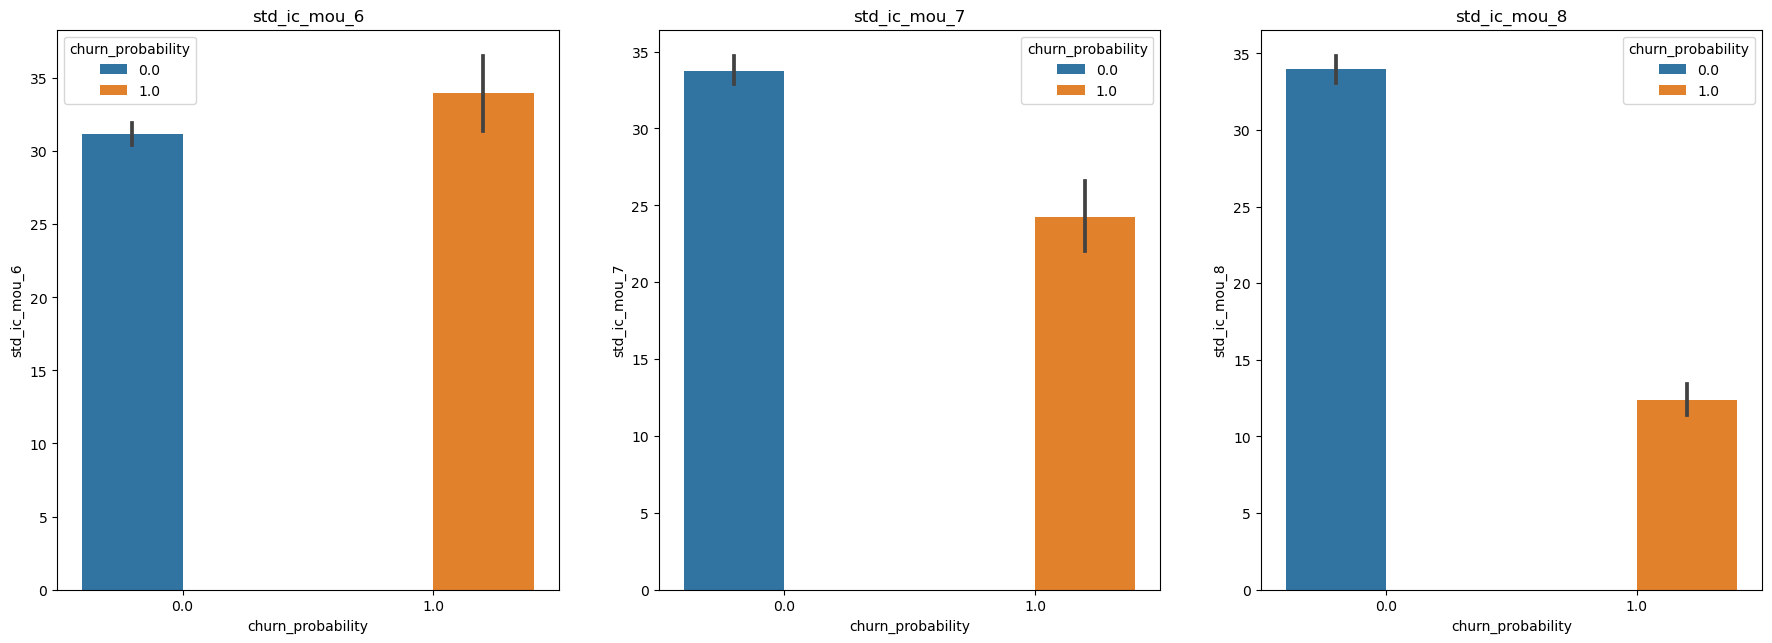

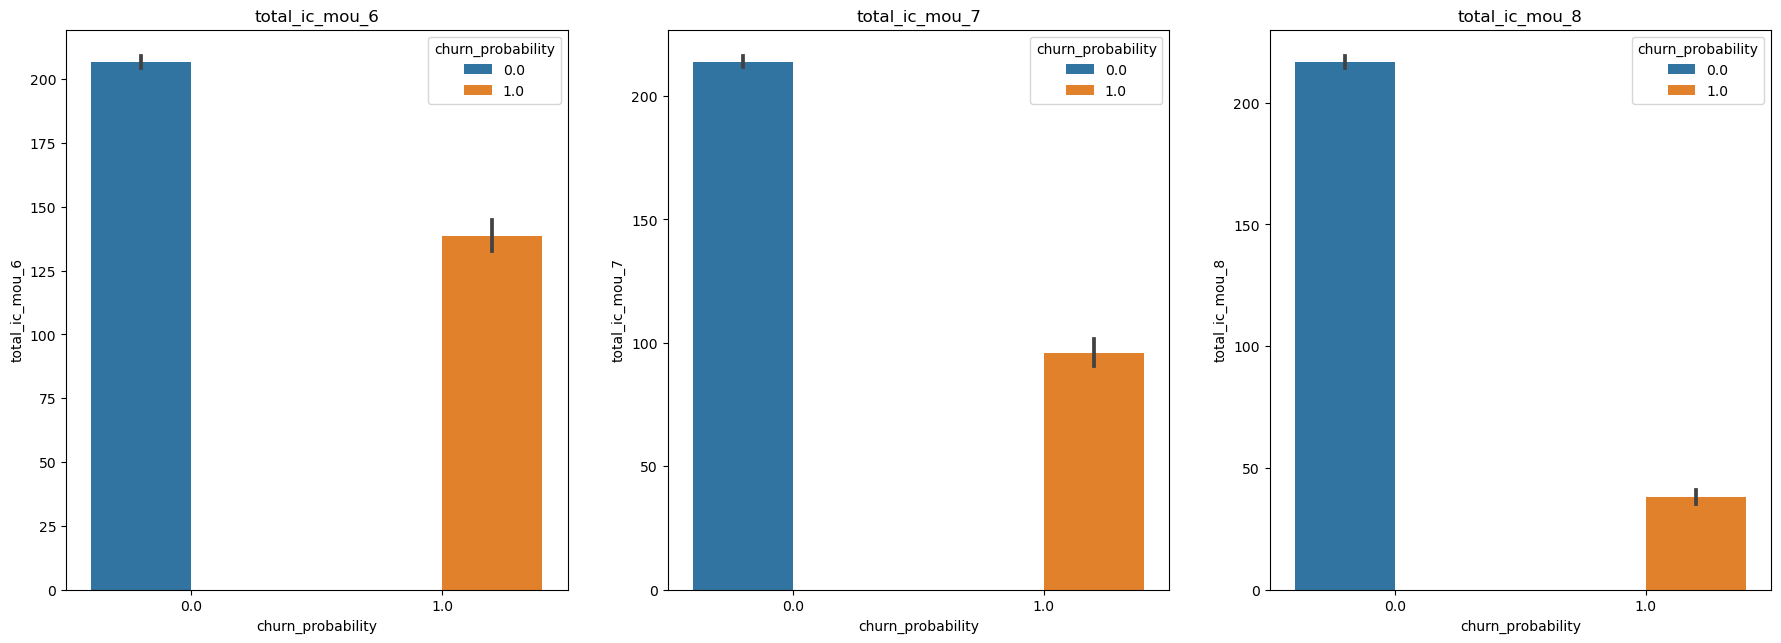

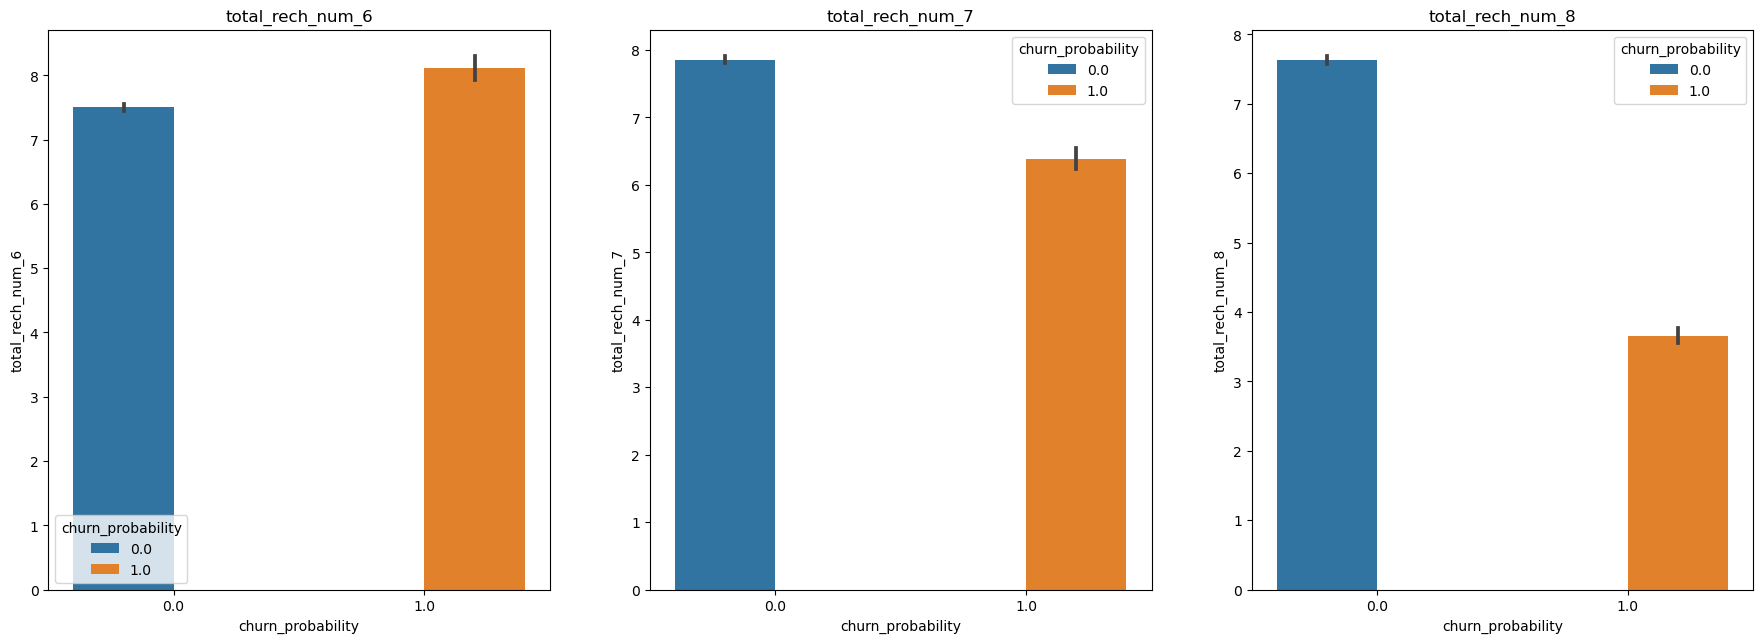

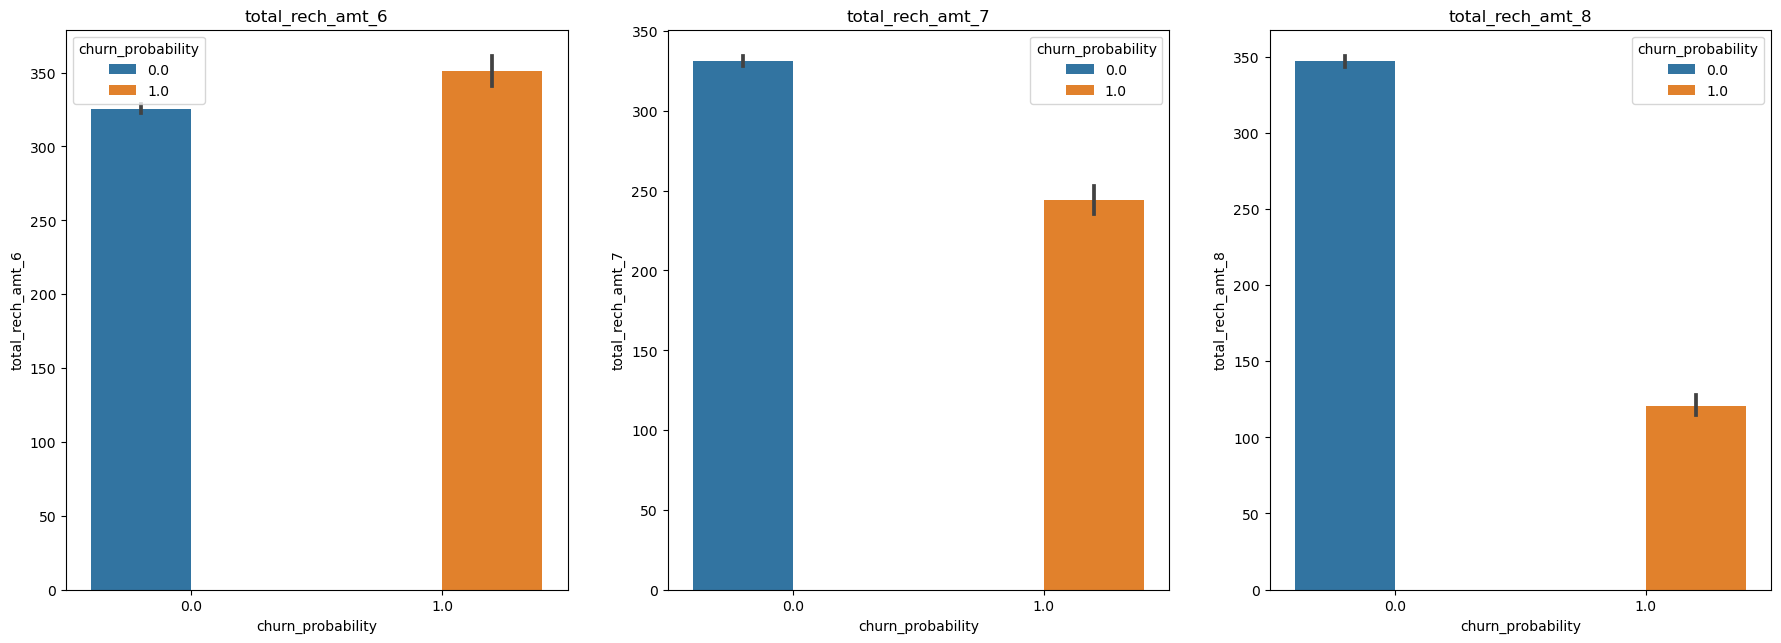

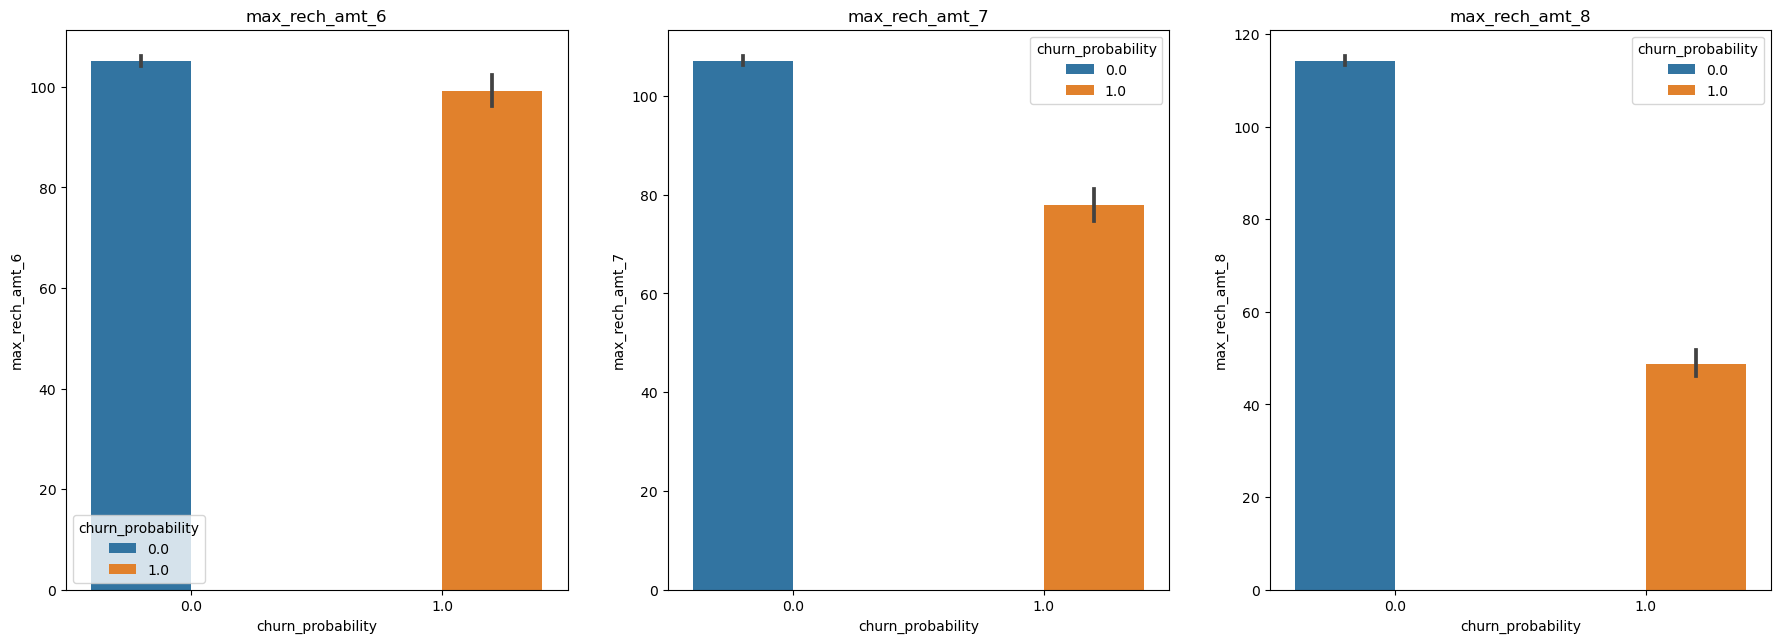

In [250]:
for col in ['arpu',
        'onnet_mou',
        'offnet_mou',
        'loc_og_mou',
        'std_og_mou',
        'total_og_mou',
        'loc_ic_mou',
        'std_ic_mou',
        'total_ic_mou',
        'total_rech_num',
        'total_rech_amt',
        'max_rech_amt']:
    plot_barplot(final_df, col)

In [251]:
# Creating churn dataframe
data_churn = final_df[final_df['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = final_df[final_df['churn_probability'] == 0]

# Distribution plot
def plot_distplot(col):
    plt.figure(figsize=(22,8))
    ax = sns.distplot(data_churn[col], label='churn', hist=False)
    ax = sns.distplot(data_non_churn[col], label='not churn', hist=False)
    ax.set(xlabel='8th month {}'.format(col))
    plt.show()

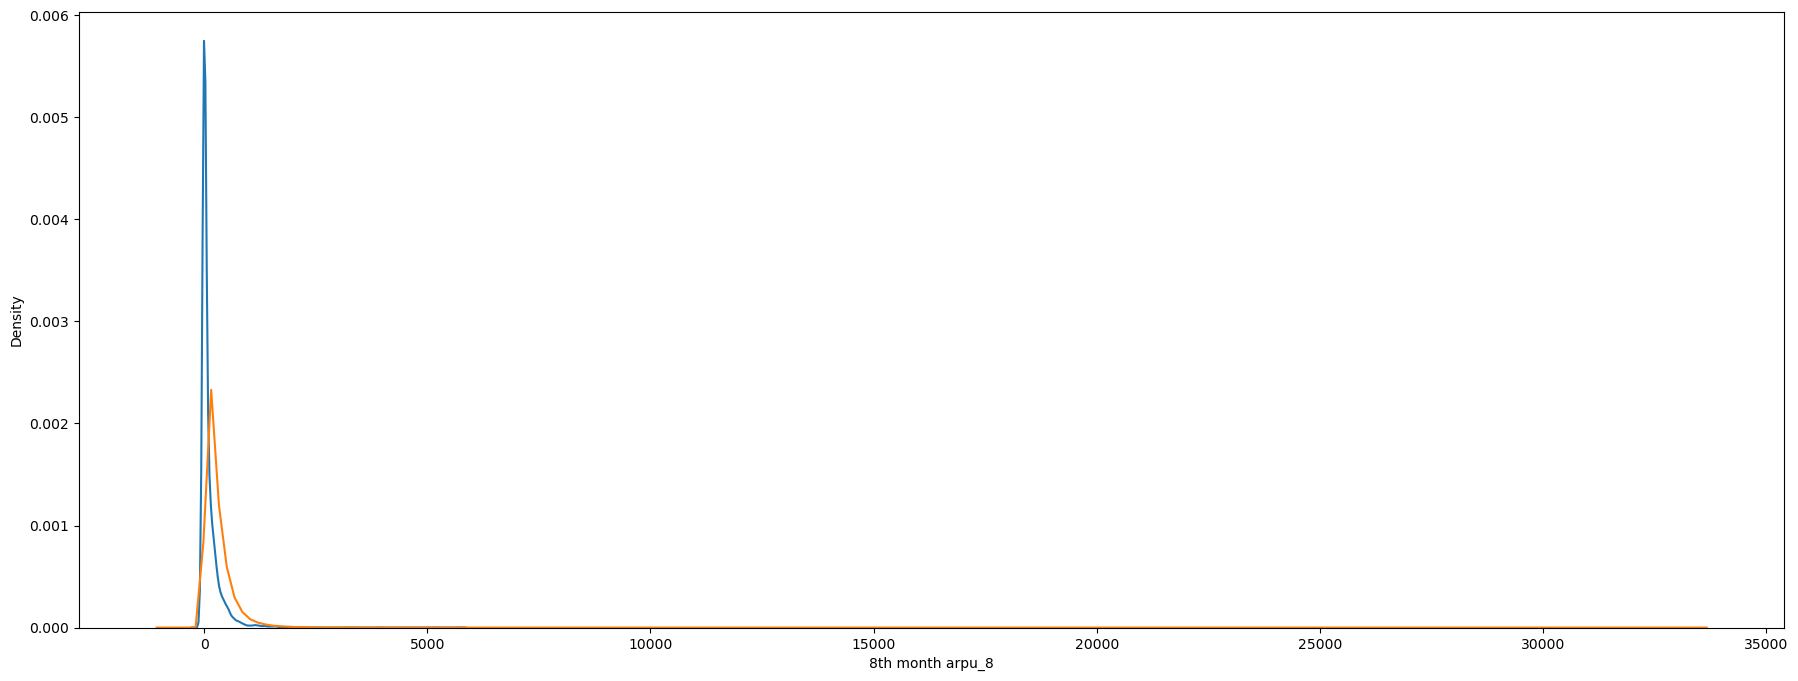

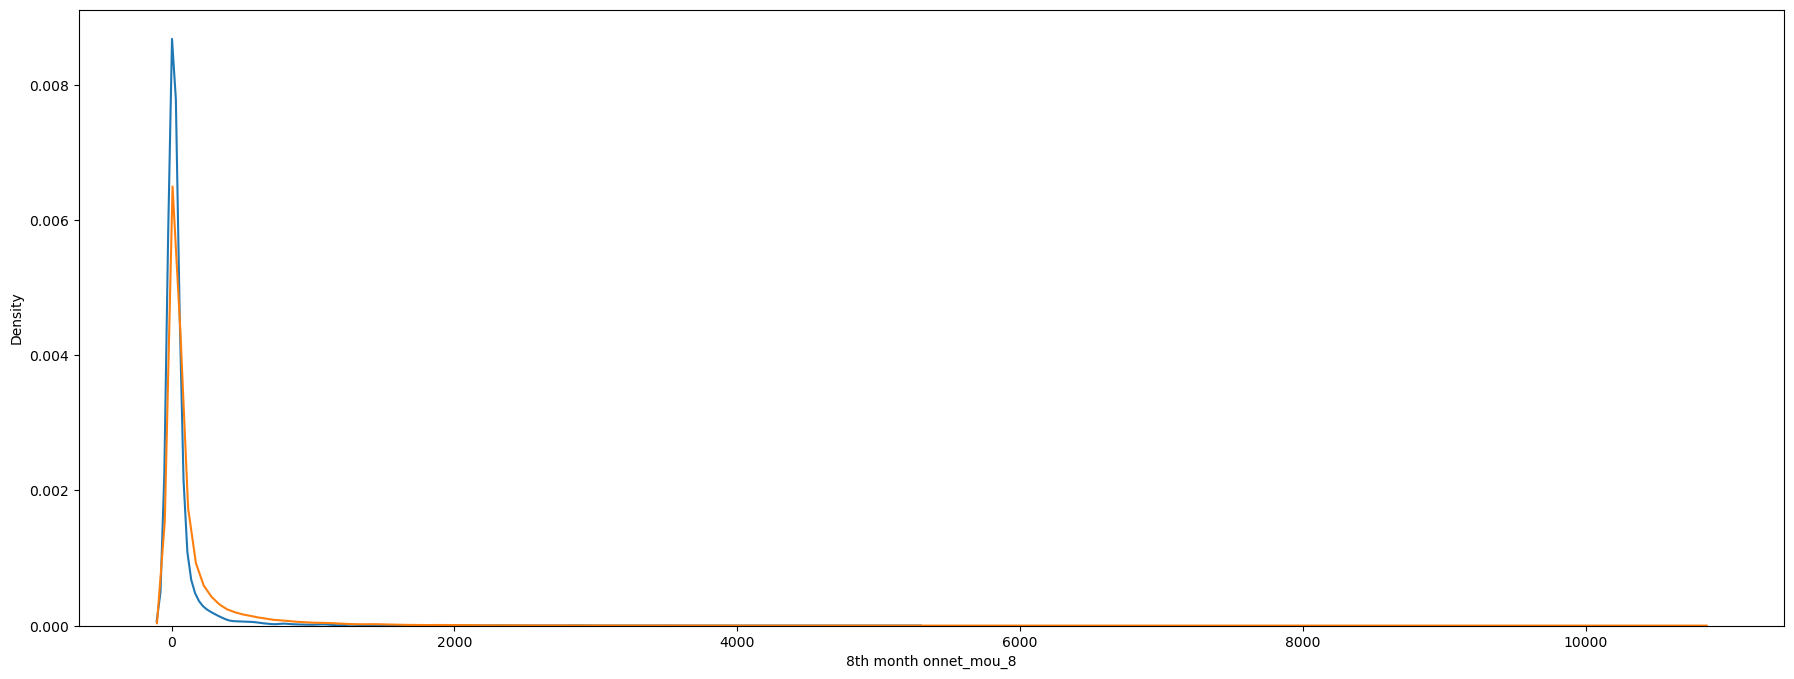

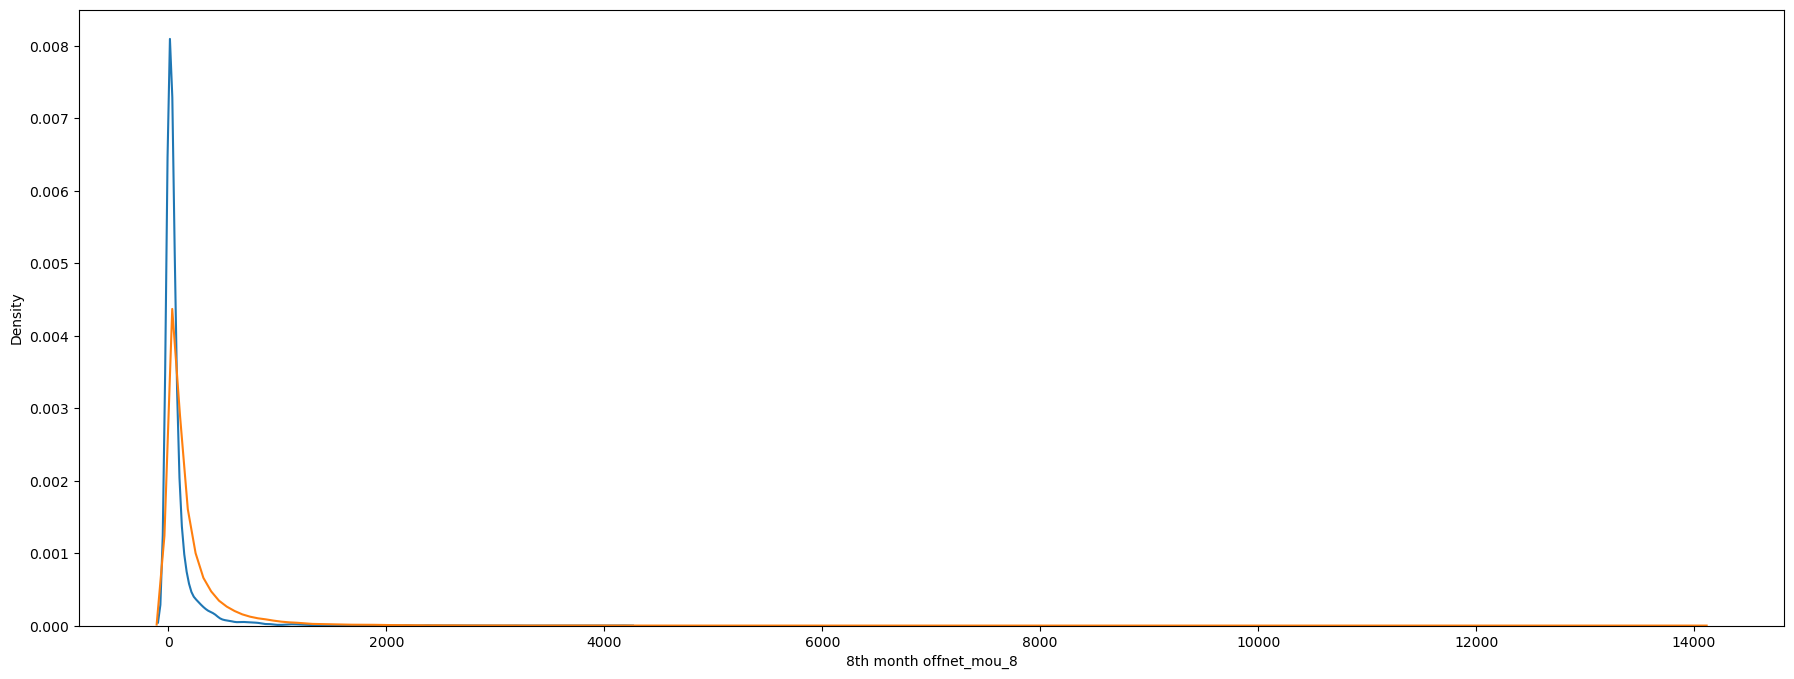

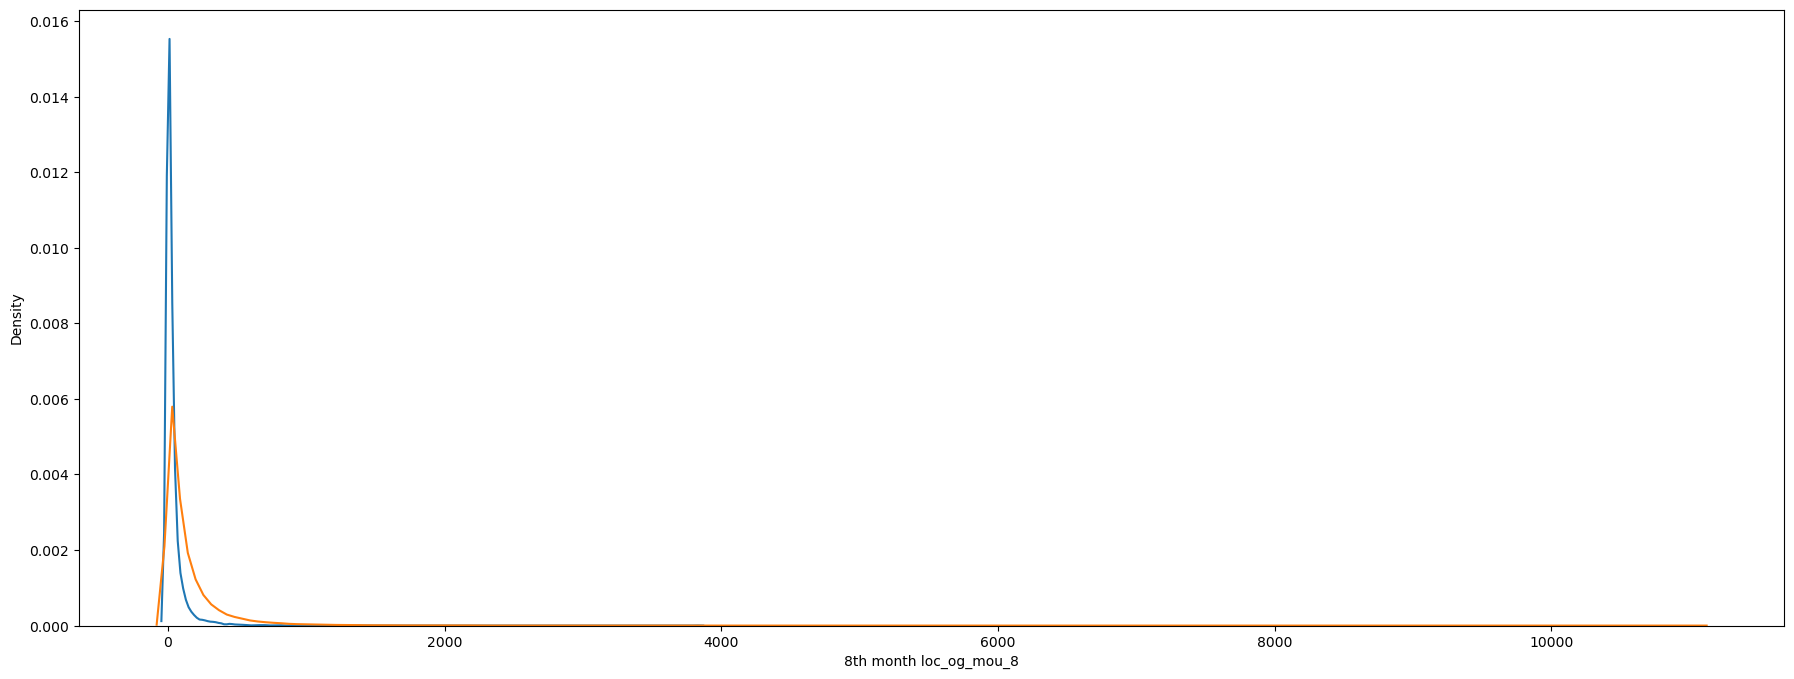

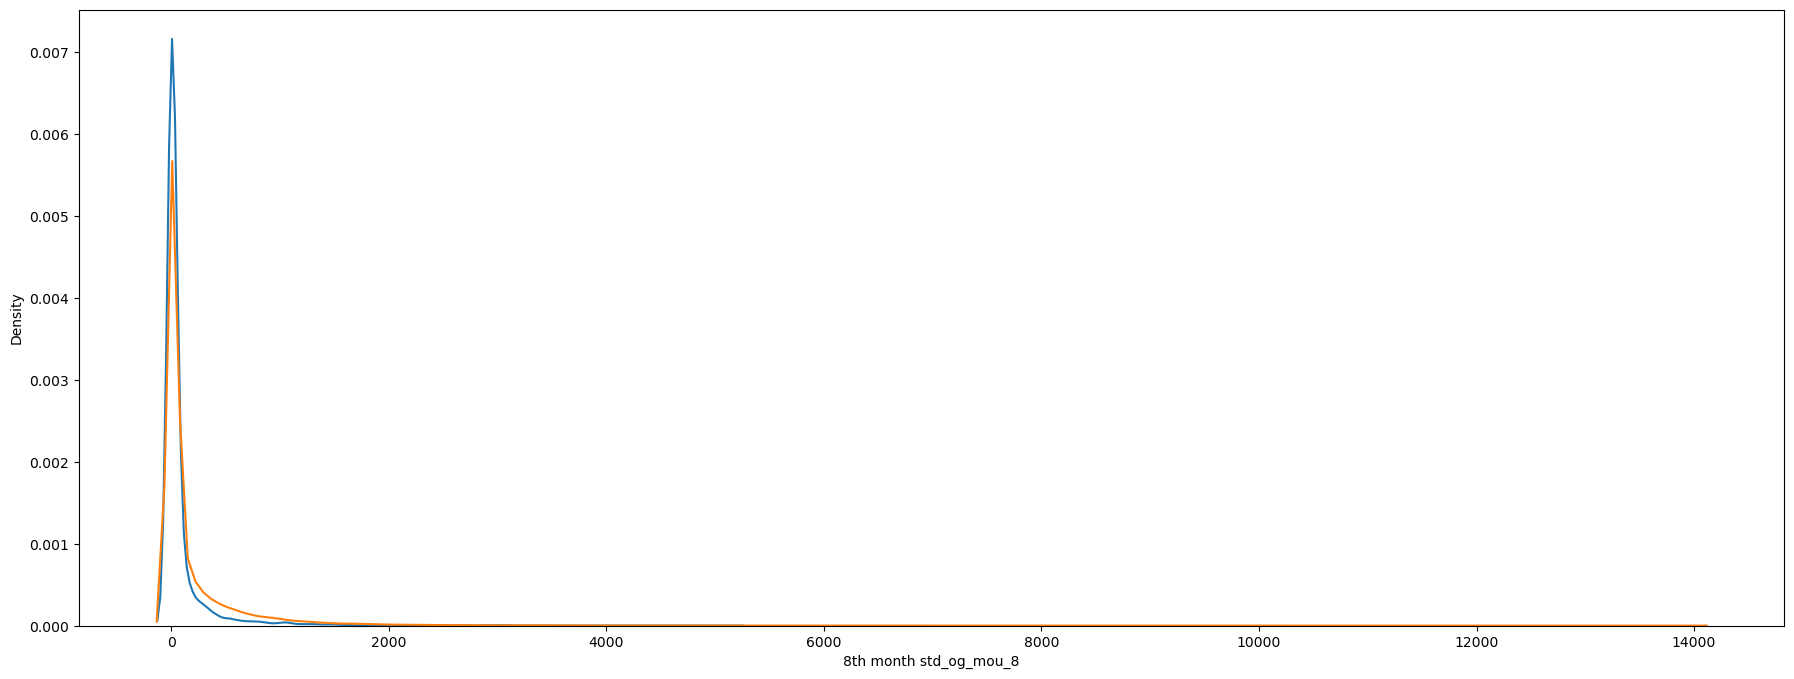

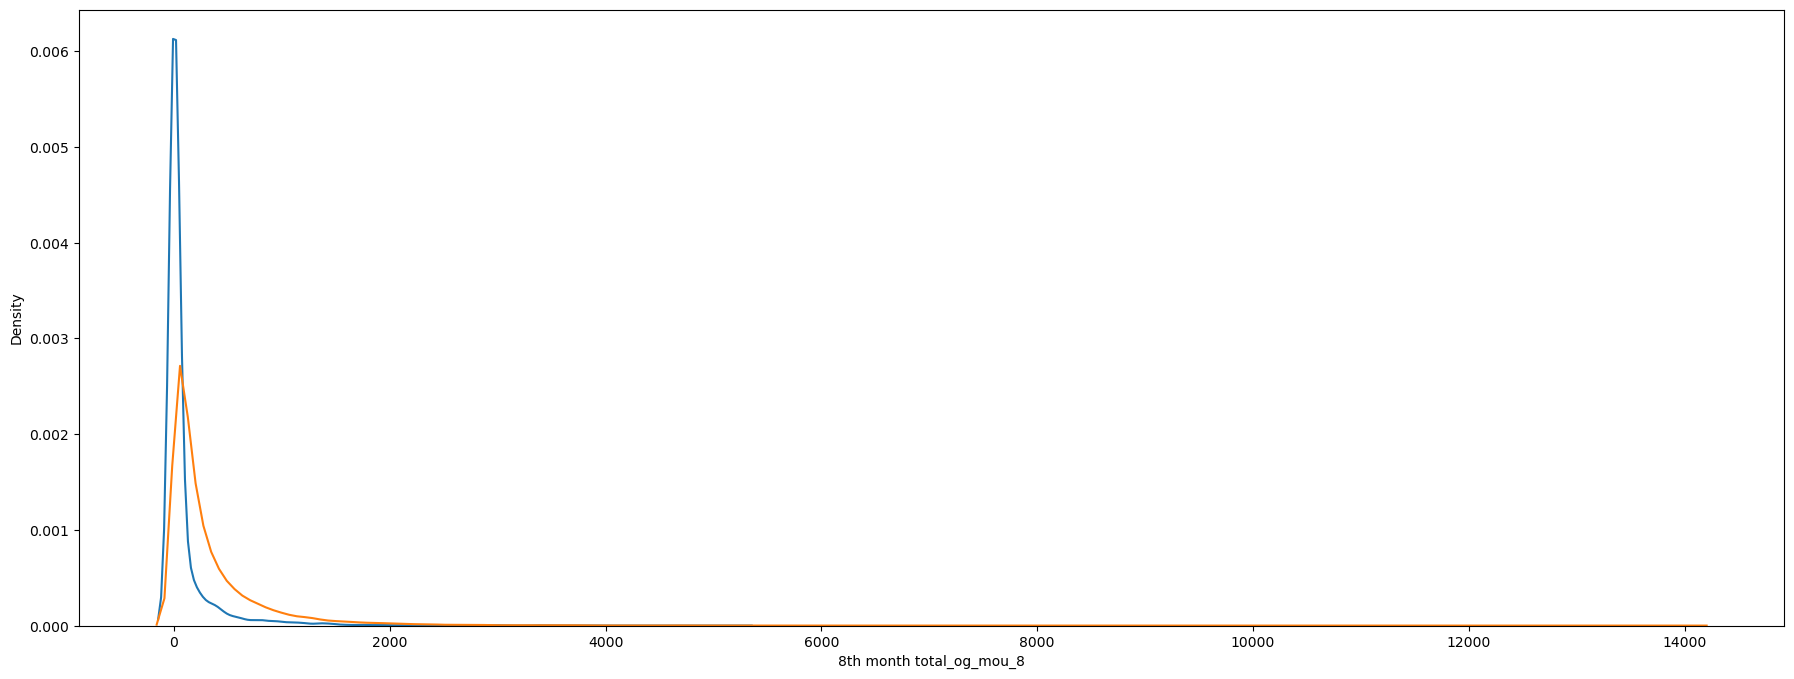

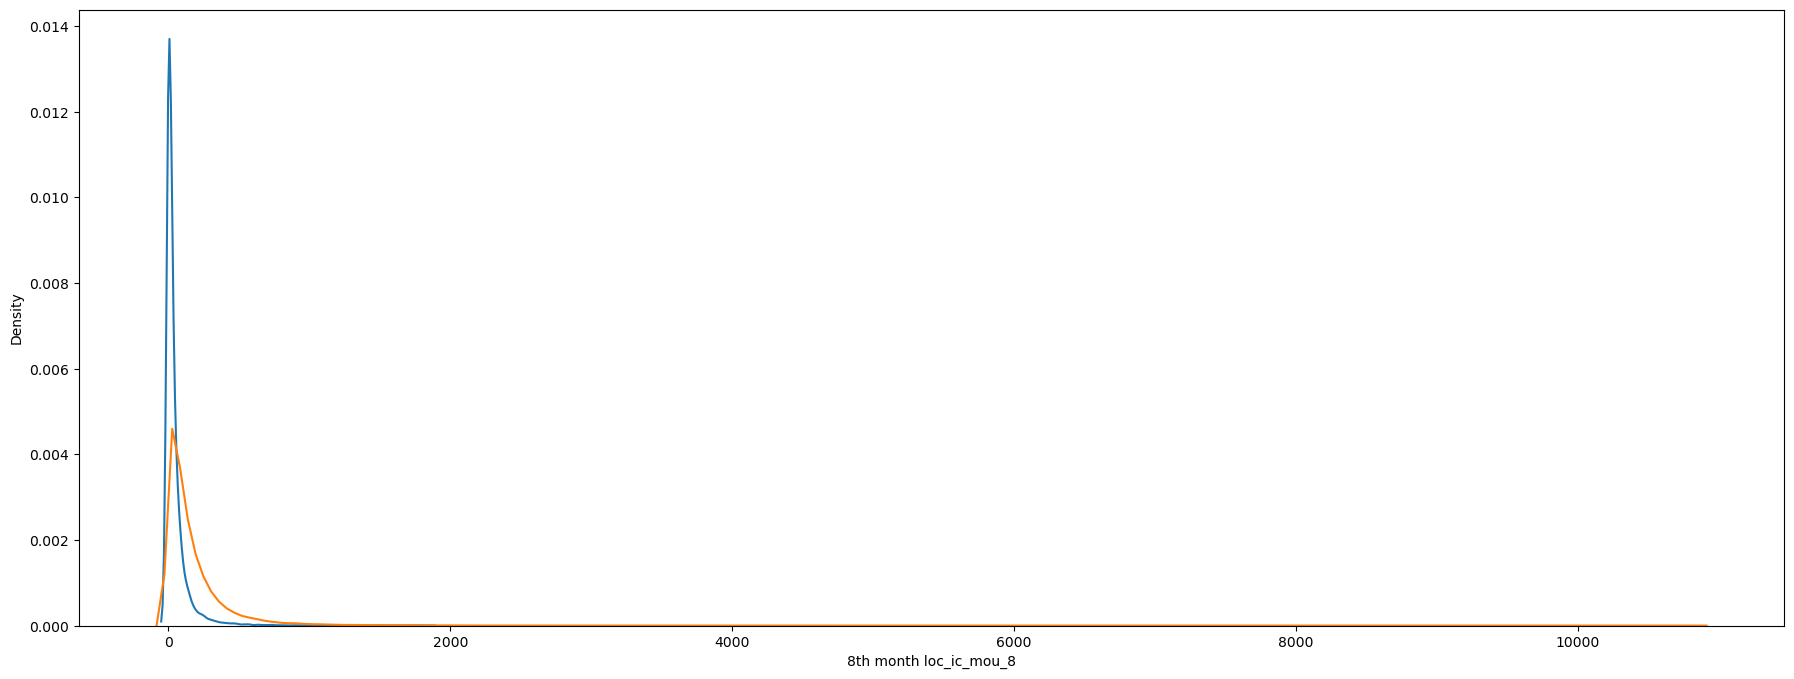

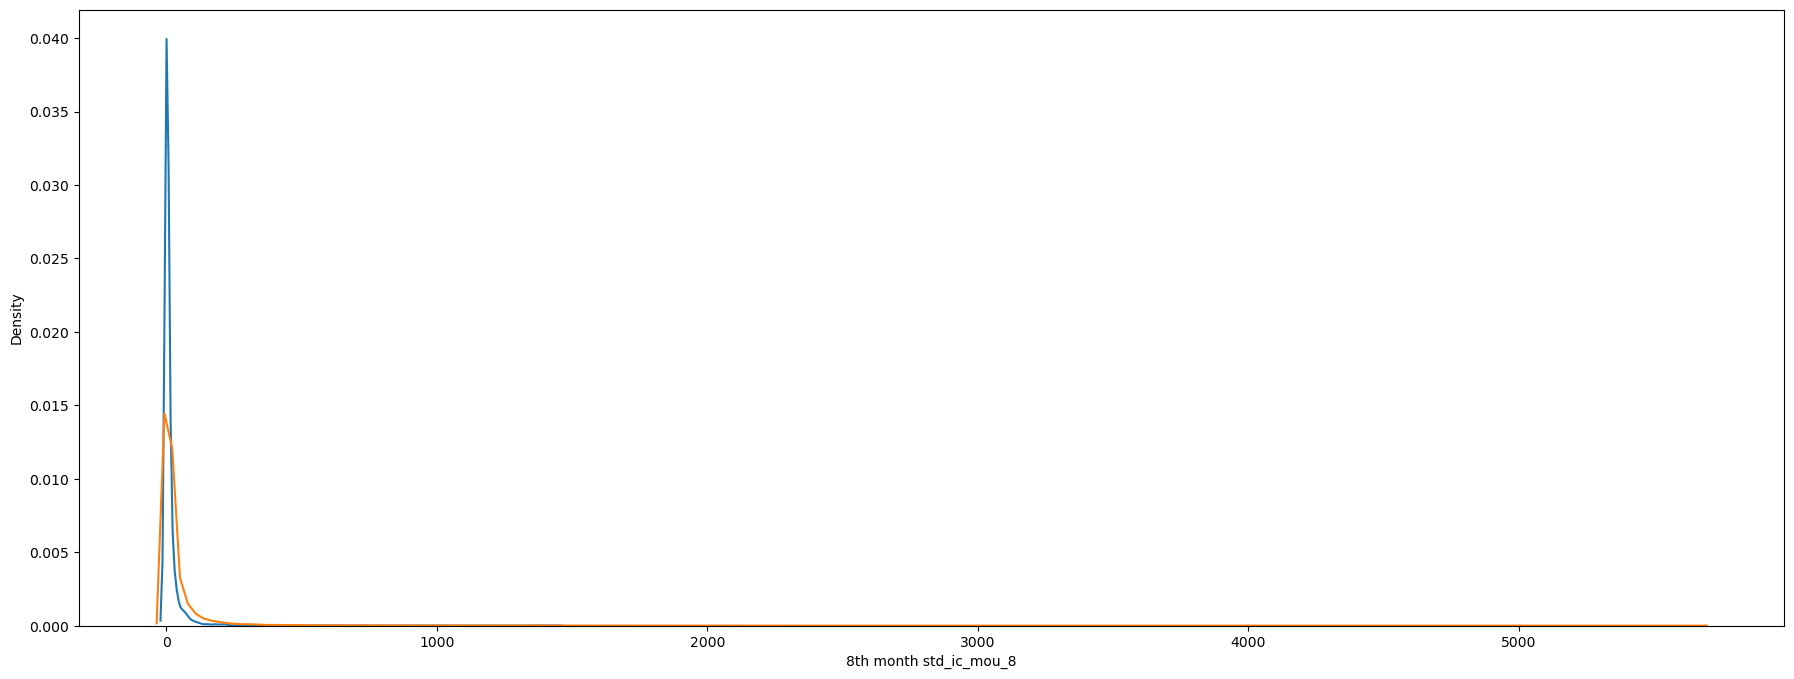

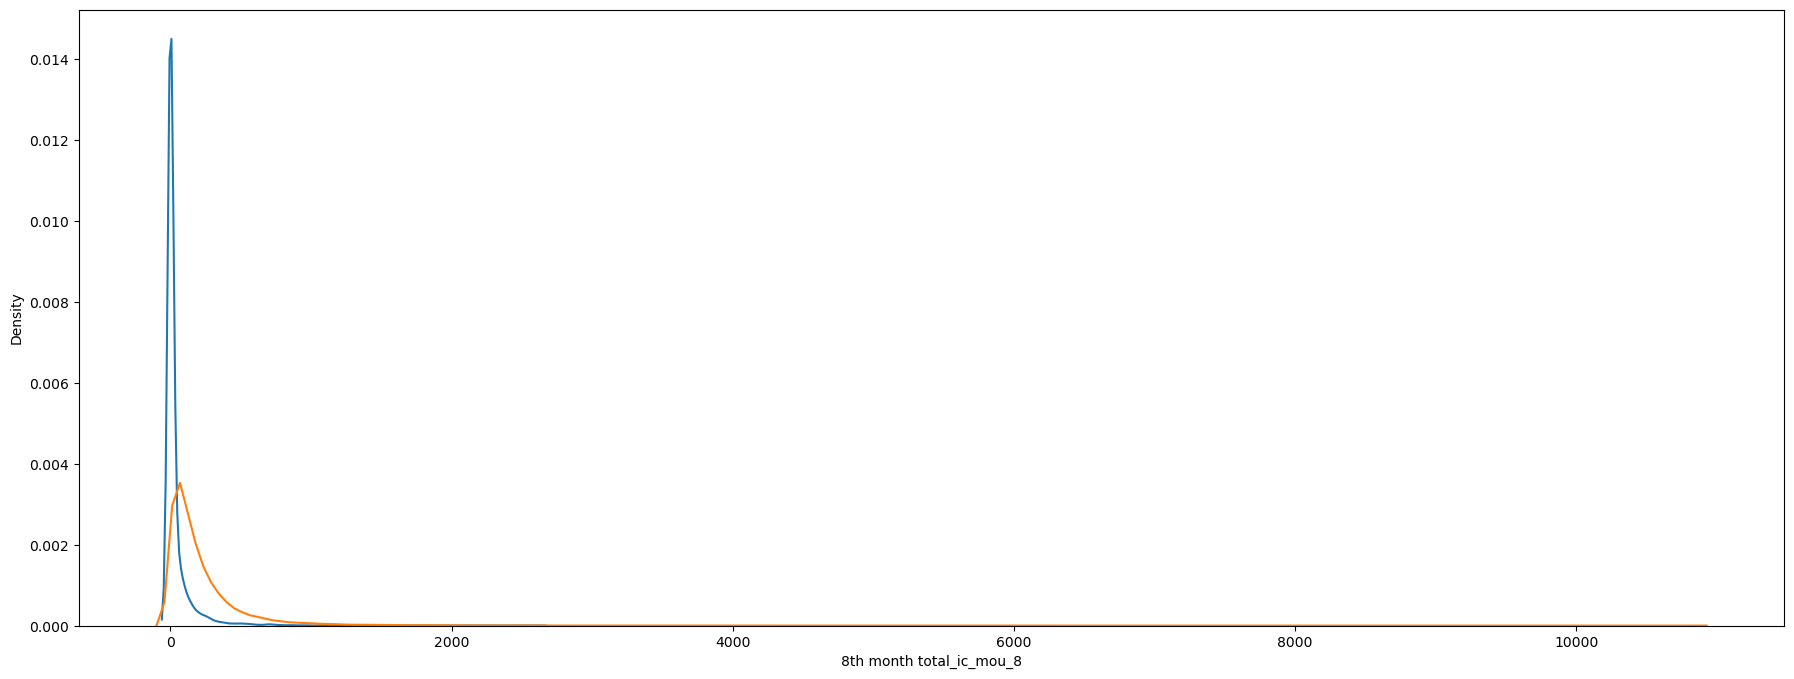

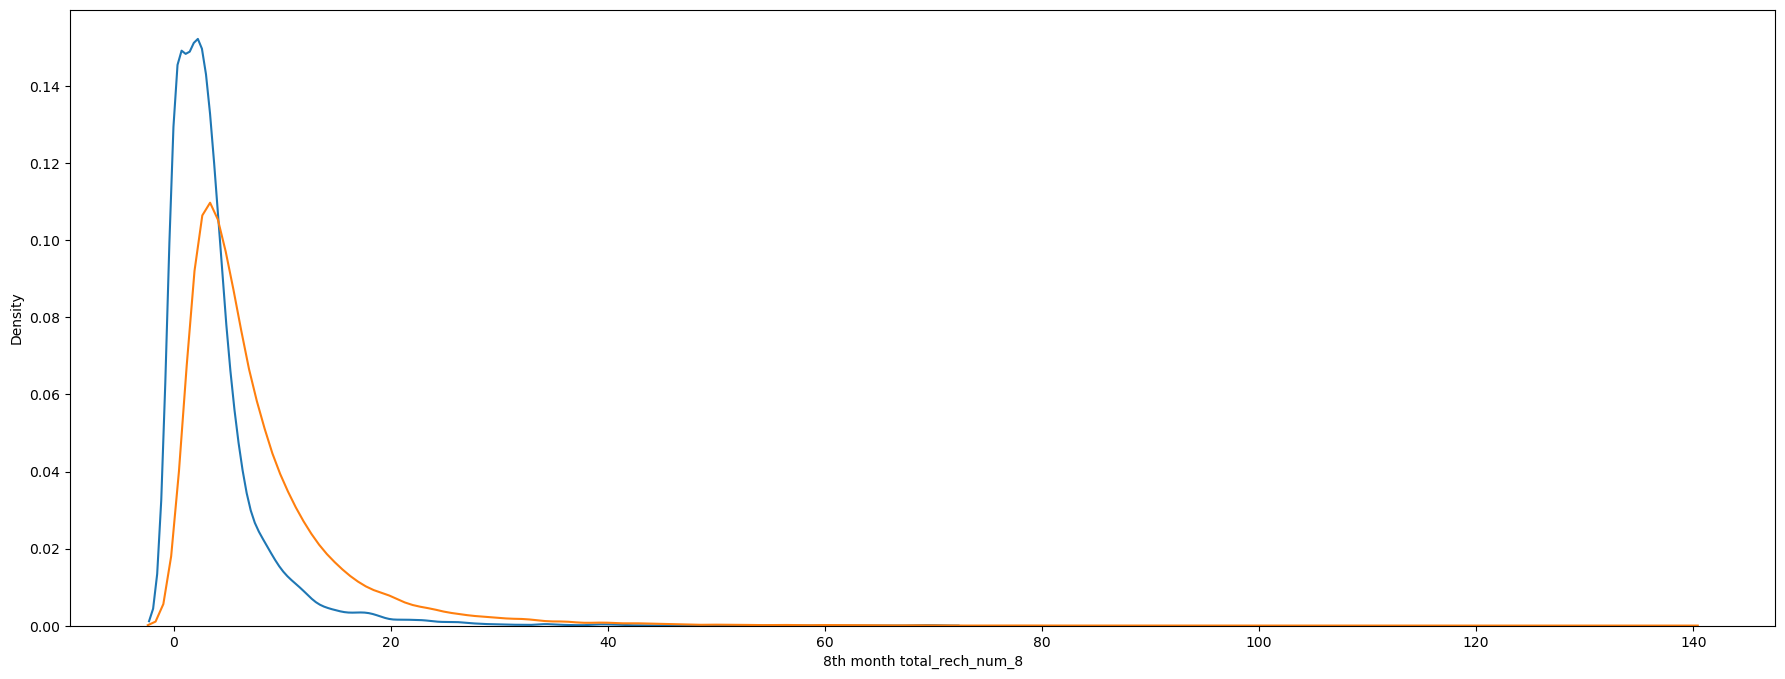

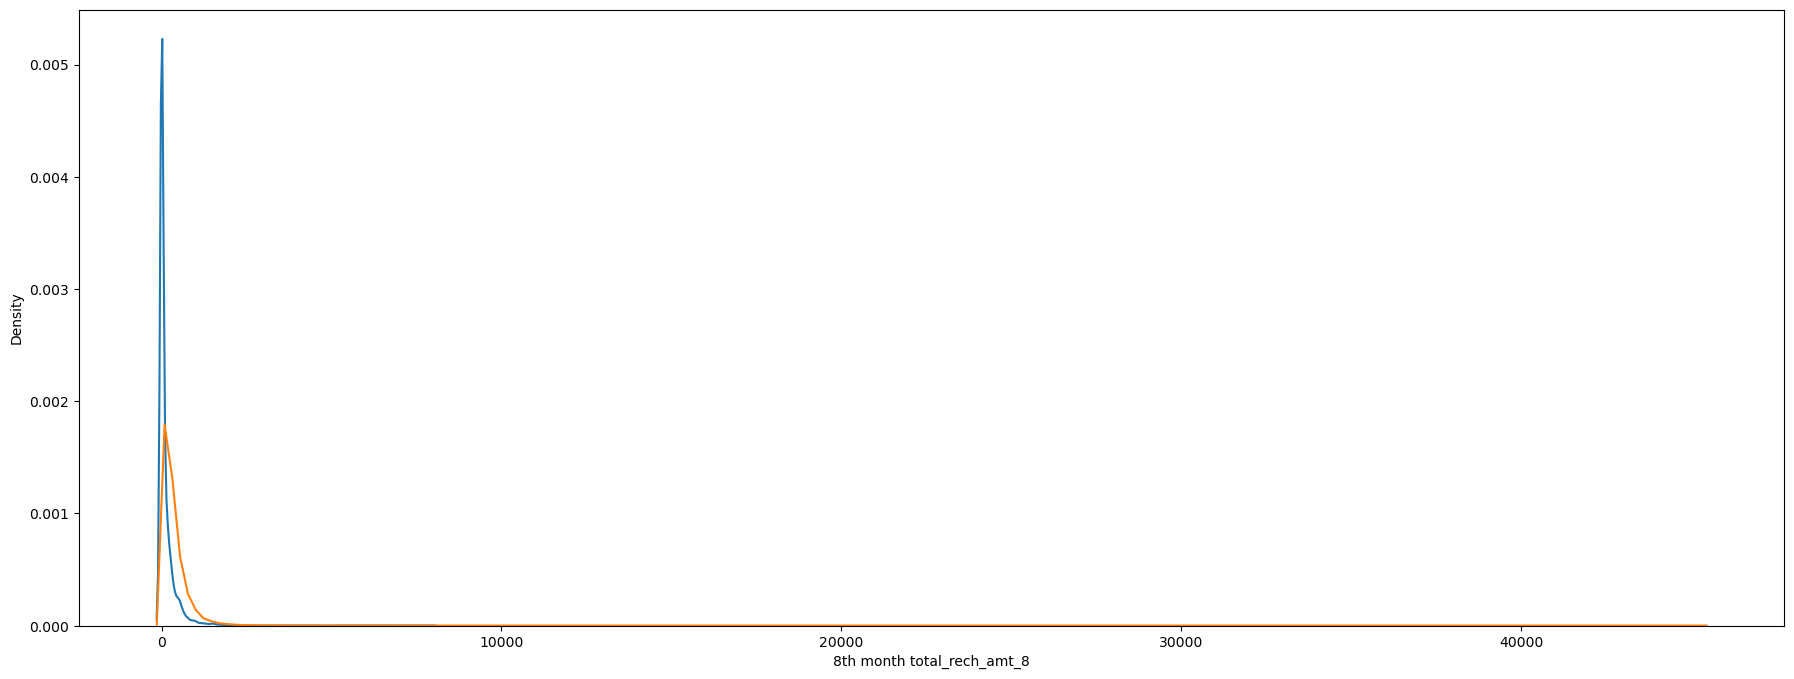

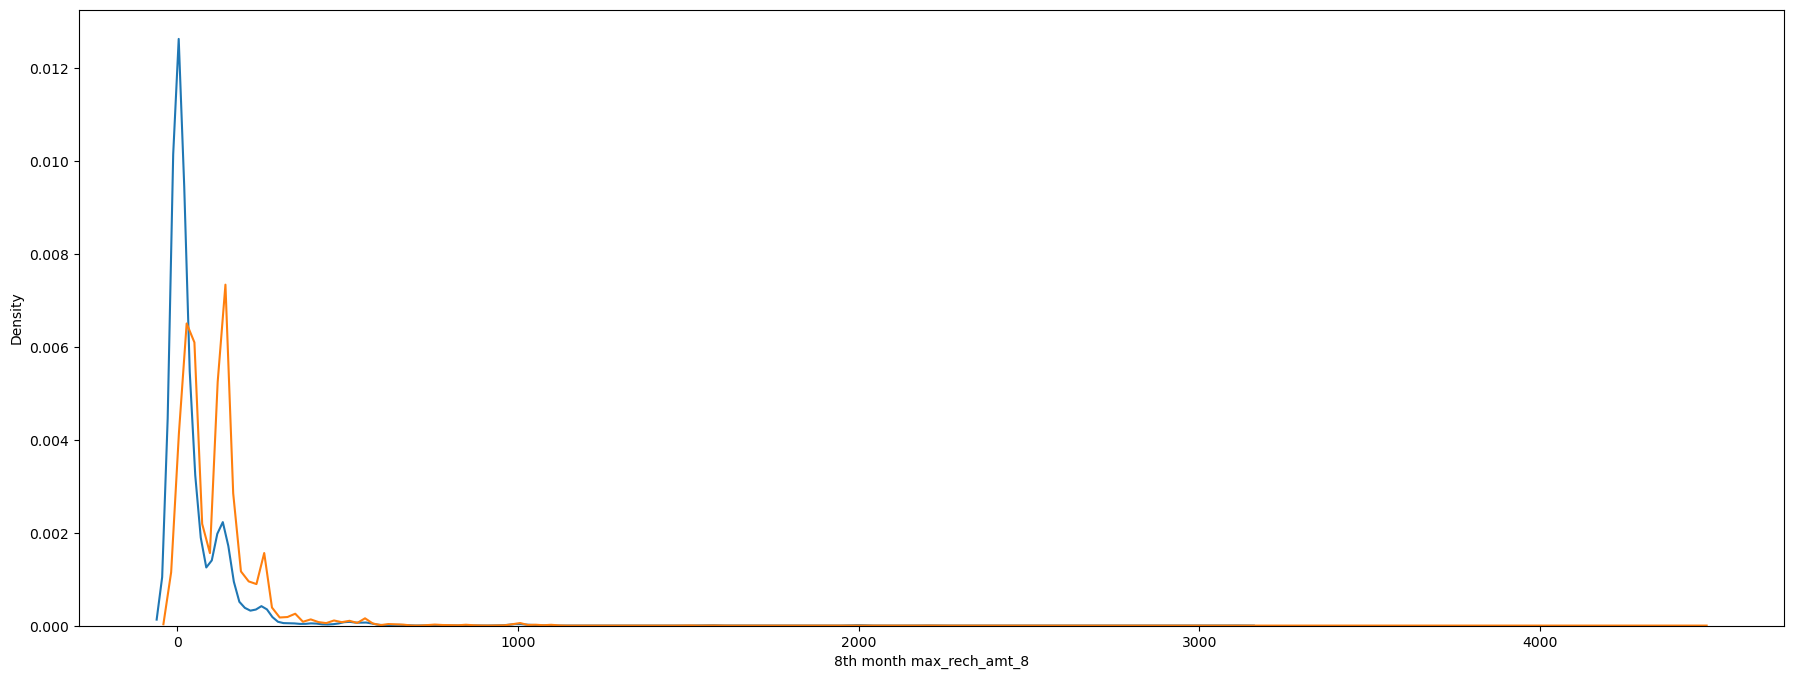

In [252]:
for col in ['arpu',
        'onnet_mou',
        'offnet_mou',
        'loc_og_mou',
        'std_og_mou',
        'total_og_mou',
        'loc_ic_mou',
        'std_ic_mou',
        'total_ic_mou',
        'total_rech_num',
        'total_rech_amt',
        'max_rech_amt']:
    plot_distplot(col + "_8")

#### Observations:
- As you can see from above plots, the following values are decreasing in the 8th month and the diff values calculated earlier are going in negative.
    - Average revenue per user
    - All kind of calls within the same operator network
    - All kind of calls outside the operator network
    - Outgoing calls
    - Incoming calls
    - Total recharge numbers
    - Total recharge amounts

- We can see the users that have these values going down in the 8th month have the churn probability of 1.

In [378]:
### Correlation matrix
cols_for_month_6 = [key for key in df.columns.to_list() if '_6' in key]
print(cols_for_month_6)

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6']


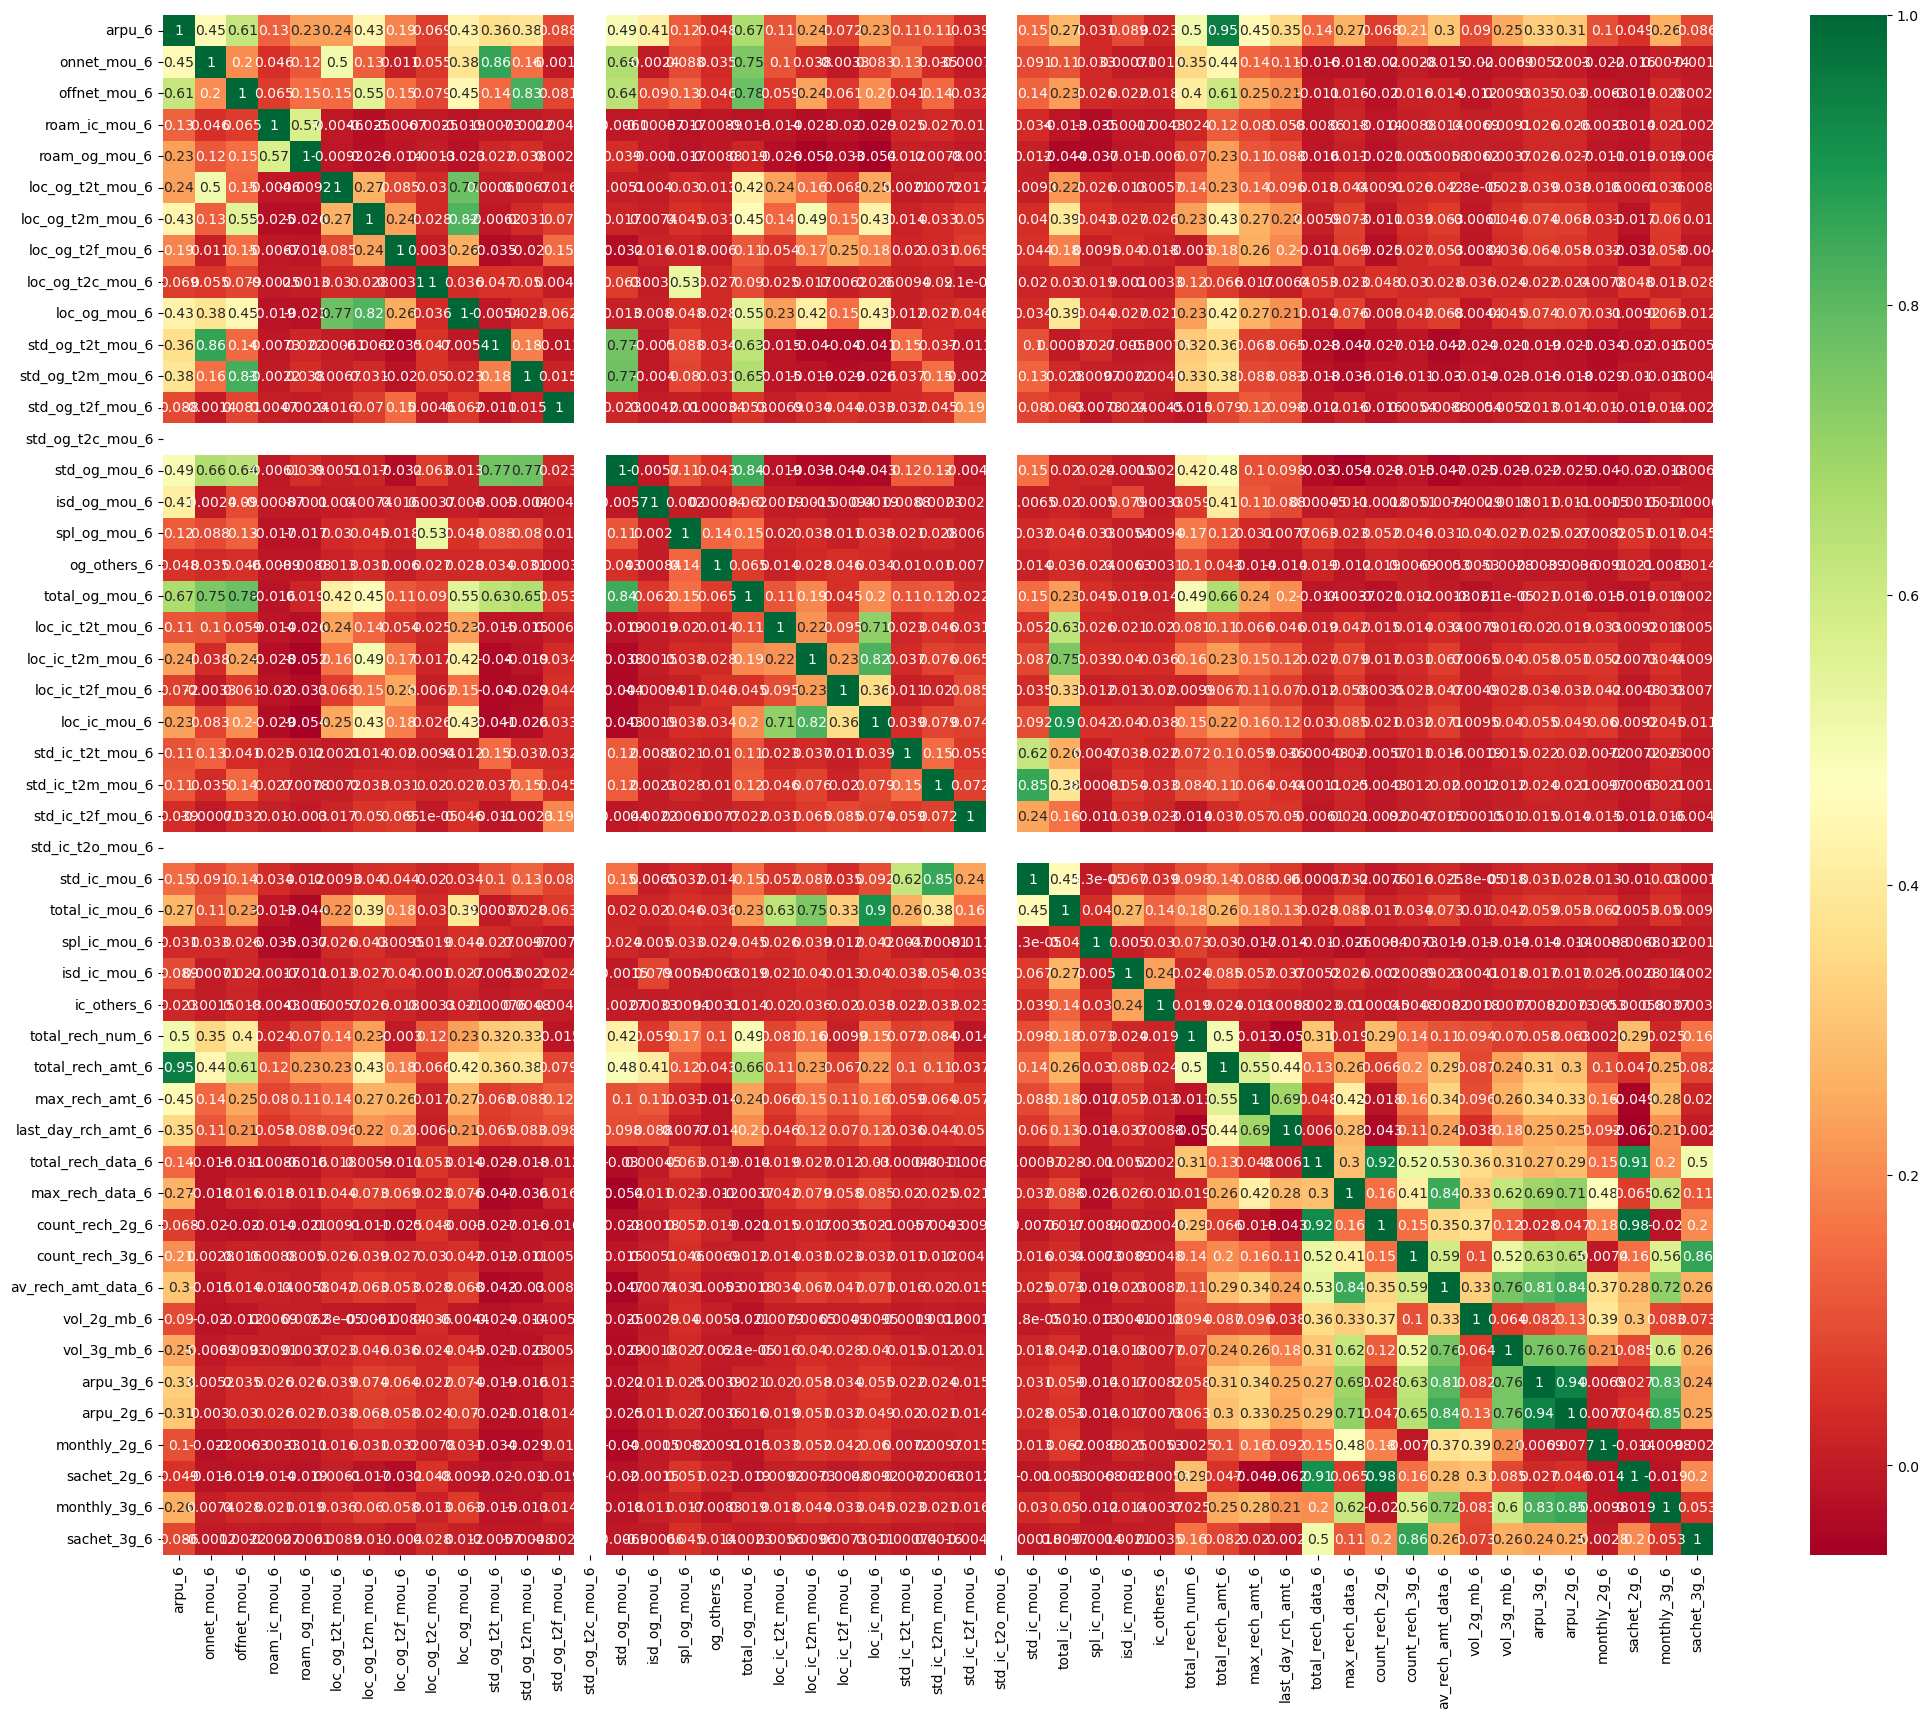

In [384]:
plt.figure(figsize=(25,20))
sns.heatmap(final_df.filter(cols_for_month_6).corr(), cmap="RdYlGn", annot=True)
plt.show()

### Observations
- There are some columns that are highly correlated - arpu_2g_6 and arpu_3g_6, total_rech_data_6 and count_rech_2g_6.

## 3. Train-Test Split

In [253]:
# Import library
from sklearn.model_selection import train_test_split

In [254]:
# Putting feature variables into X
X = final_df.drop(['churn_probability'], axis=1)

# putting target variable into y
y = final_df['churn_probability']

In [255]:
print(X.shape)
print(y.shape)

(69999, 204)
(69999,)


In [256]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y)

### Handling feature imbalance issue

In [257]:
y_train.value_counts(normalize=True)

0.0    0.898105
1.0    0.101895
Name: churn_probability, dtype: float64

In [258]:
# from imblearn.over_sampling import SMOTE

# # using smote to balance out the huge imbalance we have in target variable
# smote = SMOTE(random_state = 11)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# y_train.value_counts(normalize=True)

## 4. Feature Scaling

In [259]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler object
scaler = StandardScaler()

# List of the numeric columns
cols_scale = numeric_cols.to_list()
cols_scale.remove('churn_probability')

In [260]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [261]:
X_train.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
38032  38032.0             0.0             0.0             0.0 -0.556877   
69689  69689.0             0.0             0.0             0.0  0.044787   
8224    8224.0             0.0             0.0             0.0 -0.254604   
40850  40850.0             0.0             0.0             0.0 -0.420458   
69476  69476.0             0.0             0.0             0.0 -0.211296   

         arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
38032  0.120033  0.324957    -0.105379     1.038697     1.288627   
69689 -0.658981 -0.790743    -0.128545    -0.306140    -0.401053   
8224  -0.210251  0.595181     0.275153     0.715990     2.260649   
40850 -0.342905 -0.336448    -0.125827    -0.185803    -0.144985   
69476 -0.268100 -0.226432    -0.409791    -0.374308    -0.385362   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
38032     -0.563542     -0.401750     -0.102596      -0.143309      -0.128999   
69689      0.251577     -0.530165     -0.535303      -0.170654      -0.128999   
8224      -0.269496      0.107368     -0.346938      -0.000582      -0.128999   
40850     -0.589761     -0.492489     -0.490385      -0.170654      -0.128999   
69476      0.003817     -0.142430     -0.133021      -0.170654      -0.128999   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
38032      -0.137130       0.374945      -0.169772      -0.148199   
69689      -0.124896      -0.194621      -0.169772      -0.120441   
8224       -0.137130       0.242562      -0.169772      -0.148199   
40850      -0.137130      -0.194621      -0.169772      -0.148199   
69476      -0.137130      -0.194621      -0.169772      -0.148199   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
38032         -0.305178         -0.205238         -0.196885         -0.532781   
69689          0.073775         -0.239176         -0.265585          0.822419   
8224          -0.305178         -0.282490         -0.286772         -0.463950   
40850          0.310318          0.183530          0.235216         -0.514658   
69476         -0.251791         -0.195334         -0.229044         -0.530298   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
38032         -0.386997         -0.160412         -0.276255         -0.269581   
69689         -0.477158         -0.470481         -0.018903         -0.269581   
8224          -0.545451         -0.542985         -0.276255         -0.269581   
40850         -0.363029         -0.372879         -0.276255         -0.269581   
69476         -0.520498         -0.516759         -0.276255         -0.269581   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
38032         -0.270806         -0.206783          1.535918          0.691399   
69689         -0.270806          2.339732          0.662098         -0.206272   
8224          -0.270806          0.961464         -0.176606         -0.218960   
40850         -0.270806         -0.206783          0.097560         -0.218960   
69476         -0.270806         -0.206783         -0.176606         -0.218960   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
38032     -0.539368     -0.385725     -0.237800         -0.053554   
69689      0.572979     -0.463409     -0.473926         -0.173318   
8224      -0.495008     -0.533271     -0.532343          0.409124   
40850     -0.161492     -0.128301     -0.099104         -0.310980   
69476     -0.505968     -0.463285     -0.479774         -0.310980   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
38032          1.349636          1.643005         -0.321956         -0.255503   
69689         -0.204179         -0.304472         -0.226614         -0.334115   
8224           1.017024          2.837280         -0.102509          0.503812   
40850         -0.309424         -0.293198   

In [262]:
X_train.shape

(55999, 204)

#### Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

In [263]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
final_unseen_df[cols_scale] = scaler.transform(final_unseen_df[cols_scale])

X_test.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
25294  25294.0             0.0             0.0             0.0 -0.467253   
24327  24327.0             0.0             0.0             0.0 -0.417500   
58676  58676.0             0.0             0.0             0.0  0.286387   
32271  32271.0             0.0             0.0             0.0 -0.105466   
25682  25682.0             0.0             0.0             0.0  0.407360   

         arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
25294 -0.737810 -0.690576    -0.309011    -0.408245    -0.412715   
24327 -0.405728 -0.787982    -0.315533    -0.389256    -0.414058   
58676 -0.519802 -0.477768     0.721310    -0.383737    -0.083106   
32271 -0.786219  0.448396    -0.275112    -0.423357     0.177515   
25682  0.264972  0.380002     2.122246     1.898340     1.021913   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
25294     -0.474361     -0.602302     -0.581849      -0.170654      -0.128999   
24327     -0.516621     -0.428865     -0.589307       0.237413       0.183531   
58676     -0.499153     -0.543943     -0.500538      -0.170654      -0.128999   
32271     -0.126419     -0.487886      0.721018       2.464401      -0.128999   
25682     -0.259794     -0.139593      0.186460      -0.170654      -0.128999   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
25294      -0.137130      -0.194621      -0.169772      -0.148199   
24327      -0.091632       0.177278       0.263032      -0.142616   
58676      -0.137130      -0.194621      -0.169772      -0.148199   
32271      -0.137130       2.147949      -0.169772      -0.148199   
25682      -0.137130      -0.194621      -0.169772       0.304772   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
25294         -0.052296         -0.263540         -0.284070         -0.543828   
24327         -0.303295         -0.269945         -0.286772         -0.553448   
58676         -0.126930         -0.284074         -0.284927         -0.345529   
32271         -0.272836         -0.293912          0.903304         -0.384320   
25682         -0.280905         -0.286121         -0.273988         -0.322255   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
25294         -0.578350         -0.566689         -0.276255         -0.269581   
24327         -0.334661         -0.579901         -0.276255         -0.269581   
58676         -0.456801         -0.391736         -0.249448         -0.269581   
32271         -0.555761          1.999312         -0.276255         -0.269581   
25682         -0.430534         -0.427921         -0.276255         -0.269581   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
25294         -0.270806         -0.206783         -0.176606         -0.218960   
24327         -0.270806          0.751442         -0.176606         -0.218960   
58676         -0.270806         -0.206783         -0.176606         -0.218960   
32271         -0.123283         -0.206783         -0.176606          0.515354   
25682         -0.270806          0.301395          1.098333         -0.218960   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
25294     -0.396009     -0.542081     -0.545361         -0.310980   
24327     -0.551528     -0.393300     -0.555321         -0.233580   
58676     -0.311210     -0.478641     -0.437000          0.948041   
32271     -0.424409     -0.546857      1.804413         -0.310980   
25682     -0.389209     -0.463491     -0.452663          2.691163   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
25294         -0.309424         -0.304472         -0.180498         -0.338901   
24327         -0.309424         -0.304472         -0.300511         -0.338901   
58676         -0.268833          0.083153         -0.334665         -0.338901   
32271         -0.309424         -0.304472   

## 5. Model with PCA

In [264]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100)

In [265]:
# Principal components
pca.components_

array([[-1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.51041431e-07, -1.01081627e-07,  6.51720143e-09],
       [-1.33821879e-06,  1.66533454e-16, -3.33066907e-16, ...,
         7.53257709e-03,  5.34330243e-03,  1.25326689e-02],
       [-6.65216120e-07,  2.22044605e-16,  0.00000000e+00, ...,
        -3.75400105e-03,  1.48473027e-03,  1.54273634e-02],
       ...,
       [ 0.00000000e+00, -4.21788754e-04,  5.71728883e-04, ...,
        -5.33078552e-04, -4.97098423e-04, -3.69427507e-04],
       [ 0.00000000e+00, -1.40670813e-17,  2.56211253e-17, ...,
        -7.36614814e-17, -1.39524806e-16, -8.05346141e-17],
       [ 0.00000000e+00, -5.39096380e-01, -3.03752341e-01, ...,
        -3.89089299e-02, -2.78200147e-02, -5.63539652e-03]])

In [266]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.99999953 0.99999957 0.99999961 0.99999963 0.99999966 0.99999967
 0.99999969 0.99999971 0.99999972 0.99999973 0.99999974 0.99999975
 0.99999975 0.99999976 0.99999977 0.99999978 0.99999979 0.99999979
 0.9999998  0.99999981 0.99999981 0.99999982 0.99999982 0.99999983
 0.99999984 0.99999984 0.99999985 0.99999985 0.99999986 0.99999986
 0.99999987 0.99999987 0.99999988 0.99999988 0.99999988 0.99999989
 0.99999989 0.9999999  0.9999999  0.9999999  0.99999991 0.99999991
 0.99999991 0.99999992 0.99999992 0.99999992 0.99999993 0.99999993
 0.99999993 0.99999993 0.99999994 0.99999994 0.99999994 0.99999995
 0.99999995 0.99999995 0.99999995 0.99999995 0.99999996 0.99999996
 0.99999996 0.99999996 0.99999996 0.99999997 0.99999997 0.99999997
 0.99999997 0.99999997 0.99999997 0.99999998 0.99999998 0.99999998
 0.99999998 0.99999998 0.99999998 0.99999998 0.99999998 0.99999998
 0.99999998 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.9999

Text(0, 0.5, 'Cumulative Variance')

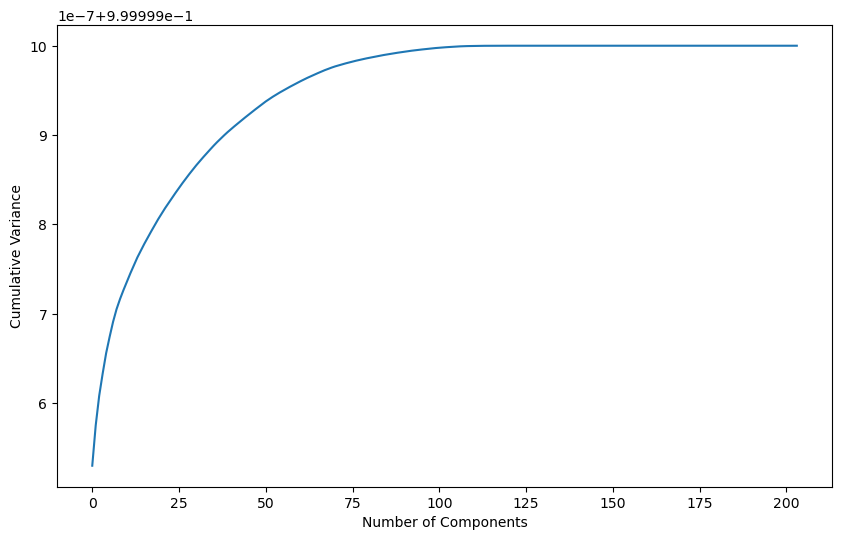

In [267]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that somewhere between 30 and 50 components, we get 90% variance explaination of the data.
So, let's perform PCA with 50 components.

In [268]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

# Instantiate PCA with 15 components
pca_final = IncrementalPCA(n_components=50)

# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [269]:
X_test_pca = pca_final.transform(X_test)

In [270]:
final_unseen_df_pca = pca_final.transform(final_unseen_df)

## 6. Logistic regression with PCA

In [271]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [272]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as accuracy as we are more focused on acheiving higher accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [273]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.292062      0.016269         0.001915        0.000498    0.01   
1       0.287520      0.014429         0.001527        0.000422     0.1   
2       0.273942      0.014359         0.001480        0.000221       1   
3       0.275893      0.013284         0.001510        0.000234      10   
4       0.276094      0.009633         0.001303        0.000011     100   
5       0.283678      0.015322         0.001519        0.000296    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.898482           0.903304           0.894464   
1   {'C': 0.1}           0.900893           0.903571           0.894464   
2     {'C': 1}           0.898393           0.902589           0.894464   
3    {'C': 10}           0.900893           0.903036           0.894286   
4   {'C': 100}           0.900893           0.903839           0.894464   
5  {'C': 1000}           0.900268           0.904464           0.894464   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.902500           0.903474         0.900445        0.003498   
1           0.902411           0.903652         0.900998        0.003417   
2           0.903661           0.903652         0.900552        0.003610   
3           0.902768           0.903295         0.900855        0.003392   
4           0.902768           0.903831         0.901159        0.003516   
5           0.903125           0.904188         0.901302        0.003728   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.901449            0.899574   
1                3            0.901806            0.899931   
2                5            0.900958            0.900087   
3                4            0.901895            0.900422   
4                2            0.901850            0.901382   
5                1            0.901806            0.900042   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.902520            0.900734            0.899866   
1            0.902654            0.900109            0.899665   
2            0.902632            0.900913            0.899643   
3            0.902944            0.900958            0.899844   
4            0.902609            0.900958            0.900446   
5            0.902699            0.900868            0.900871   

   mean_train_score  std_train_score  
0          0.900829         0.001073  
1          0.900833         0.001180  
2          0.900846         0.001023  
3          0.901213         0.001098  
4          0.901449         0.000743  
5          0.901257         0.000912

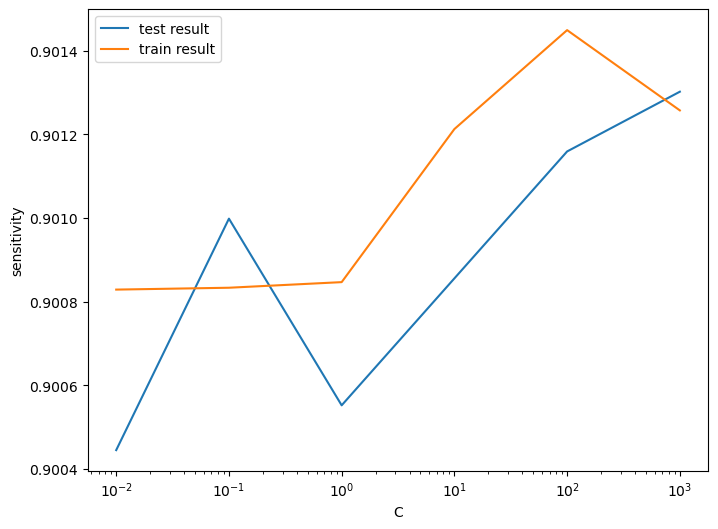

In [274]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [275]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9013018604977485 at C = 1000


### Logistic regression with optimal C

In [276]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [277]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)


In [278]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [279]:
def evaluate_model(y_test, y_pred):
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix:- ")
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:-", accuracy)

    # Sensitivity
    sensitivity = TP / float(TP+FN)
    print("Sensitivity:-", sensitivity)

    # Specificity
    specificity = TN / float(TN+FP)
    print("Specificity:-", specificity)

    # Precision
    precision = precision_score(y_test, y_pred)
    print("Precision:-", precision)

    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:-", recall)

    return {
        'Accuracy': accuracy, 
        'Sensitivity': sensitivity, 
        'Specificity': specificity, 
        'Precision': precision, 
        'Recall': recall
    }

In [280]:
train_metrics = evaluate_model(y_train, y_train_pred)

Confusion matrix:- 
[[49784   509]
 [ 5024   682]]
Accuracy:- 0.9011946641904319
Sensitivity:- 0.11952330879775674
Specificity:- 0.9898793072594596
Precision:- 0.5726280436607892
Recall:- 0.11952330879775674


#### Prediction on the test set

In [281]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [282]:
test_metrics = evaluate_model(y_test, y_test_pred)

Confusion matrix:- 
[[12475    99]
 [ 1264   162]]
Accuracy:- 0.9026428571428572
Sensitivity:- 0.11360448807854137
Specificity:- 0.992126610466041
Precision:- 0.6206896551724138
Recall:- 0.11360448807854137


#### Model Summary

In [283]:
table = {'Metric': ['Accuracy (Train)','Accuracy (Test)', 
                    'Sensitivity (Train)', 'Sensitivity (Test)', 
                    'Specificity (Train)', 'Specificity (Test)',
                    'Precision (Train)', 'Precision (Test)',
                    'Recall (Train)', 'Recall (Test)'
                   ]}
metric = pd.DataFrame(table, columns = ['Metric'] )

log_reg_with_pca = [
    round(train_metrics['Accuracy'], 4),
    round(test_metrics['Accuracy'], 4),
    round(train_metrics['Sensitivity'], 4),
    round(test_metrics['Sensitivity'], 4),
    round(train_metrics['Specificity'], 4),
    round(test_metrics['Specificity'], 4),
    round(train_metrics['Precision'], 4),
    round(test_metrics['Precision'], 4),
    round(train_metrics['Recall'], 4),
    round(test_metrics['Recall'], 4),
]

log_reg_with_pca_summary = pd.Series(log_reg_with_pca, name = 'Logistic Regression with PCA')
model_summary = pd.concat([metric, log_reg_with_pca_summary], axis=1)
model_summary

Metric  Logistic Regression with PCA
0     Accuracy (Train)                        0.9012
1      Accuracy (Test)                        0.9026
2  Sensitivity (Train)                        0.1195
3   Sensitivity (Test)                        0.1136
4  Specificity (Train)                        0.9899
5   Specificity (Test)                        0.9921
6    Precision (Train)                        0.5726
7     Precision (Test)                        0.6207
8       Recall (Train)                        0.1195
9        Recall (Test)                        0.1136

## 7. Decision tree with PCA

In [284]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparamter tuning

In [285]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [286]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.064827      0.009978         0.001949        0.000060   
1       1.060236      0.014334         0.001903        0.000037   
2       1.061942      0.011126         0.001912        0.000028   
3       1.069932      0.015426         0.001958        0.000056   
4       1.887100      0.020356         0.002213        0.000061   
5       1.879437      0.018110         0.002211        0.000075   
6       1.834486      0.003236         0.002231        0.000065   
7       1.840639      0.016607         0.002189        0.000037   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.900982   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.900982   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.901518   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.901518   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.902857   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.901518   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.904196   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.904196   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.902768           0.898482           0.904375           0.899009   
1           0.902768           0.898482           0.904375           0.899902   
2           0.901964           0.898036           0.902500           0.899812   
3           0.901964           0.898036           0.902500           0.899812   
4           0.905268           0.901875           0.905804           0.901866   
5           0.905268           0.902232           0.905893           0.903295   
6           0.909107           0.903036           0.905536           0.906688   
7           0.909107           0.903036           0.905536           0.906688   

   mean_test_score  std_test_score  rank_test_score  
0         0.901123        0.002225                6  
1         0.901302        0.002079                5  
2         0.900766        0.001635                7  
3         0.900766        0.001635                7  
4         0.903534        0.001682                4  
5         0.903641        0.001693                3  
6         0.905713        0.002096                1  
7         0.905713        0.002096                1

In [287]:
# Printing the optimal sensitivity score and hyperparameters
print("Best accuracy: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best accuracy:  0.9057126194303062
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


Model with optimal hyperparameters

In [288]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

In [289]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [290]:
train_metrics = evaluate_model(y_train, y_train_pred)

Confusion matrix:- 
[[48982  1311]
 [ 3497  2209]]
Accuracy:- 0.9141413239522135
Sensitivity:- 0.38713634770417105
Specificity:- 0.9739327540612014
Precision:- 0.6275568181818182
Recall:- 0.38713634770417105


Prediction on the test set

In [291]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [292]:
test_metrics = evaluate_model(y_test, y_test_pred)

Confusion matrix:- 
[[12181   393]
 [  982   444]]
Accuracy:- 0.9017857142857143
Sensitivity:- 0.31136044880785413
Specificity:- 0.9687450294257993
Precision:- 0.5304659498207885
Recall:- 0.31136044880785413


#### Model Summary

In [293]:
dt_with_pca = [
    round(train_metrics['Accuracy'], 4),
    round(test_metrics['Accuracy'], 4),
    round(train_metrics['Sensitivity'], 4),
    round(test_metrics['Sensitivity'], 4),
    round(train_metrics['Specificity'], 4),
    round(test_metrics['Specificity'], 4),
    round(train_metrics['Precision'], 4),
    round(test_metrics['Precision'], 4),
    round(train_metrics['Recall'], 4),
    round(test_metrics['Recall'], 4),
]

dt_with_pca_summary = pd.Series(dt_with_pca, name = 'Decision Tree with PCA')

model_summary = pd.concat([metric, log_reg_with_pca_summary, dt_with_pca_summary], axis=1)
model_summary

Metric  Logistic Regression with PCA  Decision Tree with PCA
0     Accuracy (Train)                        0.9012                  0.9141
1      Accuracy (Test)                        0.9026                  0.9018
2  Sensitivity (Train)                        0.1195                  0.3871
3   Sensitivity (Test)                        0.1136                  0.3114
4  Specificity (Train)                        0.9899                  0.9739
5   Specificity (Test)                        0.9921                  0.9687
6    Precision (Train)                        0.5726                  0.6276
7     Precision (Test)                        0.6207                  0.5305
8       Recall (Train)                        0.1195                  0.3871
9        Recall (Test)                        0.1136                  0.3114

## 8. Random forest with PCA

In [294]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

Hyperparameter tuning

In [295]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [296]:
# Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of', grid_search.best_score_, 'using', grid_search.best_params_)

We can get accuracy of 0.9014268187833882 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [297]:
# Model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=200)

In [298]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

Predictions on the train set

In [299]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [300]:
train_metrics = evaluate_model(y_train, y_train_pred)

Confusion matrix:- 
[[50190   103]
 [ 5349   357]]
Accuracy:- 0.9026411185914034
Sensitivity:- 0.06256572029442692
Specificity:- 0.9979520012725429
Precision:- 0.7760869565217391
Recall:- 0.06256572029442692


Prediction on the test set

In [301]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [302]:
test_metrics = evaluate_model(y_test, y_test_pred)

Confusion matrix:- 
[[12536    38]
 [ 1358    68]]
Accuracy:- 0.9002857142857142
Sensitivity:- 0.047685834502103785
Specificity:- 0.9969778908859551
Precision:- 0.6415094339622641
Recall:- 0.047685834502103785


#### Model Summary

In [303]:
rfc_with_pca = [
    round(train_metrics['Accuracy'], 4),
    round(test_metrics['Accuracy'], 4),
    round(train_metrics['Sensitivity'], 4),
    round(test_metrics['Sensitivity'], 4),
    round(train_metrics['Specificity'], 4),
    round(test_metrics['Specificity'], 4),
    round(train_metrics['Precision'], 4),
    round(test_metrics['Precision'], 4),
    round(train_metrics['Recall'], 4),
    round(test_metrics['Recall'], 4),
]

rfc_with_pca_summary = pd.Series(rfc_with_pca, name = 'Random Forest with PCA')

model_summary = pd.concat([metric, log_reg_with_pca_summary, dt_with_pca_summary, rfc_with_pca_summary], axis=1)
model_summary

Metric  Logistic Regression with PCA  Decision Tree with PCA  \
0     Accuracy (Train)                        0.9012                  0.9141   
1      Accuracy (Test)                        0.9026                  0.9018   
2  Sensitivity (Train)                        0.1195                  0.3871   
3   Sensitivity (Test)                        0.1136                  0.3114   
4  Specificity (Train)                        0.9899                  0.9739   
5   Specificity (Test)                        0.9921                  0.9687   
6    Precision (Train)                        0.5726                  0.6276   
7     Precision (Test)                        0.6207                  0.5305   
8       Recall (Train)                        0.1195                  0.3871   
9        Recall (Test)                        0.1136                  0.3114   

   Random Forest with PCA  
0                  0.9026  
1                  0.9003  
2                  0.0626  
3                  0.0477  
4                  0.9980  
5                  0.9970  
6                  0.7761  
7                  0.6415  
8                  0.0626  
9                  0.0477

### Observations
- It seems Decision Tree model is giving the highest accuracy, with <1% difference in test-train accuracies.

## 9. Logistic Regression without PCA

In [304]:
# Importing stats model
import statsmodels.api as sm

In [305]:
# Instantiate the model
# Adding the constant to X_train
X_train_copy = X_train.drop(['id'], axis=1)
log_no_pca = sm.GLM(y_train, (sm.add_constant(X_train_copy)), family=sm.families.Binomial())

In [306]:
# Instantiate the model
# Adding the constant to X_train
# log_no_pca = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())

In [307]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [308]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55862
Model Family:                Binomial   Df Model:                          136
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Jul 2023   Deviance:                   4.1953e+05
Time:                        15:04:39   Pearson chi2:                 2.05e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.936e+14   2.84e+05   -2.8e+09      0.000   -7.94e+14   -7.94e+14
loc_og_t2o_mou         1.185e+26   7.74e+18   1.53e+07      0.000    1.19e+26    1.19e+26
std_og_t2o_mou        -1.596e+26   1.04e+19  -1.53e+07      0.000    -1.6e+26    -1.6e+26
loc_ic_t2o_mou        -2.132e+26   1.39e+19  -1.53e+07      0.000   -2.13e+26   -2.13e+26
arpu_6                  1.98e+24   1.29e+17   1.53e+07      0.000    1.98e+24    1.98e+24
arpu_7                 2.039e+24   1.33e+17   1.53e+07      0.000    2.04e+24    2.04e+24
arpu_8                -4.063e+24   2.65e+17  -1.53e+07      0.000   -4.06e+24   -4.06e+24
onnet_mou_6            1.617e+25   1.06e+18   1.53e+07      0.000    1.62e+25    1.62e+25
onnet_mou_7            1.671e+25   1.09e+18   1.53e+07      0.000    1.67e+25    1.67e+25
onnet_mou_8           -3.352e+25   2.19e+18  -1.53e+07      0.000   -3.35e+25   -3.35e+25
offnet_mou_6           2.997e+25   1.96e+18   1.53e+07      0.000       3e+25       3e+25
offnet_mou_7           3.014e+25   1.97e+18   1.53e+07      0.000    3.01e+25    3.01e+25
offnet_mou_8          -6.065e+25   3.96e+18  -1.53e+07      0.000   -6.07e+25   -6.07e+25
roam_ic_mou_6          1.156e+25   7.54e+17   1.53e+07      0.000    1.16e+25    1.16e+25
roam_ic_mou_7          1.084e+25   7.07e+17   1.53e+07      0.000    1.08e+25    1.08e+25
roam_ic_mou_8         -2.016e+25   1.32e+18  -1.53e+07      0.000   -2.02e+25   -2.02e+25
roam_og_mou_6         -4.367e+24   2.85e+17  -1.53e+07      0.000   -4.37e+24   -4.37e+24
roam_og_mou_7         -3.468e+24   2.26e+17  -1.53e+07      0.000   -3.47e+24   -3.47e+24
roam_og_mou_8          7.857e+24   5.13e+17   1.53e+07      0.000    7.86e+24    7.86e+24
loc_og_t2t_mou_6      -4.856e+24   3.17e+17  -1.53e+07      0.000   -4.86e+24   -4.86e+24
loc_og_t2t_mou_7      -4.945e+24   3.23e+17  -1.53e+07      0.000   -4.94e+24   -4.94e+24
loc_og_t2t_mou_8       9.909e+24   6.47e+17   1.53e+07      0.000    9.91e+24    9.91e+24
loc_og_t2m_mou_6       5.708e+24   3.73e+17   1.53e+07      0.000    5.71e+24    5.71e+24
loc_og_t2m_mou_7       5.395e+24   3.52e+17   1.53e+07      0.000     5.4e+24     5.4e+24
loc_og_t2m_mou_8      -1.067e+25   6.97e+17  -1.53e+07      0.000   -1.07e+25   -1.07e+25
loc_og_t2f_mou_6        -1.6e+25   1.04e+18  -1.53e+07      0.000    -1.6e+25    -1.6e+25
loc_og_t2f_mou_7      -1.673e+25   1.09e+18  -1.53e+07      0.000   -1.67e+25   -1.67e+25
loc_og_t2f_mou_8       3.173e+25   2.07e+18   1.53e+07      0.000    3.17e+25    3.17e+25
loc_og_t2c_mou_6        2.67e+23   1.74e+16   1.53e+07      0.000    2.67e+23    2.67e+23
loc_og_t2c_mou_7       3.707e+23   2.42e+16   1.53e+07      0.000    3.71e+23    3.71e+23
loc_og_t2c_mou_8      -6.314e+23   4.12e+16  -1.53e+07      0.000   -6.31e+23   -6.31e+23
loc_og_mou_6           

### Feature Selection Using RFE

In [309]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [310]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [311]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8',
       'diff_total_ic_mou'],
      dtype='object')


### Model with RFE selected features

In [312]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55984
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13121.
Date:                Tue, 04 Jul 2023   Deviance:                       26241.
Time:                        15:06:33   Pearson chi2:                 2.47e+12
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1729
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9500      0.049    -80.996      0.000      -4.046      -3.854
loc_og_mou_8          3.0002      0.272     11.031      0.000       2.467       3.533
std_og_t2t_mou_8      4.2482      1.815      2.341      0.019       0.691       7.806
std_og_t2m_mou_8      4.3581      1.848      2.358      0.018       0.736       7.980
std_og_mou_8         -0.1692      2.831     -0.060      0.952      -5.717       5.379
total_og_mou_8       -7.9381      0.517    -15.359      0.000      -8.951      -6.925
loc_ic_t2t_mou_8      2.4130      0.404      5.966      0.000       1.620       3.206
loc_ic_t2m_mou_8      1.7029      0.463      3.678      0.000       0.795       2.611
loc_ic_mou_8          1.6461      0.713      2.307      0.021       0.248       3.045
std_ic_t2t_mou_8      1.5533      0.085     18.378      0.000       1.388       1.719
std_ic_t2m_mou_8      2.2075      0.117     18.940      0.000       1.979       2.436
total_ic_mou_6       -2.3809      0.101    -23.603      0.000      -2.579      -2.183
total_ic_mou_7       -2.1808      0.101    -21.688      0.000      -2.378      -1.984
total_ic_mou_8       -4.3761      0.169    -25.882      0.000      -4.707      -4.045
isd_ic_mou_8          1.9184      0.080     24.049      0.000       1.762       2.075
diff_total_ic_mou    -3.2734      0.119    -27.559      0.000      -3.506      -3.041
=====================================================================================
"""

In [313]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
log_cols = rfe_cols.to_list()

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
10     total_ic_mou_6      inf
11     total_ic_mou_7      inf
12     total_ic_mou_8      inf
14  diff_total_ic_mou      inf
3        std_og_mou_8  3065.34
2    std_og_t2m_mou_8  1303.87
1    std_og_t2t_mou_8  1256.25
4      total_og_mou_8   127.83
7        loc_ic_mou_8   119.36
0        loc_og_mou_8    34.11
6    loc_ic_t2m_mou_8    22.12
5    loc_ic_t2t_mou_8    15.95
9    std_ic_t2m_mou_8     9.34
13       isd_ic_mou_8     5.76
8    std_ic_t2t_mou_8     4.76

Removing total_ic_mou_6 as it has highest VIF

In [315]:
# Removing total_ic_mou_6 column 
log_cols = rfe_cols.to_list()
log_cols.remove('total_ic_mou_6')
print(log_cols)

['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'diff_total_ic_mou']


#### Rebuilding after removing total_ic_mou_6

In [316]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55984
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13121.
Date:                Tue, 04 Jul 2023   Deviance:                       26241.
Time:                        15:06:42   Pearson chi2:                 2.47e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1729
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9500      0.049    -80.956      0.000      -4.046      -3.854
loc_og_mou_8          3.0002      0.272     11.031      0.000       2.467       3.533
std_og_t2t_mou_8      4.2482      1.818      2.336      0.019       0.684       7.812
std_og_t2m_mou_8      4.3580      1.852      2.354      0.019       0.729       7.987
std_og_mou_8         -0.1692      2.836     -0.060      0.952      -5.727       5.389
total_og_mou_8       -7.9381      0.517    -15.358      0.000      -8.951      -6.925
loc_ic_t2t_mou_8      2.4130      0.405      5.963      0.000       1.620       3.206
loc_ic_t2m_mou_8      1.7029      0.463      3.676      0.000       0.795       2.611
loc_ic_mou_8          1.6461      0.714      2.306      0.021       0.247       3.045
std_ic_t2t_mou_8      1.5533      0.085     18.367      0.000       1.388       1.719
std_ic_t2m_mou_8      2.2075      0.117     18.925      0.000       1.979       2.436
total_ic_mou_7        0.2706      0.074      3.636      0.000       0.125       0.416
total_ic_mou_8       -9.1498      0.366    -25.011      0.000      -9.867      -8.433
isd_ic_mou_8          1.9183      0.080     23.990      0.000       1.762       2.075
diff_total_ic_mou    -0.2564      0.044     -5.848      0.000      -0.342      -0.170
=====================================================================================
"""

Checking VIF for this model

In [317]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
3        std_og_mou_8  3065.34
2    std_og_t2m_mou_8  1303.87
1    std_og_t2t_mou_8  1256.25
4      total_og_mou_8   127.83
7        loc_ic_mou_8   119.36
11     total_ic_mou_8   117.24
0        loc_og_mou_8    34.11
6    loc_ic_t2m_mou_8    22.12
5    loc_ic_t2t_mou_8    15.95
10     total_ic_mou_7    11.43
9    std_ic_t2m_mou_8     9.34
12       isd_ic_mou_8     5.76
8    std_ic_t2t_mou_8     4.76
13  diff_total_ic_mou     4.46

Removing std_og_mou_8 as it has inf VIF

In [318]:
# Removing std_og_mou_8 column
log_cols.remove('std_og_mou_8')

#### Rebuilding after removing std_og_mou_8

In [319]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55985
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13121.
Date:                Tue, 04 Jul 2023   Deviance:                       26241.
Time:                        15:06:57   Pearson chi2:                 2.47e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1729
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9498      0.049    -81.031      0.000      -4.045      -3.854
loc_og_mou_8          3.0020      0.270     11.099      0.000       2.472       3.532
std_og_t2t_mou_8      4.1410      0.281     14.756      0.000       3.591       4.691
std_og_t2m_mou_8      4.2489      0.285     14.884      0.000       3.689       4.808
total_og_mou_8       -7.9423      0.512    -15.512      0.000      -8.946      -6.939
loc_ic_t2t_mou_8      2.4136      0.405      5.967      0.000       1.621       3.206
loc_ic_t2m_mou_8      1.7037      0.463      3.679      0.000       0.796       2.611
loc_ic_mou_8          1.6438      0.713      2.306      0.021       0.247       3.041
std_ic_t2t_mou_8      1.5529      0.084     18.403      0.000       1.388       1.718
std_ic_t2m_mou_8      2.2069      0.116     18.984      0.000       1.979       2.435
total_ic_mou_7        0.2706      0.074      3.636      0.000       0.125       0.416
total_ic_mou_8       -9.1482      0.365    -25.073      0.000      -9.863      -8.433
isd_ic_mou_8          1.9179      0.080     24.057      0.000       1.762       2.074
diff_total_ic_mou    -0.2564      0.044     -5.849      0.000      -0.342      -0.171
=====================================================================================
"""

Checking the VIF again

In [320]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3      total_og_mou_8  124.98
6        loc_ic_mou_8  119.23
10     total_ic_mou_8  116.88
2    std_og_t2m_mou_8   39.51
1    std_og_t2t_mou_8   38.36
0        loc_og_mou_8   33.47
5    loc_ic_t2m_mou_8   22.11
4    loc_ic_t2t_mou_8   15.94
9      total_ic_mou_7   11.43
8    std_ic_t2m_mou_8    9.32
11       isd_ic_mou_8    5.74
7    std_ic_t2t_mou_8    4.75
12  diff_total_ic_mou    4.46

Removing loc_ic_mou_8 as it has high p-value

In [321]:
# Removing loc_ic_mou_8 column
log_cols.remove('loc_ic_mou_8')

#### Rebuilding after removing loc_ic_mou_8

In [322]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55986
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13123.
Date:                Tue, 04 Jul 2023   Deviance:                       26246.
Time:                        15:07:04   Pearson chi2:                 6.93e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1728
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.9762      0.048    -83.444      0.000      -4.070      -3.883
loc_og_mou_8          3.1279      0.267     11.721      0.000       2.605       3.651
std_og_t2t_mou_8      4.2715      0.277     15.404      0.000       3.728       4.815
std_og_t2m_mou_8      4.3812      0.282     15.529      0.000       3.828       4.934
total_og_mou_8       -8.1863      0.505    -16.197      0.000      -9.177      -7.196
loc_ic_t2t_mou_8      3.2457      0.196     16.527      0.000       2.861       3.631
loc_ic_t2m_mou_8      2.6836      0.201     13.381      0.000       2.291       3.077
std_ic_t2t_mou_8      1.5025      0.081     18.499      0.000       1.343       1.662
std_ic_t2m_mou_8      2.1316      0.111     19.193      0.000       1.914       2.349
total_ic_mou_7        0.2687      0.074      3.609      0.000       0.123       0.415
total_ic_mou_8       -8.8795      0.344    -25.821      0.000      -9.554      -8.206
isd_ic_mou_8          1.8619      0.076     24.649      0.000       1.714       2.010
diff_total_ic_mou    -0.2592      0.044     -5.920      0.000      -0.345      -0.173
=====================================================================================
"""

Checking the VIF

In [323]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3      total_og_mou_8  119.76
9      total_ic_mou_8   50.62
2    std_og_t2m_mou_8   37.96
1    std_og_t2t_mou_8   36.85
0        loc_og_mou_8   32.11
5    loc_ic_t2m_mou_8   13.79
8      total_ic_mou_7   11.41
4    loc_ic_t2t_mou_8    9.91
11  diff_total_ic_mou    4.41
7    std_ic_t2m_mou_8    4.13
10       isd_ic_mou_8    2.77
6    std_ic_t2t_mou_8    2.44

In [324]:
# Removing total_og_mou_8 column
log_cols.remove('total_og_mou_8')

In [325]:
# Rebuilding after removing feature

# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55987
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13324.
Date:                Tue, 04 Jul 2023   Deviance:                       26648.
Time:                        15:07:15   Pearson chi2:                 5.70e+14
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1669
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0911      0.048    -85.270      0.000      -4.185      -3.997
loc_og_mou_8         -0.8794      0.085    -10.345      0.000      -1.046      -0.713
std_og_t2t_mou_8     -0.1919      0.028     -6.902      0.000      -0.246      -0.137
std_og_t2m_mou_8     -0.1528      0.028     -5.448      0.000      -0.208      -0.098
loc_ic_t2t_mou_8      5.1579      0.180     28.661      0.000       4.805       5.511
loc_ic_t2m_mou_8      4.8494      0.178     27.198      0.000       4.500       5.199
std_ic_t2t_mou_8      2.2646      0.075     30.311      0.000       2.118       2.411
std_ic_t2m_mou_8      3.2693      0.100     32.826      0.000       3.074       3.464
total_ic_mou_7        0.2614      0.075      3.508      0.000       0.115       0.408
total_ic_mou_8      -12.9432      0.294    -44.092      0.000     -13.518     -12.368
isd_ic_mou_8          2.7102      0.066     41.074      0.000       2.581       2.840
diff_total_ic_mou    -0.2837      0.044     -6.437      0.000      -0.370      -0.197
=====================================================================================
"""

In [326]:
# Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8      total_ic_mou_8  49.64
4    loc_ic_t2m_mou_8  13.43
7      total_ic_mou_7  11.41
3    loc_ic_t2t_mou_8   9.66
10  diff_total_ic_mou   4.40
6    std_ic_t2m_mou_8   4.04
9        isd_ic_mou_8   2.73
5    std_ic_t2t_mou_8   2.40
0        loc_og_mou_8   1.24
2    std_og_t2m_mou_8   1.06
1    std_og_t2t_mou_8   1.05

In [327]:
# Removing total_ic_mou_8 column
log_cols.remove('total_ic_mou_8')

In [328]:
# Rebuilding after removing feature

# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55988
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15013.
Date:                Tue, 04 Jul 2023   Deviance:                       30025.
Time:                        15:07:20   Pearson chi2:                 6.03e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1151
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.4886      0.037    -94.788      0.000      -3.561      -3.416
loc_og_mou_8         -1.0077      0.073    -13.725      0.000      -1.152      -0.864
std_og_t2t_mou_8     -0.2240      0.028     -8.037      0.000      -0.279      -0.169
std_og_t2m_mou_8     -0.1810      0.028     -6.479      0.000      -0.236      -0.126
loc_ic_t2t_mou_8     -0.1738      0.094     -1.847      0.065      -0.358       0.011
loc_ic_t2m_mou_8     -0.8890      0.077    -11.528      0.000      -1.040      -0.738
std_ic_t2t_mou_8      0.1329      0.053      2.518      0.012       0.029       0.236
std_ic_t2m_mou_8      0.1215      0.058      2.078      0.038       0.007       0.236
total_ic_mou_7       -1.6963      0.070    -24.209      0.000      -1.834      -1.559
isd_ic_mou_8          0.3440      0.032     10.890      0.000       0.282       0.406
diff_total_ic_mou    -1.3881      0.038    -36.122      0.000      -1.463      -1.313
=====================================================================================
"""

In [329]:
# Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
7     total_ic_mou_7  8.27
4   loc_ic_t2m_mou_8  4.01
9  diff_total_ic_mou  3.29
3   loc_ic_t2t_mou_8  3.24
6   std_ic_t2m_mou_8  1.90
8       isd_ic_mou_8  1.41
5   std_ic_t2t_mou_8  1.40
0       loc_og_mou_8  1.23
2   std_og_t2m_mou_8  1.06
1   std_og_t2t_mou_8  1.05

#### All the features have VIF in desired range and are significant as per their p-values.
Hence we conclude log_no_pca_6 is the best model so far for logistic regression.

### Model performance on the train set

In [330]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

38032    0.035949
69689    0.419670
8224     0.053403
40850    0.036909
69476    0.126769
dtype: float64

In [331]:
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'churn_prob': y_train_pred_no_pca.values})
y_train_pred_final.head()

churn  churn_prob
0    0.0    0.035949
1    1.0    0.419670
2    0.0    0.053403
3    0.0    0.036909
4    0.0    0.126769

#### Finding Optimal Probablity Cutoff Point

In [332]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    0.0    0.035949    1    0    0    0    0    0    0    0    0    0
1    1.0    0.419670    1    1    1    1    1    0    0    0    0    0
2    0.0    0.053403    1    0    0    0    0    0    0    0    0    0
3    0.0    0.036909    1    0    0    0    0    0    0    0    0    0
4    0.0    0.126769    1    1    0    0    0    0    0    0    0    0

In [333]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.101895     1.000000     0.000000
0.1          0.1  0.667065     0.870137     0.644026
0.2          0.2  0.855372     0.669821     0.876424
0.3          0.3  0.899177     0.178058     0.980991
0.4          0.4  0.898105     0.072029     0.991828
0.5          0.5  0.898195     0.042937     0.995228
0.6          0.6  0.897980     0.024536     0.997077
0.7          0.7  0.898034     0.016299     0.998071
0.8          0.8  0.897998     0.011742     0.998549
0.9          0.9  0.897998     0.006835     0.999105


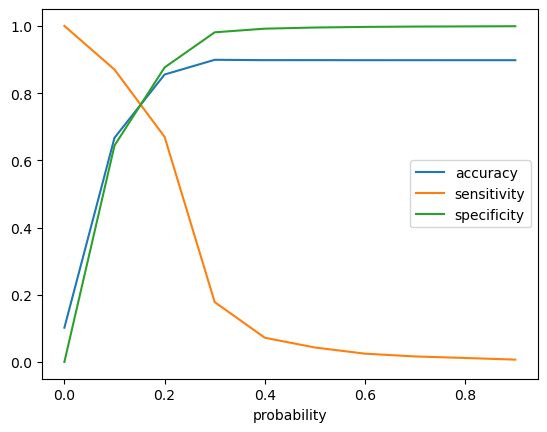

In [334]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

It seems probability around 0.2 seems to be the best fit as we get around 0.8 accuracy along with hight sensitivity and specificity.

In [335]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0    0.0    0.035949    1    0    0    0    0    0    0    0    0    0   
1    1.0    0.419670    1    1    1    1    1    0    0    0    0    0   
2    0.0    0.053403    1    0    0    0    0    0    0    0    0    0   
3    0.0    0.036909    1    0    0    0    0    0    0    0    0    0   
4    0.0    0.126769    1    1    0    0    0    0    0    0    0    0   

   predicted  
0          0  
1          1  
2          0  
3          0  
4          0

In [336]:
train_metrics = evaluate_model(y_train_pred_final['churn'], y_train_pred_final['predicted'])

Confusion matrix:- 
[[44078  6215]
 [ 1884  3822]]
Accuracy:- 0.8553724173645958
Sensitivity:- 0.6698212407991588
Specificity:- 0.8764241544548943
Precision:- 0.38079107302978976
Recall:- 0.6698212407991588


In [337]:
# Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [338]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

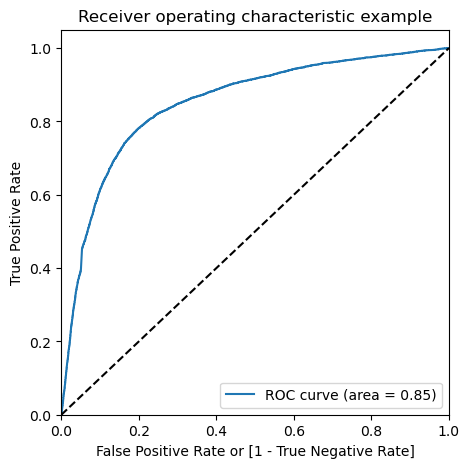

In [339]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Testing the model on the test set

In [340]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [341]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [342]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [343]:
# Predict on the test set
y_test_pred = log_no_pca_6.predict(X_test_sm)

In [344]:
y_test_pred.head()

25294    0.153769
24327    0.241870
58676    0.106475
32271    0.000079
25682    0.165391
dtype: float64

In [345]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
25294  0.153769
24327  0.241870
58676  0.106475
32271  0.000079
25682  0.165391

In [346]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn_probability
25294                0.0
24327                0.0
58676                0.0
32271                0.0
25682                0.0

In [347]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [348]:
y_test_pred_final.head()

churn_probability         0
25294                0.0  0.153769
24327                0.0  0.241870
58676                0.0  0.106475
32271                0.0  0.000079
25682                0.0  0.165391

In [349]:
# In the test set using probablity cutoff 0.2, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_probability'].map(lambda x: 1 if x > 0.2 else 0)

In [350]:
y_test_pred_final.head()

churn_probability         0  test_predicted
25294                0.0  0.153769               0
24327                0.0  0.241870               0
58676                0.0  0.106475               0
32271                0.0  0.000079               0
25682                0.0  0.165391               0

In [351]:
y_test_pred_final.shape

(14000, 3)

In [352]:
test_metrics = evaluate_model(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted'])

Confusion matrix:- 
[[12574     0]
 [    0  1426]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
Precision:- 1.0
Recall:- 1.0


### Model Summary

In [353]:
log_no_pca = [
    round(train_metrics['Accuracy'], 4),
    round(test_metrics['Accuracy'], 4),
    round(train_metrics['Sensitivity'], 4),
    round(test_metrics['Sensitivity'], 4),
    round(train_metrics['Specificity'], 4),
    round(test_metrics['Specificity'], 4),
    round(train_metrics['Precision'], 4),
    round(test_metrics['Precision'], 4),
    round(train_metrics['Recall'], 4),
    round(test_metrics['Recall'], 4),
]

log_no_pca = pd.Series(log_no_pca, name = 'Logistic Regression without PCA')

model_summary = pd.concat([metric, log_reg_with_pca_summary, dt_with_pca_summary, rfc_with_pca_summary, log_no_pca], axis=1)
model_summary

Metric  Logistic Regression with PCA  Decision Tree with PCA  \
0     Accuracy (Train)                        0.9012                  0.9141   
1      Accuracy (Test)                        0.9026                  0.9018   
2  Sensitivity (Train)                        0.1195                  0.3871   
3   Sensitivity (Test)                        0.1136                  0.3114   
4  Specificity (Train)                        0.9899                  0.9739   
5   Specificity (Test)                        0.9921                  0.9687   
6    Precision (Train)                        0.5726                  0.6276   
7     Precision (Test)                        0.6207                  0.5305   
8       Recall (Train)                        0.1195                  0.3871   
9        Recall (Test)                        0.1136                  0.3114   

   Random Forest with PCA  Logistic Regression without PCA  
0                  0.9026                           0.8554  
1                  0.9003                           1.0000  
2                  0.0626                           0.6698  
3                  0.0477                           1.0000  
4                  0.9980                           0.8764  
5                  0.9970                           1.0000  
6                  0.7761                           0.3808  
7                  0.6415                           1.0000  
8                  0.0626                           0.6698  
9                  0.0477                           1.0000

## 10. XGBoost without PCA

In [354]:
from xgboost import XGBClassifier

param_grid = {
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.3,0.4,0.5]
}

xgb = XGBClassifier(random_state=100, n_jobs=-1, max_depth=2, n_estimators=200)
grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=param_grid, 
                               cv=5,
                               n_jobs=-1,
                               scoring='accuracy',
                               verbose=1)
grid_search_xgb.fit(X_train_copy, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None,

In [355]:
grid_search_xgb.best_params_

{'learning_rate': 0.2, 'subsample': 0.4}

In [356]:
X_test_copy = X_test.drop(['id'], axis=1)


In [357]:
xgb_best = XGBClassifier(random_state=100,
                         n_jobs=-1,
                         max_depth=2,
                         n_estimators=200,
                         learning_rate=0.2,
                         subsample=0.4)

xgb_best_model = xgb_best.fit(X_train_copy, y_train)
xgb_train_pred = xgb_best_model.predict(X_train_copy)
xgb_test_pred = xgb_best_model.predict(X_test_copy)

In [360]:
train_metrics = evaluate_model(y_train, xgb_train_pred)

Confusion matrix:- 
[[49257  1036]
 [ 1967  3739]]
Accuracy:- 0.9463740423936142
Sensitivity:- 0.6552751489660007
Specificity:- 0.9794007118286839
Precision:- 0.7830366492146597
Recall:- 0.6552751489660007


In [361]:
test_metrics = evaluate_model(y_test, xgb_test_pred)

Confusion matrix:- 
[[12296   278]
 [  575   851]]
Accuracy:- 0.9390714285714286
Sensitivity:- 0.5967741935483871
Specificity:- 0.9778908859551455
Precision:- 0.7537643932683791
Recall:- 0.5967741935483871


## 11. Final Model Summary

In [362]:
xgb_no_pca = [
    round(train_metrics['Accuracy'], 4),
    round(test_metrics['Accuracy'], 4),
    round(train_metrics['Sensitivity'], 4),
    round(test_metrics['Sensitivity'], 4),
    round(train_metrics['Specificity'], 4),
    round(test_metrics['Specificity'], 4),
    round(train_metrics['Precision'], 4),
    round(test_metrics['Precision'], 4),
    round(train_metrics['Recall'], 4),
    round(test_metrics['Recall'], 4),
]

xgb_no_pca = pd.Series(xgb_no_pca, name = 'XGBoost without PCA')

model_summary = pd.concat([metric, log_reg_with_pca_summary, dt_with_pca_summary, rfc_with_pca_summary, log_no_pca, xgb_no_pca], axis=1)
model_summary

Metric  Logistic Regression with PCA  Decision Tree with PCA  \
0     Accuracy (Train)                        0.9012                  0.9141   
1      Accuracy (Test)                        0.9026                  0.9018   
2  Sensitivity (Train)                        0.1195                  0.3871   
3   Sensitivity (Test)                        0.1136                  0.3114   
4  Specificity (Train)                        0.9899                  0.9739   
5   Specificity (Test)                        0.9921                  0.9687   
6    Precision (Train)                        0.5726                  0.6276   
7     Precision (Test)                        0.6207                  0.5305   
8       Recall (Train)                        0.1195                  0.3871   
9        Recall (Test)                        0.1136                  0.3114   

   Random Forest with PCA  Logistic Regression without PCA  \
0                  0.9026                           0.8554   
1                  0.9003                           1.0000   
2                  0.0626                           0.6698   
3                  0.0477                           1.0000   
4                  0.9980                           0.8764   
5                  0.9970                           1.0000   
6                  0.7761                           0.3808   
7                  0.6415                           1.0000   
8                  0.0626                           0.6698   
9                  0.0477                           1.0000   

   XGBoost without PCA  
0               0.9464  
1               0.9391  
2               0.6553  
3               0.5968  
4               0.9794  
5               0.9779  
6               0.7830  
7               0.7538  
8               0.6553  
9               0.5968

### Observations
- Clearly XGBoost is the best model with highest accuracy.
- We'll be using this model for final submission.

## 12. Top predictors

Below are few top variables selected in the logistic regression model.

In [364]:
# top variables selected in the logistic regression model
log_no_pca_6.params[1:]

loc_og_mou_8        -1.007725
std_og_t2t_mou_8    -0.223955
std_og_t2m_mou_8    -0.180978
loc_ic_t2t_mou_8    -0.173806
loc_ic_t2m_mou_8    -0.889042
std_ic_t2t_mou_8     0.132938
std_ic_t2m_mou_8     0.121465
total_ic_mou_7      -1.696256
isd_ic_mou_8         0.343951
diff_total_ic_mou   -1.388140
dtype: float64

## 13. Business recomendations
- Focus on customers when they are in roaming area outside their circle. Both the incoming and outgoing STD calls for 8th month are strong predictors of churn behaviour.
- Average revenue per user seems to be very important feature in determining churn prediction.
- From EDA, there is a clear decline in numbers in the 8th month for arpu, onnet, offnet, total recharge amounts and incoming and outgoing calls compared with 6th and 7th months.

## 14. Predicting on unseen data and generating submission file

In [365]:
# # Prediction on the test set
# final_unseen_df['churn_probabilty_dt_pca'] = dt_pca_model.predict(final_unseen_df_pca)
# final_unseen_df['churn_probabilty_log_pca'] = log_pca_model.predict(final_unseen_df_pca)
# final_unseen_df['churn_probabilty_rfc'] = rfc_model.predict(final_unseen_df_pca)
# final_unseen_df_copy = final_unseen_df.copy()
# final_unseen_df_copy['churn_probabilty_pca']
# final_unseen_df_copy.drop(['id', 'churn_probabilty_pca', 'churn_probabilties','churn_probabilty_log_pca', 'churn_probabilty_rfc'], axis=1, inplace=True)

In [368]:
final_unseen_df['churn_probabilty_xgboost'] = xgb_best_model.predict(final_unseen_df_copy)

In [370]:
final_unseen_df['id'] = final_unseen_df['id'].astype('int32')

In [371]:
# creating submission.csv
submission = pd.DataFrame({
    'id': final_unseen_df['id'],
    'churn_probability': final_unseen_df['churn_probabilty_xgboost']
})
submission.set_index('id', inplace=True)

submission.head()

churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0

In [372]:
# checking the distribution
submission['churn_probability'].value_counts(normalize=True)

0    0.913867
1    0.086133
Name: churn_probability, dtype: float64

In [373]:
submission.shape

(30000, 1)

In [374]:
# creating submission.csv file
submission.to_csv("./submission.csv")